In [1]:
!pip install --user --upgrade pip

In [2]:
! pip install numpy pandas plotly scipy matplotlib

In [3]:
! pip install --upgrade pandas

In [4]:
! pip install numpy openpyxl

In [5]:
! pip install psutil

In [6]:
! pip install statsmodels

In [94]:
import numpy as np
import os
import psutil
import pandas as pd
from datetime import datetime
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import openpyxl
import plotly.express as px
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [8]:
df = pd.read_excel("data/resultados_pruebas_saber_2020-1.xlsx")

In [9]:
df.describe(include='all')

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO   
count               68725             68725       68597                68667  \
unique                  6                17           2                10735   
top                    CC          COLOMBIA           M  2000-09-21 00:00:00   
freq                67218             68663       34798                   45   
mean                  NaN               NaN         NaN                  NaN   
std                   NaN               NaN         NaN                  NaN   
min                   NaN               NaN         NaN                  NaN   
25%                   NaN               NaN         NaN                  NaN   
50%                   NaN               NaN         NaN                  NaN   
75%                   NaN               NaN         NaN                  NaN   
max                   NaN               NaN         NaN                  NaN   

       ESTU_EXTERIOR  PERIODO ESTU_CONSECUTIVO ESTU_ESTUDIANTE   
count          68725  68725.0            68725           68725  \
unique             1      NaN            68725               1   
top               NO      NaN   EK202010002443      ESTUDIANTE   
freq           68725      NaN                1           68725   
mean             NaN  20201.0              NaN             NaN   
std              NaN      0.0              NaN             NaN   
min              NaN  20201.0              NaN             NaN   
25%              NaN  20201.0              NaN             NaN   
50%              NaN  20201.0              NaN             NaN   
75%              NaN  20201.0              NaN             NaN   
max              NaN  20201.0              NaN             NaN   

       ESTU_PAIS_RESIDE ESTU_DISC_FISICA ESTU_DISC_SISTEM   
count             68725               27                3  \
unique               17                1                1   
top            COLOMBIA                x                x   
freq              68663               27                3   
mean                NaN              NaN              NaN   
std                 NaN              NaN              NaN   
min                 NaN              NaN              NaN   
25%                 NaN              NaN              NaN   
50%                 NaN              NaN              NaN   
75%                 NaN              NaN              NaN   
max                 NaN              NaN              NaN   

       ESTU_DISC_AUDITCASTELL ESTU_DISC_AUDITLSC ESTU_DISC_VISUALCEGUE   
count                       8                  8                     1  \
unique                      1                  1                     1   
top                         x                  x                     x   
freq                        8                  8                     1   
mean                      NaN                NaN                   NaN   
std                       NaN                NaN                   NaN   
min                       NaN                NaN                   NaN   
25%                       NaN                NaN                   NaN   
50%                       NaN                NaN                   NaN   
75%                       NaN                NaN                   NaN   
max                       NaN                NaN                   NaN   

       ESTU_DISC_VISUALBAJA ESTU_DISC_VOZHABLA ESTU_DISC_INTELEC   
count                    10                  1                 3  \
unique                    1                  1                 1   
top                       x                  x                 x   
freq                     10                  1                 3   
mean                    NaN                NaN               NaN   
std                     NaN                NaN               NaN   
min                     NaN                NaN               NaN   
25%                     NaN                NaN               NaN   
50%                

- - -
# 3.1 Exploración de los Datos y 3.2.1 Transformación de los Datos
- - -

- - -
## Variable: ESTU_TIPODOCUMENTO
- - -

In [8]:
df[['ESTU_TIPODOCUMENTO','PUNT_GLOBAL']].groupby("ESTU_TIPODOCUMENTO").agg(["count", "mean"])

PUNT_GLOBAL            
                         count        mean
ESTU_TIPODOCUMENTO                        
CC                       67218   93.080708
CE                          63  100.857143
CR                         125   98.200000
PE                           4  121.250000
PEP                          2   99.000000
TI                        1313   98.118812

### Scatter Plot

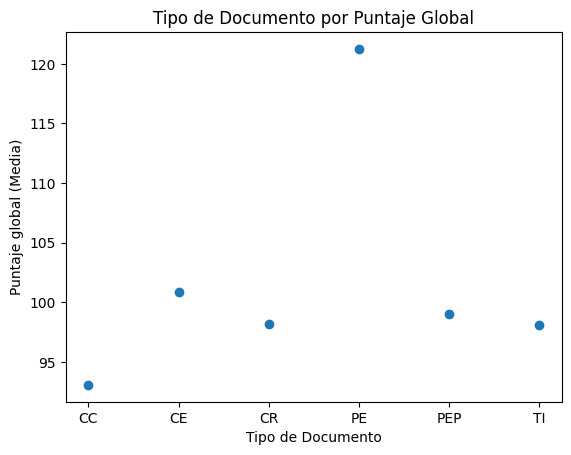

In [47]:
mean_scores = df.groupby('ESTU_TIPODOCUMENTO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Tipo de Documento')
plt.ylabel('Puntaje global (Media)')
plt.title('Tipo de Documento por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_TIPODOCUMENTO', ylabel='PUNT_GLOBAL'>

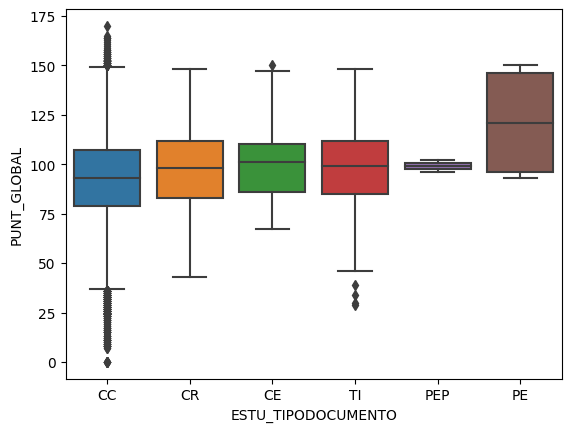

In [48]:
sns.boxplot(x="ESTU_TIPODOCUMENTO", y="PUNT_GLOBAL", data=df)

### Histogram

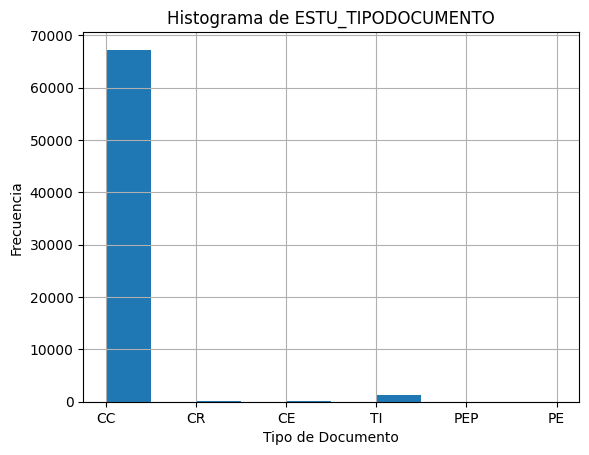

In [49]:
df["ESTU_TIPODOCUMENTO"].hist()

plt.title("Histograma de ESTU_TIPODOCUMENTO")
plt.xlabel("Tipo de Documento")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta la variable ESTU_TIPODOCUMENTO, porque la gran mayoria de los estudiantes tienen una cedula, por lo que no representa un impacto en el resultado del puntaje global

- - -
## Variable: ESTU_NACIONALIDAD
- - -

In [9]:
df[['ESTU_NACIONALIDAD','PUNT_GLOBAL']].groupby("ESTU_NACIONALIDAD").agg(["count", "mean"])

PUNT_GLOBAL            
                           count        mean
ESTU_NACIONALIDAD                           
ALEMANIA                       1  135.000000
ANTIGUA Y BARBUDA              1  108.000000
BOLIVIA                        2  107.500000
CANADÁ                         1   88.000000
CHILE                          1  103.000000
COLOMBIA                   68663   93.185471
ECUADOR                        2  118.000000
EL SALVADOR                    4  138.750000
ESPAÑA                         2   96.500000
ESTADOS UNIDOS                 2   82.500000
HAITI                          2   80.500000
MÉXICO                         2  113.000000
NICARAGUA                      2   81.500000
PANAMÁ                         8   89.625000
PERÚ                           2  109.500000
REPÚBLICA DOMINICANA           2  122.500000
VENEZUELA                     28  104.214286

### Scatter Plot

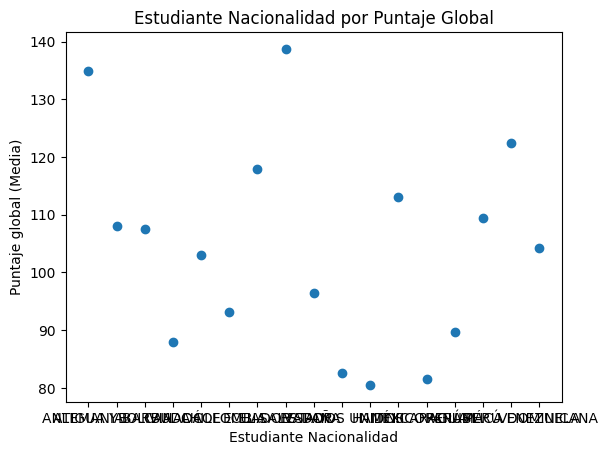

In [50]:
mean_scores = df.groupby('ESTU_NACIONALIDAD')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Nacionalidad')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Nacionalidad por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_NACIONALIDAD', ylabel='PUNT_GLOBAL'>

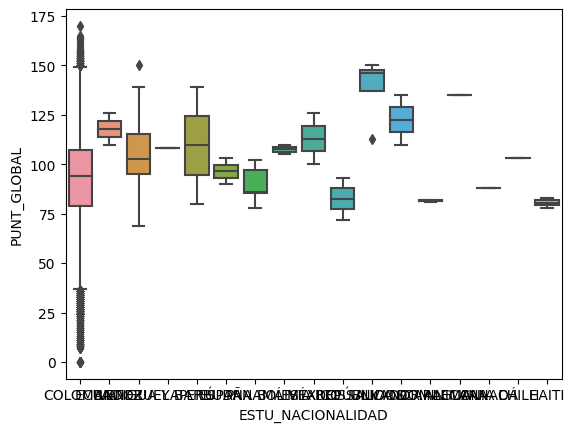

In [52]:
sns.boxplot(x="ESTU_NACIONALIDAD", y="PUNT_GLOBAL", data=df)

### Histogram

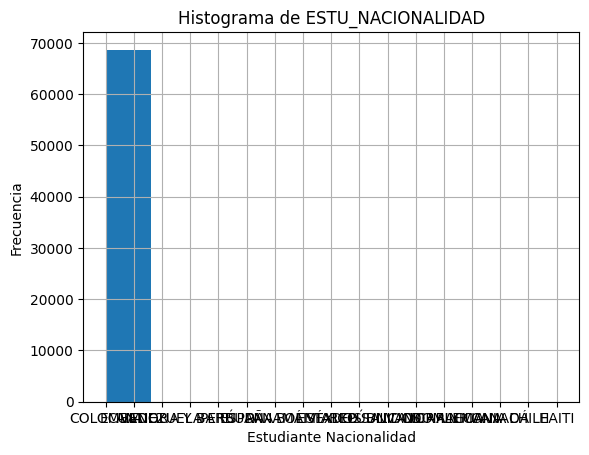

In [54]:
df["ESTU_NACIONALIDAD"].hist()

plt.title("Histograma de ESTU_NACIONALIDAD")
plt.xlabel("Estudiante Nacionalidad")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta la variable ESTU_NACIONALIDAD, porque la gran mayoria de los estudiantes son de Colombia, por lo que no representa un impacto en el resultado del puntaje global.

- - -
## Variable: ESTU_GENERO
- - -

In [10]:
df[['ESTU_GENERO','PUNT_GLOBAL']].groupby("ESTU_GENERO").agg(["count", "mean"])

PUNT_GLOBAL           
                  count       mean
ESTU_GENERO                       
F                 33799  92.733335
M                 34798  93.646474

### Scatter Plot

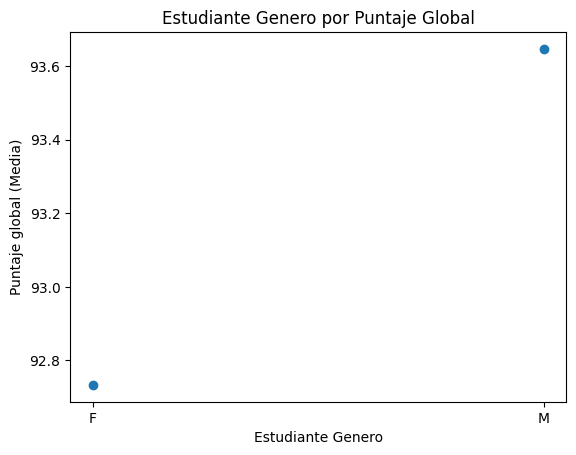

In [55]:
mean_scores = df.groupby('ESTU_GENERO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Genero')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Genero por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_GENERO', ylabel='PUNT_GLOBAL'>

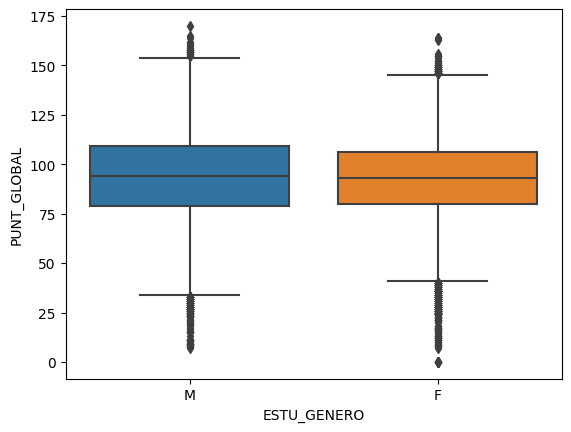

In [58]:
sns.boxplot(x="ESTU_GENERO", y="PUNT_GLOBAL", data=df)

### Histogram

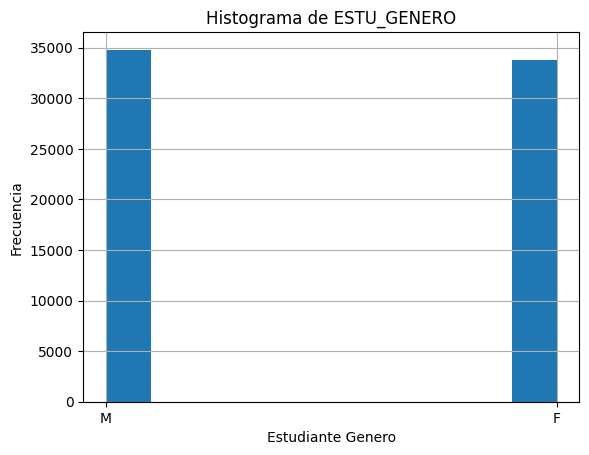

In [60]:
df["ESTU_GENERO"].hist()

plt.title("Histograma de ESTU_GENERO")
plt.xlabel("Estudiante Genero")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta la variable ESTU_GENERO, porque tanto hombres como mujeres sacaron casi la misma media de puntuación global en las pruebas saber, por lo tanto, no afecta al resultado final que sea hombre o mujer.

- - -
## Variable: ESTU_FECHANACIMIENTO
- - -

In [61]:
df[['ESTU_FECHANACIMIENTO','PUNT_GLOBAL']].groupby("ESTU_FECHANACIMIENTO").agg(["count", "mean"])

PUNT_GLOBAL         
                             count     mean
ESTU_FECHANACIMIENTO                       
1900-01-01 00:00:00              8  102.625
1918-08-03 00:00:00              1   95.000
1940-01-01 00:00:00              1  115.000
1951-08-19 00:00:00              1   82.000
1951-12-09 00:00:00              1   63.000
...                            ...      ...
10/21/1882 12:00:00 AM           1  117.000
11/17/0094 12:00:00 AM           1  112.000
12/02/0002 12:00:00 AM           1  119.000
12/15/0096 12:00:00 AM           1   79.000
12/30/1192 12:00:00 AM           1   55.000

[10735 rows x 2 columns]

### Scatter Plot

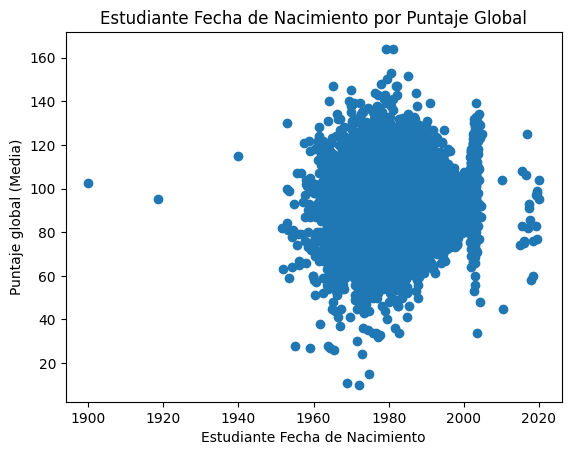

In [65]:
df['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df['ESTU_FECHANACIMIENTO'], format='%Y-%m-%d', errors='coerce')

mean_scores = df.groupby('ESTU_FECHANACIMIENTO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Fecha de Nacimiento')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Fecha de Nacimiento por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_GENERO', ylabel='PUNT_GLOBAL'>

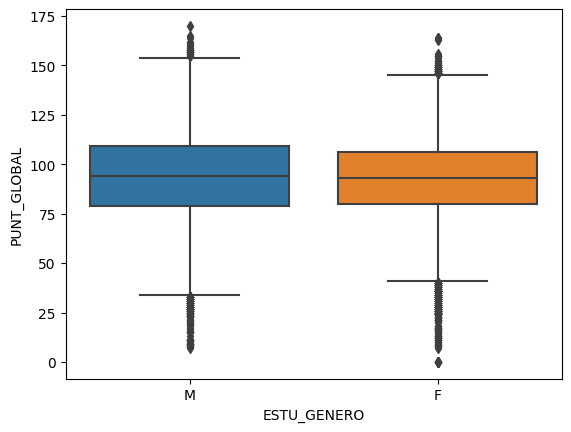

In [63]:
sns.boxplot(x="ESTU_GENERO", y="PUNT_GLOBAL", data=df)

### Histogram

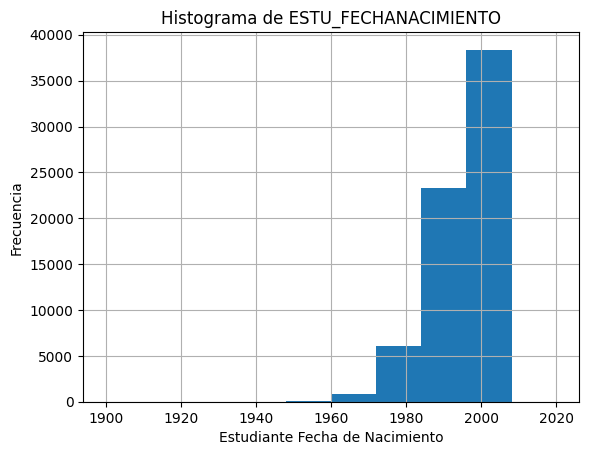

In [66]:
df["ESTU_FECHANACIMIENTO"].hist()

plt.title("Histograma de ESTU_FECHANACIMIENTO")
plt.xlabel("Estudiante Fecha de Nacimiento")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta la variable ESTU_FECHANACIMIENTO, par ser reemplazada por la variable ESTU_EDAD, haciendole la siguiente tranformación:

In [10]:
hoy = datetime.today()

df['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df['ESTU_FECHANACIMIENTO'], format='%Y-%m-%d', errors='coerce')

df['ESTU_EDAD'] = ((hoy - pd.to_datetime(df['ESTU_FECHANACIMIENTO'], format='%Y-%m-%d')).dt.days / 365.25).fillna(0).apply(lambda x: int(round(x)))

edad_media = int(df['ESTU_EDAD'].mean())
mask = (df['ESTU_EDAD'] < 10) | (df['ESTU_EDAD'] > 100) | (df['ESTU_EDAD'].isnull())
df.loc[mask, 'ESTU_EDAD'] = edad_media

In [11]:
df[['ESTU_EDAD','PUNT_GLOBAL']].groupby("ESTU_EDAD").agg(["count", "mean"])

PUNT_GLOBAL            
                count        mean
ESTU_EDAD                        
13                  2   74.500000
18                  1  125.000000
19                 17  100.411765
20                108   99.787037
21               1530   98.115686
22               6992   94.980406
23               9359   93.401004
24               7434   92.226258
25               5493   91.768433
26               4524   91.962644
27               3862   92.672191
28               3374   92.632187
29               2922   93.193018
30               2508   93.266746
31               2256   94.460993
32               2040   93.382843
33               1844   94.278742
34               1741   94.136703
35               1453   93.655884
36               1330   93.348120
37               1141   92.636284
38               1088   93.838235
39                945   92.315344
40                912   93.586623
41                851   92.854289
42                751   94.330226
43                681   93.604993
44                568   93.309859
45                436   93.543578
46                382   92.366492
47                326   92.791411
48                298   92.362416
49                245   90.604082
50                197   89.446701
51                213   88.267606
52                139   88.172662
53                141   92.893617
54                109   89.706422
55                105   88.085714
56                 76   92.513158
57                 66   84.969697
58                 57   86.842105
59                 51   90.000000
60                 36   87.361111
61                 28   88.250000
62                 25   94.160000
63                 18   81.333333
64                 13   84.769231
65                 11   89.636364
66                  5   95.000000
67                  4   79.500000
68                  5   76.200000
69                  3   74.333333
70                  6   92.166667
71                  1   63.000000
72                  1   82.000000
83                  1  115.000000

- - -
## Variable: ESTU_EXTERIOR
- - -

In [14]:
df[['ESTU_EXTERIOR','PUNT_GLOBAL']].groupby("ESTU_EXTERIOR").agg(["count", "mean"])

PUNT_GLOBAL           
                    count       mean
ESTU_EXTERIOR                       
NO                  68725  93.195213

### Scatter Plot

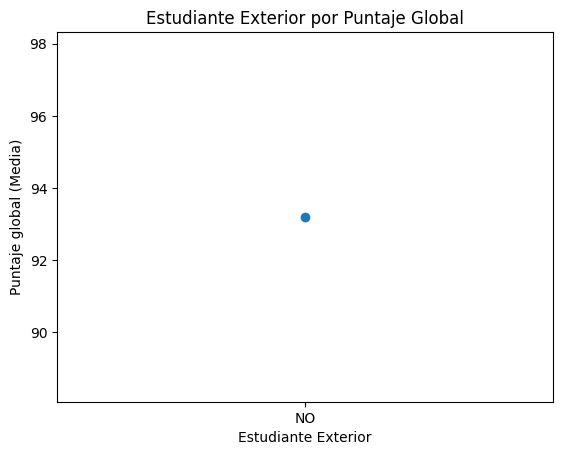

In [73]:
mean_scores = df.groupby('ESTU_EXTERIOR')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Exterior')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Exterior por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_EXTERIOR', ylabel='PUNT_GLOBAL'>

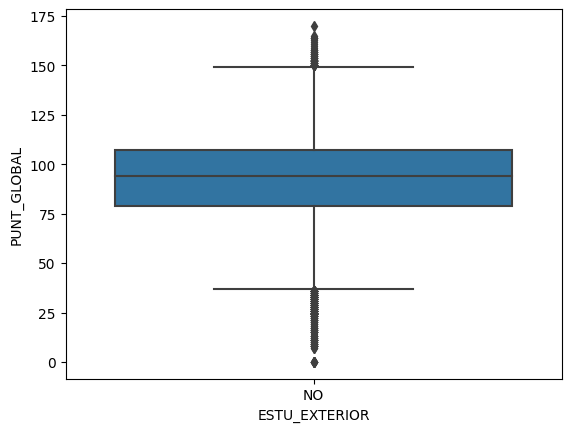

In [74]:
sns.boxplot(x="ESTU_EXTERIOR", y="PUNT_GLOBAL", data=df)

### Histogram

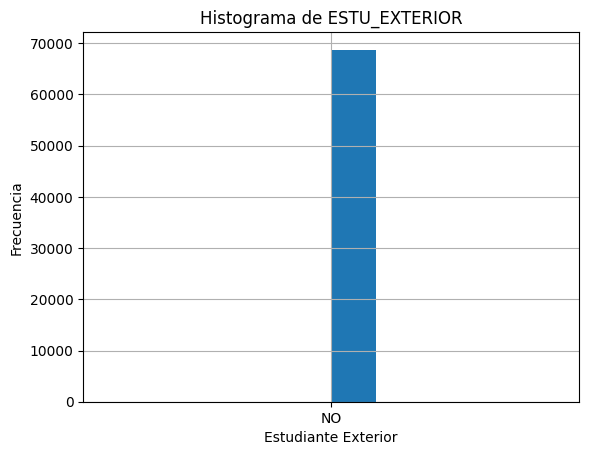

In [75]:
df["ESTU_EXTERIOR"].hist()

plt.title("Histograma de ESTU_EXTERIOR")
plt.xlabel("Estudiante Exterior")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta la variable ESTU_EXTERIOR, porque nadie estudio en el exterior, por lo tanto no afeca al puntaje global.

- - -
## Variable: PERIODO
- - -

In [15]:
df[['PERIODO','PUNT_GLOBAL']].groupby("PERIODO").agg(["count", "mean"])

PUNT_GLOBAL           
              count       mean
PERIODO                       
20201         68725  93.195213

### Scatter Plot

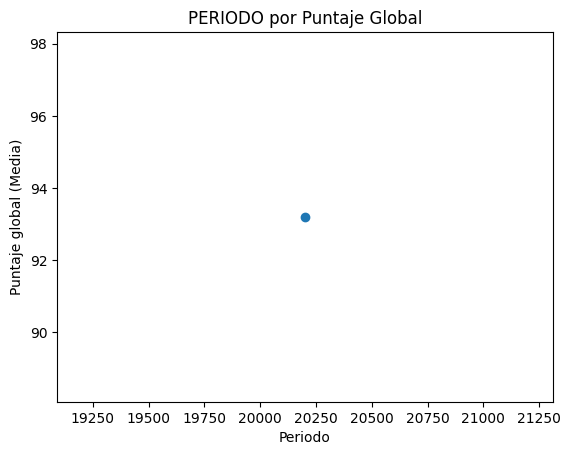

In [78]:
mean_scores = df.groupby('PERIODO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Periodo')
plt.ylabel('Puntaje global (Media)')
plt.title('PERIODO por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='PERIODO', ylabel='PUNT_GLOBAL'>

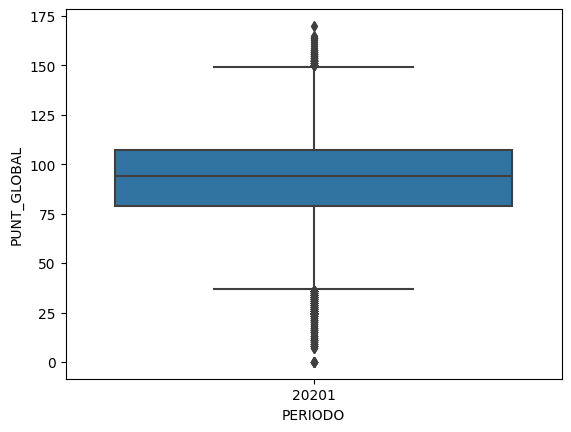

In [77]:
sns.boxplot(x="PERIODO", y="PUNT_GLOBAL", data=df)

### Histogram

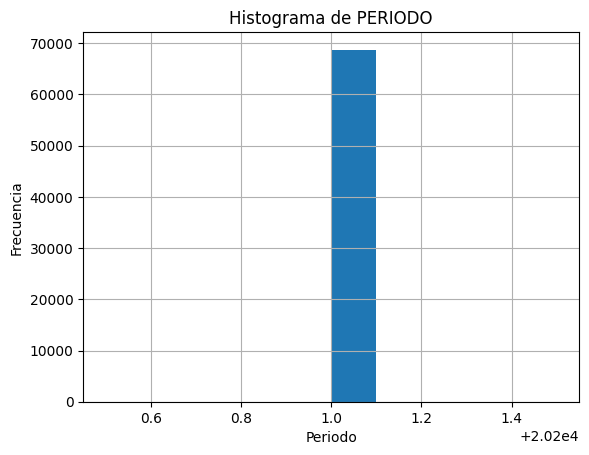

In [76]:
df["PERIODO"].hist()

plt.title("Histograma de PERIODO")
plt.xlabel("Periodo")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta la variable PERIODO, porque todos realizaron la prueba en el mismo periodo por lo que no es relevante para el analisis.

- - -
## Variable: ESTU_CONSECUTIVO
- - -

In [16]:
df[['ESTU_CONSECUTIVO','PUNT_GLOBAL']].groupby("ESTU_CONSECUTIVO").agg(["count", "mean"])

PUNT_GLOBAL       
                       count   mean
ESTU_CONSECUTIVO                   
EK202010000002             1  105.0
EK202010000003             1   72.0
EK202010000005             1   99.0
EK202010000007             1   87.0
EK202010000008             1   79.0
...                      ...    ...
EK202010099801             1   83.0
EK202010099802             1   92.0
EK202010099803             1   85.0
EK202010099804             1   80.0
EK202010099805             1  109.0

[68725 rows x 2 columns]

### Descartado

Se descarta la variable ESTU_CONSECUTIVO, porque representa un dato unico que identifica al estudiante, por lo tanto no es relevante para el analisis.

- - -
## Variable: ESTU_ESTUDIANTE
- - -

In [17]:
df[['ESTU_ESTUDIANTE','PUNT_GLOBAL']].groupby("ESTU_ESTUDIANTE").agg(["count", "mean"])

PUNT_GLOBAL           
                      count       mean
ESTU_ESTUDIANTE                       
ESTUDIANTE            68725  93.195213

### Scatter Plot

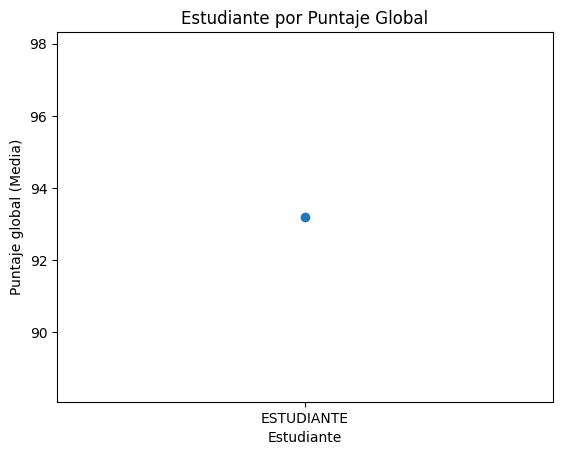

In [81]:
mean_scores = df.groupby('ESTU_ESTUDIANTE')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_ESTUDIANTE', ylabel='PUNT_GLOBAL'>

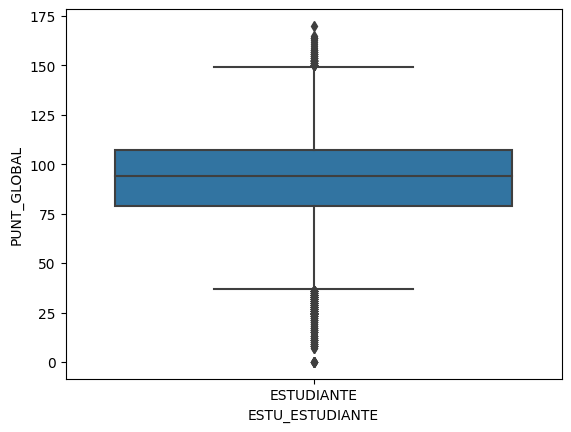

In [82]:
sns.boxplot(x="ESTU_ESTUDIANTE", y="PUNT_GLOBAL", data=df)

### Histogram

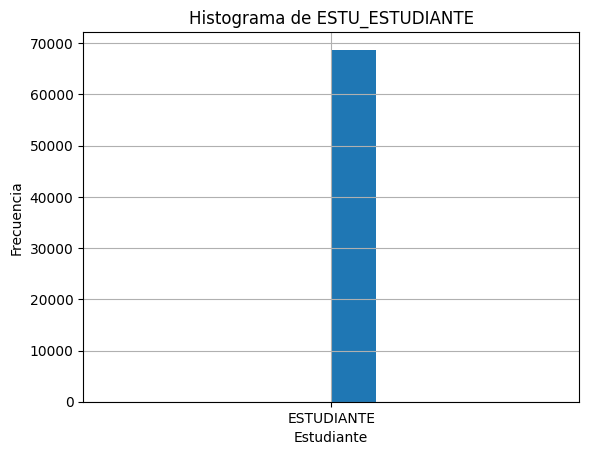

In [83]:
df["ESTU_ESTUDIANTE"].hist()

plt.title("Histograma de ESTU_ESTUDIANTE")
plt.xlabel("Estudiante")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta la variable ESTU_ESTUDIANTE, porque todos son estudiantes, por lo tanto no es relevante para el analisis

- - -
## Variable: ESTU_PAIS_RESIDE
- - -

In [69]:
df[['ESTU_PAIS_RESIDE','PUNT_GLOBAL']].groupby("ESTU_PAIS_RESIDE").agg(["count", "mean"])

PUNT_GLOBAL            
                           count        mean
ESTU_PAIS_RESIDE                            
ALEMANIA                       1  135.000000
ANTIGUA Y BARBUDA              1  108.000000
BOLIVIA                        2  107.500000
CANADÁ                         1   88.000000
CHILE                          1  103.000000
COLOMBIA                   68663   93.185471
ECUADOR                        2  118.000000
EL SALVADOR                    4  138.750000
ESPAÑA                         2   96.500000
ESTADOS UNIDOS                 2   82.500000
HAITI                          2   80.500000
MÉXICO                         2  113.000000
NICARAGUA                      2   81.500000
PANAMÁ                         8   89.625000
PERÚ                           2  109.500000
REPÚBLICA DOMINICANA           2  122.500000
VENEZUELA                     28  104.214286

### Scatter Plot

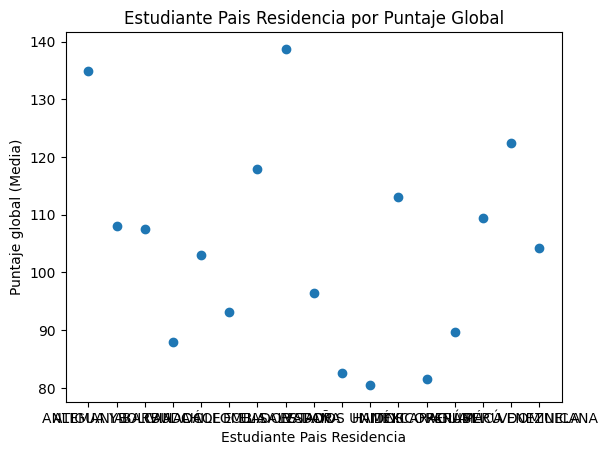

In [84]:
mean_scores = df.groupby('ESTU_PAIS_RESIDE')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Pais Residencia')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Pais Residencia por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_PAIS_RESIDE', ylabel='PUNT_GLOBAL'>

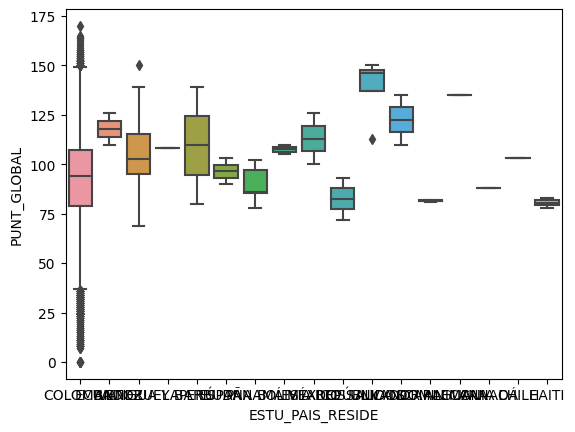

In [85]:
sns.boxplot(x="ESTU_PAIS_RESIDE", y="PUNT_GLOBAL", data=df)

### Histogram

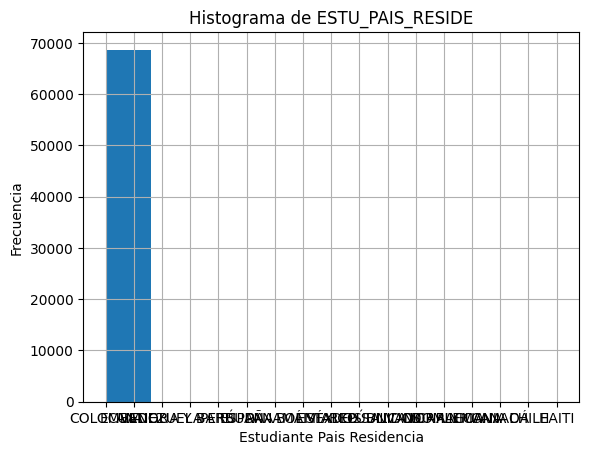

In [86]:
df["ESTU_PAIS_RESIDE"].hist()

plt.title("Histograma de ESTU_PAIS_RESIDE")
plt.xlabel("Estudiante Pais Residencia")
plt.ylabel("Frecuencia")

plt.show()

### Descartada

Porque casi todos pertenecen a Colombia

- - -
## Variables: ESTU_DISC_FISICA, ESTU_DISC_SISTEM, ESTU_DISC_AUDITCASTELL, ESTU_DISC_AUDITLSC, ESTU_DISC_VISUALCEGUE, ESTU_DISC_VISUALBAJA, ESTU_DISC_VOZHABLA, ESTU_DISC_INTELEC, ESTU_DISC_ESPAUTISTA, ESTU_DISC_PSICOSOCIAL, ESTU_DISC_ASPERGER
- - -

### Descartadas

Se descartan las variables ESTU_DISC_FISICA, ESTU_DISC_SISTEM, ESTU_DISC_AUDITCASTELL, ESTU_DISC_AUDITLSC, ESTU_DISC_VISUALCEGUE, ESTU_DISC_VISUALBAJA, ESTU_DISC_VOZHABLA, ESTU_DISC_INTELEC, ESTU_DISC_ESPAUTISTA, ESTU_DISC_PSICOSOCIAL, ESTU_DISC_ASPERGER, las cuales representan diferentes tipos de discapacidades, por la poca cantidad de personas con discapacidad, que no representan un impacto significativo para realizar el modelo

- - -
## Variable: ESTU_DEPTO_RESIDE
- - -

In [70]:
df[['ESTU_DEPTO_RESIDE','PUNT_GLOBAL']].groupby("ESTU_DEPTO_RESIDE").agg(["count", "mean"])

PUNT_GLOBAL           
                        count       mean
ESTU_DEPTO_RESIDE                       
AMAZONAS                   12  84.166667
ANTIOQUIA               10159  93.249040
ARAUCA                    102  87.637255
ATLANTICO                3032  89.537269
BOGOTÁ                  19894  98.118930
BOLIVAR                  3483  87.933391
BOYACA                   2078  90.835900
CALDAS                    952  91.475840
CAQUETA                   230  85.491304
CASANARE                  439  90.662870
CAUCA                    1069  87.526660
CESAR                    1085  85.330876
CHOCO                      94  77.085106
CORDOBA                   652  84.107362
CUNDINAMARCA             5649  94.648610
EXTRANJERO                  5  88.800000
GUAINIA                     4  77.750000
GUAVIARE                   78  85.564103
HUILA                    1618  87.360321
LA GUAJIRA                363  84.977961
MAGDALENA                 853  84.587339
META                     1230  89.861789
NARIÑO                    959  89.473410
NORTE SANTANDER          1532  89.840731
PUTUMAYO                  310  86.890323
QUINDIO                   891  92.003367
RISARALDA                1297  94.299923
SAN ANDRES                 19  90.000000
SANTANDER                3210  94.942679
SUCRE                     369  86.455285
TOLIMA                   2558  88.546130
VALLE                    4444  92.921242
VAUPES                      2  60.000000
VICHADA                    16  83.562500

### Scatter Plot

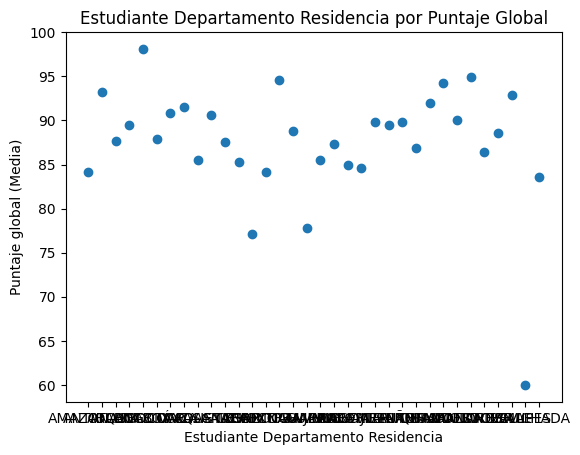

In [87]:
mean_scores = df.groupby('ESTU_DEPTO_RESIDE')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Departamento Residencia')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Departamento Residencia por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_DEPTO_RESIDE', ylabel='PUNT_GLOBAL'>

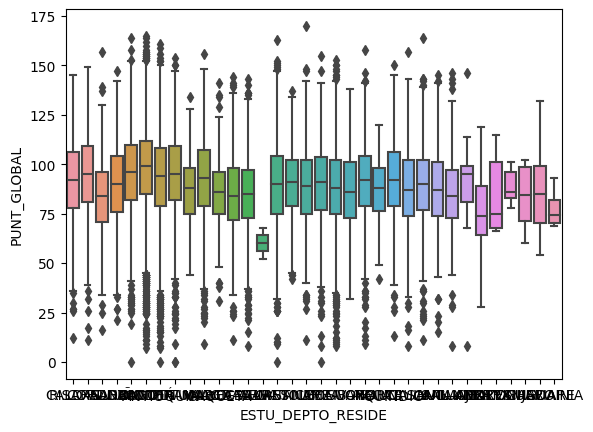

In [88]:
sns.boxplot(x="ESTU_DEPTO_RESIDE", y="PUNT_GLOBAL", data=df)

### Histogram

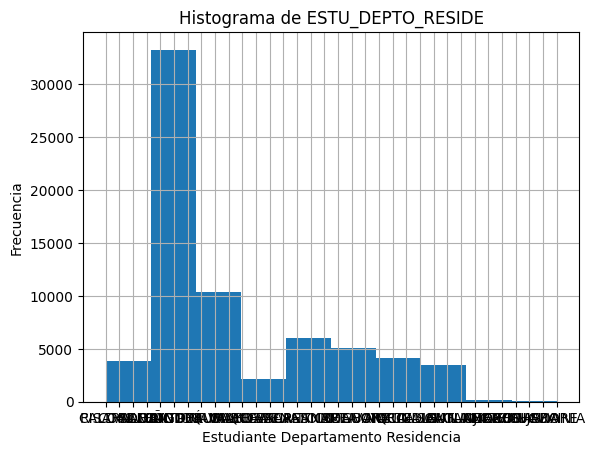

In [89]:
df["ESTU_DEPTO_RESIDE"].hist()

plt.title("Histograma de ESTU_DEPTO_RESIDE")
plt.xlabel("Estudiante Departamento Residencia")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta y se transforman los datos para crear una nueva categoria, y agrupar en esa categoria los departamentos que tengan menos de 30 personas, porque es a partir de 30 que los datos se estabilizan.

In [12]:
grouped = df[['ESTU_DEPTO_RESIDE','PUNT_GLOBAL']].groupby("ESTU_DEPTO_RESIDE").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_DEPTO_RESIDE'].fillna(middle_category, inplace=True)

depto_counts = df['ESTU_DEPTO_RESIDE'].value_counts()
otros_deptos = depto_counts[depto_counts < 30].index.tolist()
df.loc[df['ESTU_DEPTO_RESIDE'].isin(otros_deptos), 'ESTU_DEPTO_RESIDE'] = "Otros"

In [13]:
df[['ESTU_DEPTO_RESIDE','PUNT_GLOBAL']].groupby("ESTU_DEPTO_RESIDE").agg(["count", "mean"])

PUNT_GLOBAL           
                        count       mean
ESTU_DEPTO_RESIDE                       
ANTIOQUIA               10159  93.249040
ARAUCA                    102  87.637255
ATLANTICO                3032  89.537269
BOGOTÁ                  19894  98.118930
BOLIVAR                  3483  87.933391
BOYACA                   2078  90.835900
CALDAS                    989  91.484328
CAQUETA                   230  85.491304
CASANARE                  439  90.662870
CAUCA                    1069  87.526660
CESAR                    1085  85.330876
CHOCO                      94  77.085106
CORDOBA                   652  84.107362
CUNDINAMARCA             5649  94.648610
GUAVIARE                   78  85.564103
HUILA                    1618  87.360321
LA GUAJIRA                363  84.977961
MAGDALENA                 853  84.587339
META                     1230  89.861789
NARIÑO                    959  89.473410
NORTE SANTANDER          1532  89.840731
Otros                      58  85.034483
PUTUMAYO                  310  86.890323
QUINDIO                   891  92.003367
RISARALDA                1297  94.299923
SANTANDER                3210  94.942679
SUCRE                     369  86.455285
TOLIMA                   2558  88.546130
VALLE                    4444  92.921242

- - -
## Variable: ESTU_COD_RESIDE_DEPTO
- - -

In [24]:
df[['ESTU_COD_RESIDE_DEPTO','PUNT_GLOBAL']].groupby("ESTU_COD_RESIDE_DEPTO").agg(["count", "mean"])

PUNT_GLOBAL           
                            count       mean
ESTU_COD_RESIDE_DEPTO                       
5.0                         10159  93.249040
8.0                          3032  89.537269
11.0                        19894  98.118930
13.0                         3483  87.933391
15.0                         2078  90.835900
17.0                          952  91.475840
18.0                          230  85.491304
19.0                         1069  87.526660
20.0                         1085  85.330876
23.0                          652  84.107362
25.0                         5649  94.648610
27.0                           94  77.085106
41.0                         1618  87.360321
44.0                          363  84.977961
47.0                          853  84.587339
50.0                         1230  89.861789
52.0                          959  89.473410
54.0                         1532  89.840731
63.0                          891  92.003367
66.0                         1297  94.299923
68.0                         3210  94.942679
70.0                          369  86.455285
73.0                         2558  88.546130
76.0                         4444  92.921242
81.0                          102  87.637255
85.0                          439  90.662870
86.0                          310  86.890323
88.0                           19  90.000000
91.0                           12  84.166667
94.0                            4  77.750000
95.0                           78  85.564103
97.0                            2  60.000000
99.0                           16  83.562500
99999.0                         5  88.800000

### Scatter Plot

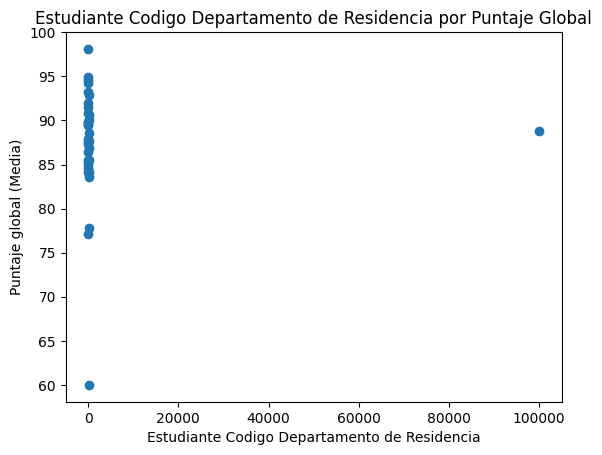

In [90]:
mean_scores = df.groupby('ESTU_COD_RESIDE_DEPTO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Codigo Departamento de Residencia')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Codigo Departamento de Residencia por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_COD_RESIDE_DEPTO', ylabel='PUNT_GLOBAL'>

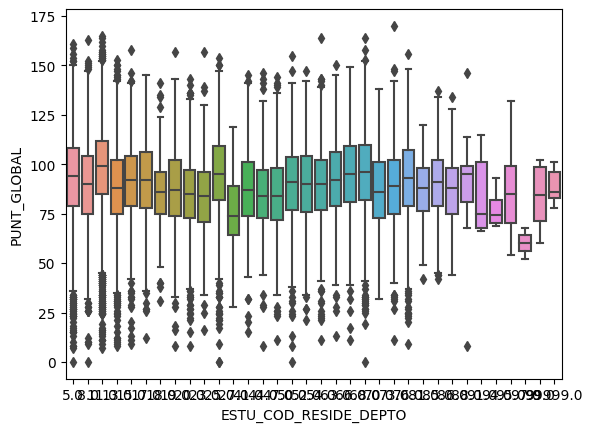

In [91]:
sns.boxplot(x="ESTU_COD_RESIDE_DEPTO", y="PUNT_GLOBAL", data=df)

### Histogram

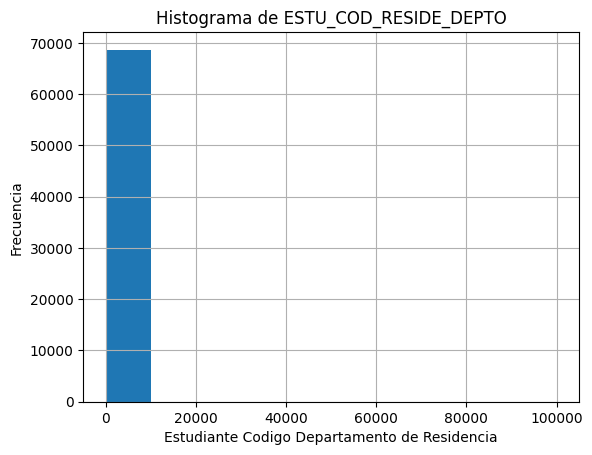

In [92]:
df["ESTU_COD_RESIDE_DEPTO"].hist()

plt.title("Histograma de ESTU_COD_RESIDE_DEPTO")
plt.xlabel("Estudiante Codigo Departamento de Residencia")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta la variable ESTU_COD_RESIDE_DEPTO, porque representa el codigo numerico del departamento lo cual no agrega información relevante con respecto a la variable ESTU_DEPTO_RESIDE

- - -
## Variable: ESTU_MCPIO_RESIDE (INDECISIOS)
- - -

In [19]:
df[['ESTU_MCPIO_RESIDE','PUNT_GLOBAL']].groupby("ESTU_MCPIO_RESIDE").agg(["count", "mean"])

PUNT_GLOBAL            
                                  count        mean
ESTU_MCPIO_RESIDE                                  
ACACÍAS                              49   86.938776
AGUACHICA                           170   83.588235
AGUAZUL                              39   91.615385
AGUSTÍN CODAZZI                      38   81.526316
AMAGÁ                                34   95.382353
APARTADÓ                            299   81.431438
ARAUCA                               73   86.520548
ARJONA                              117   83.042735
ARMENIA                             606   92.041254
ATRATO                               40   74.775000
BARANOA                              54   86.962963
BARBOSA                             107   88.719626
BARRANCABERMEJA                     506   89.881423
BARRANQUILLA                       1524   90.869423
BELLO                              1001   95.844156
BOGOTÁ D.C.                       19894   98.118930
BOYACÁ                               36   84.444444
BUCARAMANGA                        1035   97.826087
BUENAVENTURA                        161   85.751553
CAJICÁ                              232   93.465517
CALARCÁ                             112   90.705357
CALDAS                              184   95.135870
CALI                               2227   94.738213
CAMPOALEGRE                          58   82.655172
CANDELARIA                           96   86.635417
CAREPA                               90   82.900000
CARTAGENA DE INDIAS                2843   89.018291
CARTAGO                             186   92.150538
CAUCA                                37   91.702703
CAUCASIA                            255   83.431373
CERETÉ                               62   80.677419
CHAPARRAL                            48   86.020833
CHIGORODÓ                            82   85.329268
CHINCHINÁ                            56   94.017857
CHIQUINQUIRÁ                         38   91.342105
CHOCONTÁ                             30   87.900000
CHÍA                                411   97.192214
CIRCASIA                             30   92.933333
CIÉNAGA                             119   80.957983
COGUA                                51   97.372549
COPACABANA                          152   96.125000
COROZAL                              41   86.780488
COTA                                 54   90.351852
CÚCUTA                             1107   89.702800
DAGUA                                37   88.972973
DOSQUEBRADAS                        357   93.761905
DUITAMA                             283   93.452297
EL CARMEN DE VIBORAL                 96   95.385417
EL CERRITO                           67   88.910448
EL SANTUARIO                         30   90.266667
EL TAMBO                             32   86.562500
ENVIGADO                            290   99.710345
ESPINAL                             478   82.684100
FACATATIVÁ                          333   86.924925
FLANDES                              61   84.163934
FLORENCIA                           197   84.989848
FLORIDA                              68   88.661765
FLORIDABLANCA                       462   97.683983
FONSECA                              63   83.682540
FUNDACIÓN                            30   79.633333
FUNZA                               252   97.380952
FUSAGASUGÁ                          245   91.983673
GACHANCIPÁ                           44   95.136364
GALAPA                               53   87.641509
GARZÓN                              232   85.137931
GIRARDOT                            227   89.850220
GIRARDOTA                            82   96.439024
GIRÓN                               259   94.733591
GRANADA                             109   89.220183
GUACARÍ                              47   83.510638
GUADALAJARA DE BUGA                 236   90.542373
GUADUAS                              31   87.483871
GUAMO                                48   81.854167
GUARNE                              104   95.105769
IBAGUÉ                  

### Scatter Plot

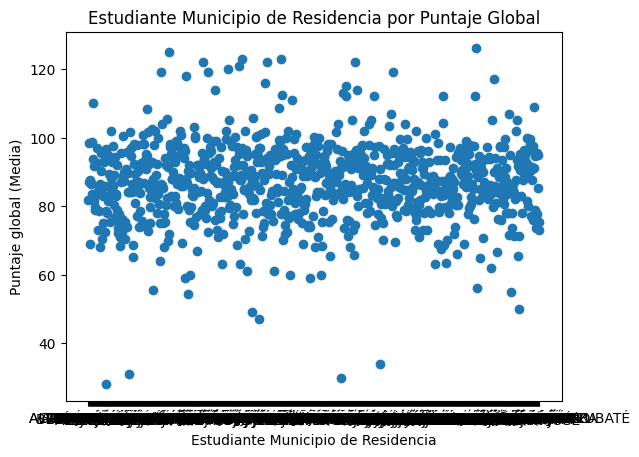

In [93]:
mean_scores = df.groupby('ESTU_MCPIO_RESIDE')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Municipio de Residencia')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Municipio de Residencia por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_MCPIO_RESIDE', ylabel='PUNT_GLOBAL'>

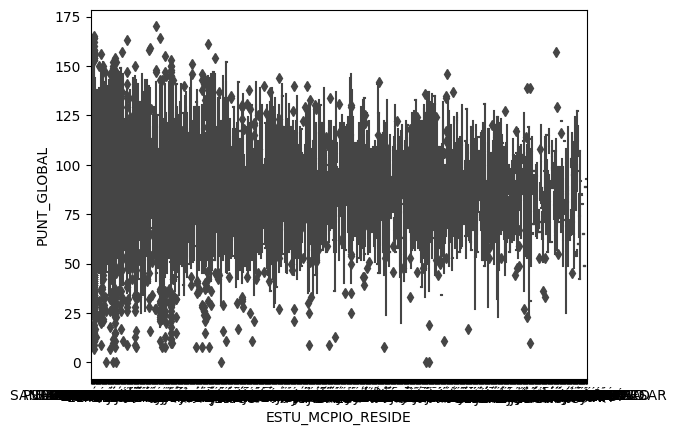

In [96]:
sns.boxplot(x="ESTU_MCPIO_RESIDE", y="PUNT_GLOBAL", data=df)

### Histogram

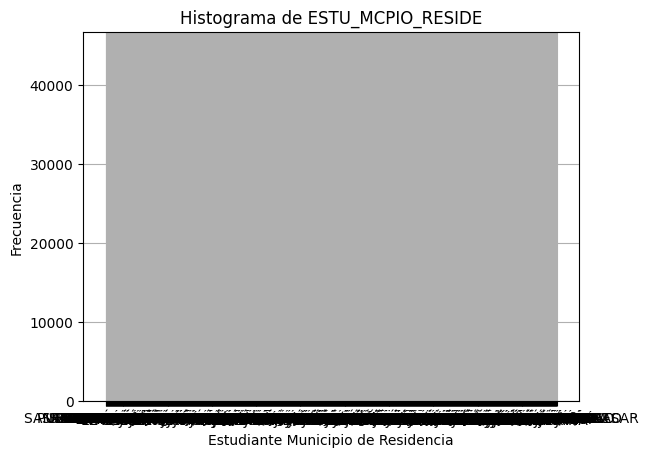

In [95]:
df["ESTU_MCPIO_RESIDE"].hist()

plt.title("Histograma de ESTU_MCPIO_RESIDE")
plt.xlabel("Estudiante Municipio de Residencia")
plt.ylabel("Frecuencia")

plt.show()

### Descartada

Se descarta porque tiene muchas categorias

### No se Descarta

No se descarta y se transforman los datos para crear una nueva categoria, y agrupar en esa categoria los municipios que tengan menos de 30 personas, porque es a partir de 30 que los datos se estabilizan.

In [18]:
grouped = df[['ESTU_MCPIO_RESIDE','PUNT_GLOBAL']].groupby("ESTU_MCPIO_RESIDE").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_MCPIO_RESIDE'].fillna(middle_category, inplace=True)

mcpio_counts = df['ESTU_MCPIO_RESIDE'].value_counts()
otros_mcpios = mcpio_counts[mcpio_counts < 30].index.tolist()
df.loc[df['ESTU_MCPIO_RESIDE'].isin(otros_mcpios), 'ESTU_MCPIO_RESIDE'] = "OTROS"

In [19]:
df[['ESTU_MCPIO_RESIDE','PUNT_GLOBAL']].groupby("ESTU_MCPIO_RESIDE").agg(["count", "mean"])

PUNT_GLOBAL            
                                  count        mean
ESTU_MCPIO_RESIDE                                  
ACACÍAS                              49   86.938776
AGUACHICA                           170   83.588235
AGUAZUL                              39   91.615385
AGUSTÍN CODAZZI                      38   81.526316
AMAGÁ                                34   95.382353
APARTADÓ                            299   81.431438
ARAUCA                               73   86.520548
ARJONA                              117   83.042735
ARMENIA                             606   92.041254
ATRATO                               40   74.775000
BARANOA                              54   86.962963
BARBOSA                             107   88.719626
BARRANCABERMEJA                     506   89.881423
BARRANQUILLA                       1524   90.869423
BELLO                              1001   95.844156
BOGOTÁ D.C.                       19894   98.118930
BOYACÁ                               36   84.444444
BUCARAMANGA                        1035   97.826087
BUENAVENTURA                        161   85.751553
CAJICÁ                              232   93.465517
CALARCÁ                             112   90.705357
CALDAS                              184   95.135870
CALI                               2227   94.738213
CAMPOALEGRE                          58   82.655172
CANDELARIA                           96   86.635417
CAREPA                               90   82.900000
CARTAGENA DE INDIAS                2843   89.018291
CARTAGO                             186   92.150538
CAUCA                                37   91.702703
CAUCASIA                            255   83.431373
CERETÉ                               62   80.677419
CHAPARRAL                            48   86.020833
CHIGORODÓ                            82   85.329268
CHINCHINÁ                            56   94.017857
CHIQUINQUIRÁ                         38   91.342105
CHOCONTÁ                             30   87.900000
CHÍA                                411   97.192214
CIRCASIA                             30   92.933333
CIÉNAGA                             119   80.957983
COGUA                                51   97.372549
COPACABANA                          152   96.125000
COROZAL                              41   86.780488
COTA                                 54   90.351852
CÚCUTA                             1107   89.702800
DAGUA                                37   88.972973
DOSQUEBRADAS                        357   93.761905
DUITAMA                             283   93.452297
EL CARMEN DE VIBORAL                 96   95.385417
EL CERRITO                           67   88.910448
EL SANTUARIO                         30   90.266667
EL TAMBO                             32   86.562500
ENVIGADO                            290   99.710345
ESPINAL                             478   82.684100
FACATATIVÁ                          333   86.924925
FLANDES                              61   84.163934
FLORENCIA                           197   84.989848
FLORIDA                              68   88.661765
FLORIDABLANCA                       462   97.683983
FONSECA                              63   83.682540
FUNDACIÓN                            30   79.633333
FUNZA                               252   97.380952
FUSAGASUGÁ                          245   91.983673
GACHANCIPÁ                           44   95.136364
GALAPA                               53   87.641509
GARZÓN                              232   85.137931
GIRARDOT                            227   89.850220
GIRARDOTA                            82   96.439024
GIRÓN                               259   94.733591
GRANADA                             109   89.220183
GUACARÍ                              47   83.510638
GUADALAJARA DE BUGA                 236   90.542373
GUADUAS                              31   87.483871
GUAMO                                48   81.854167
GUARNE                              104   95.105769
IBAGUÉ                  

- - -
## Variable: ESTU_COD_RESIDE_MCPIO
- - -

In [28]:
df[['ESTU_COD_RESIDE_MCPIO','PUNT_GLOBAL']].groupby("ESTU_COD_RESIDE_MCPIO").agg(["count", "mean"])

PUNT_GLOBAL           
                            count       mean
ESTU_COD_RESIDE_MCPIO                       
5001.0                       4617  94.823695
5002.0                         11  81.727273
5004.0                          2  98.500000
5021.0                          1  97.000000
5030.0                         34  95.382353
...                           ...        ...
95025.0                         3  78.000000
97001.0                         2  60.000000
99001.0                        15  85.133333
99524.0                         1  60.000000
99999.0                         5  88.800000

[974 rows x 2 columns]

### Scatter Plot

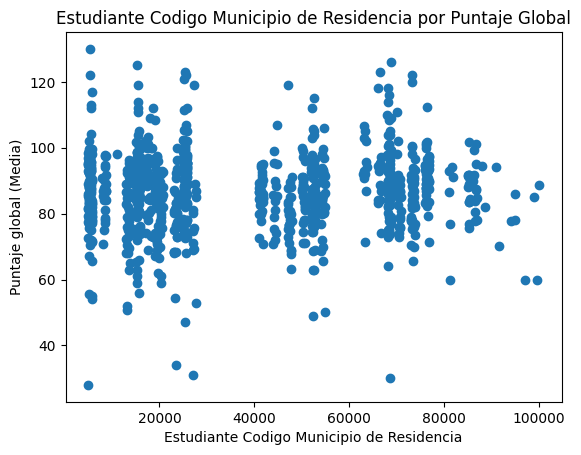

In [97]:
mean_scores = df.groupby('ESTU_COD_RESIDE_MCPIO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Codigo Municipio de Residencia')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Codigo Municipio de Residencia por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_COD_RESIDE_MCPIO', ylabel='PUNT_GLOBAL'>

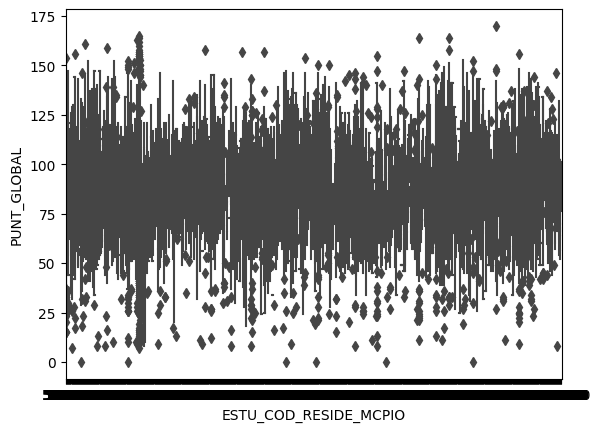

In [98]:
sns.boxplot(x="ESTU_COD_RESIDE_MCPIO", y="PUNT_GLOBAL", data=df)

### Histogram

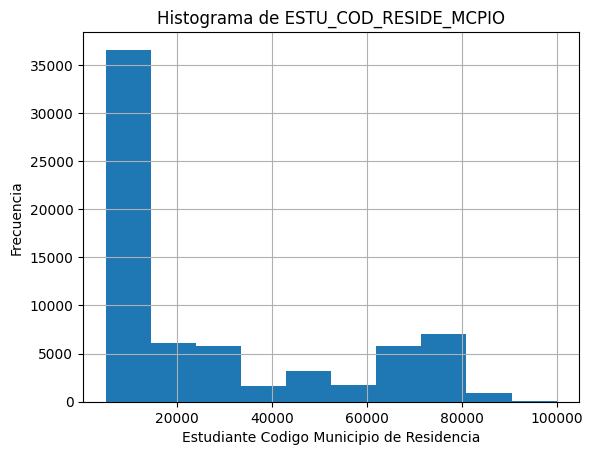

In [99]:
df["ESTU_COD_RESIDE_MCPIO"].hist()

plt.title("Histograma de ESTU_COD_RESIDE_MCPIO")
plt.xlabel("Estudiante Codigo Municipio de Residencia")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta la variable ESTU_COD_RESIDE_MCPIO, porque representa el codigo numerico del municipio lo cual no agrega información relevante con respecto a la variable ESTU_MCPIO_RESIDE

- - -
## Variable: ESTU_AREARESIDE
- - -

In [21]:
df[['ESTU_AREARESIDE','PUNT_GLOBAL']].groupby("ESTU_AREARESIDE").agg(["count", "mean"])

PUNT_GLOBAL           
                         count       mean
ESTU_AREARESIDE                          
Area Rural                9426  88.828878
Cabecera Municipal       59299  93.889273

### Scatter Plot

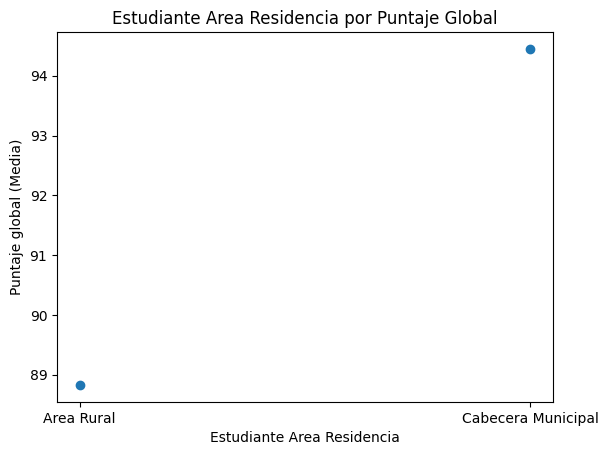

In [100]:
mean_scores = df.groupby('ESTU_AREARESIDE')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Area Residencia')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Area Residencia por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_AREARESIDE', ylabel='PUNT_GLOBAL'>

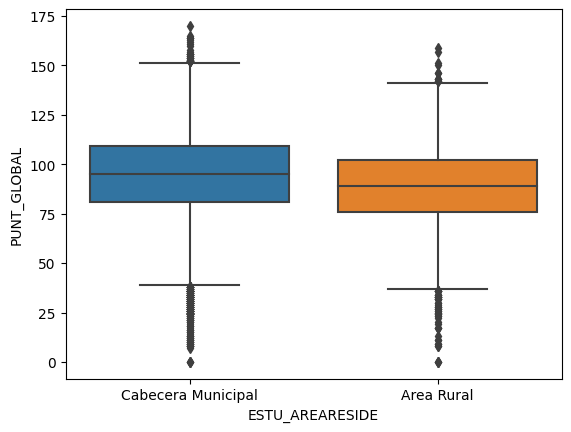

In [101]:
sns.boxplot(x="ESTU_AREARESIDE", y="PUNT_GLOBAL", data=df)

### Histogram

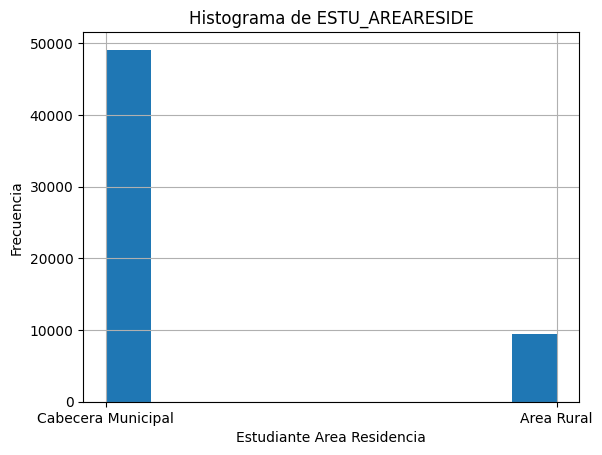

In [102]:
df["ESTU_AREARESIDE"].hist()

plt.title("Histograma de ESTU_AREARESIDE")
plt.xlabel("Estudiante Area Residencia")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta porque es relevante analizar en que influyen las areas donde se reside en el nivel educativo, y se reemplazan los datos nulos por la moda

In [14]:
grouped = df[['ESTU_AREARESIDE','PUNT_GLOBAL']].groupby("ESTU_AREARESIDE").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_AREARESIDE'].fillna(middle_category, inplace=True)

In [15]:
df[['ESTU_AREARESIDE','PUNT_GLOBAL']].groupby("ESTU_AREARESIDE").agg(["count", "mean"])

PUNT_GLOBAL           
                         count       mean
ESTU_AREARESIDE                          
Area Rural                9426  88.828878
Cabecera Municipal       59299  93.889273

- - -
## Variable: ESTU_ESTADOCIVIL
- - -

In [24]:
df[['ESTU_ESTADOCIVIL','PUNT_GLOBAL']].groupby("ESTU_ESTADOCIVIL").agg(["count", "mean"])

PUNT_GLOBAL           
                         count       mean
ESTU_ESTADOCIVIL                         
Casado                    4739  94.446719
Separado y/o Viudo         589  93.550085
Soltero                  45727  93.733440
Unión libre              17670  91.454895

### Scatter Plot

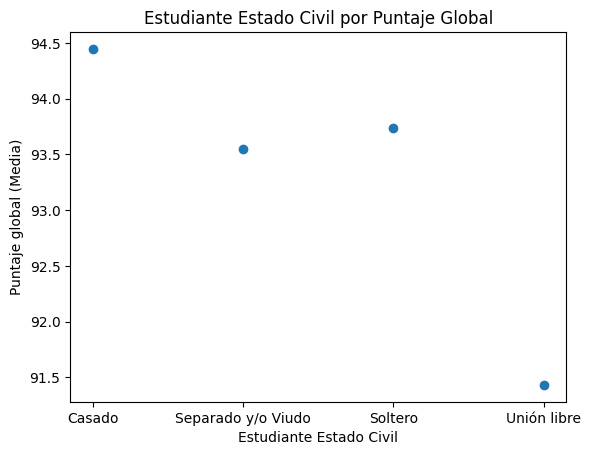

In [103]:
mean_scores = df.groupby('ESTU_ESTADOCIVIL')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Estado Civil')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Estado Civil por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_ESTADOCIVIL', ylabel='PUNT_GLOBAL'>

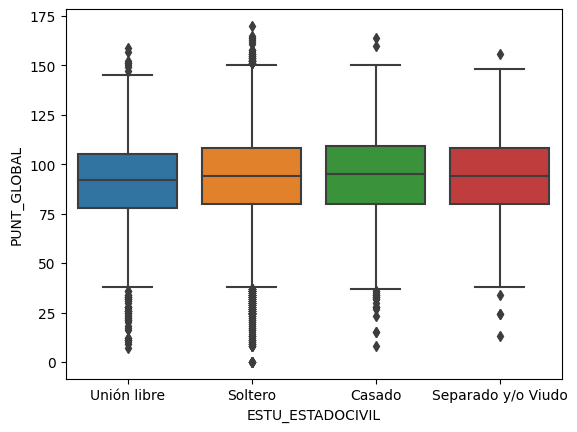

In [104]:
sns.boxplot(x="ESTU_ESTADOCIVIL", y="PUNT_GLOBAL", data=df)

### Histogram

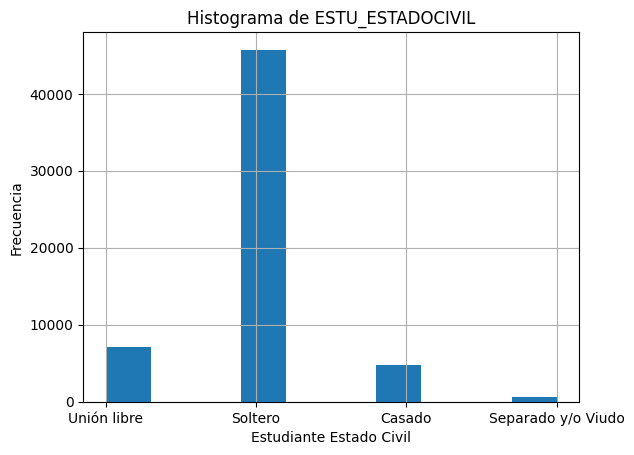

In [105]:
df["ESTU_ESTADOCIVIL"].hist()

plt.title("Histograma de ESTU_ESTADOCIVIL")
plt.xlabel("Estudiante Estado Civil")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta porque es relevante analizar en que influyen el estado civil de una persona en cuanto a nivel educativo, disponibilidad, etc, y se reemplazan los valores nulos por la media

In [16]:
grouped = df[['ESTU_ESTADOCIVIL','PUNT_GLOBAL']].groupby("ESTU_ESTADOCIVIL").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_ESTADOCIVIL'].fillna(middle_category, inplace=True)

In [17]:
df[['ESTU_ESTADOCIVIL','PUNT_GLOBAL']].groupby("ESTU_ESTADOCIVIL").agg(["count", "mean"])

PUNT_GLOBAL           
                         count       mean
ESTU_ESTADOCIVIL                         
Casado                    4739  94.446719
Separado y/o Viudo         589  93.550085
Soltero                  45727  93.733440
Unión libre              17670  91.454895

- - -
## Variable: ESTU_COLE_TERMINO
- - -

In [31]:
df[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby("ESTU_COLE_TERMINO").agg(["count", "mean"])

PUNT_GLOBAL            
                                       count        mean
ESTU_COLE_TERMINO                                       
ABSALON TORRES CAMACHO                    16   89.000000
ACAD CENTRAL DE SISTEMAS ACSI             10   85.900000
ACAD LA SALLE SAN BENILDO                  4  102.250000
ACAD MILIT MARISCAL SUCRE                  2   72.000000
ACAD MILIT NAL HEROES GRANADINOS           3   85.333333
...                                      ...         ...
VENTIUN ANGELES (INST EDUC DIST)          11  101.090909
VILLA CORELCA                              2   77.500000
VILLA DE LOS ANDES                         3   85.000000
VILLA DEL PRADO                            1   84.000000
VILLALOSADA                                1  111.000000

[7201 rows x 2 columns]

### Scatter Plot

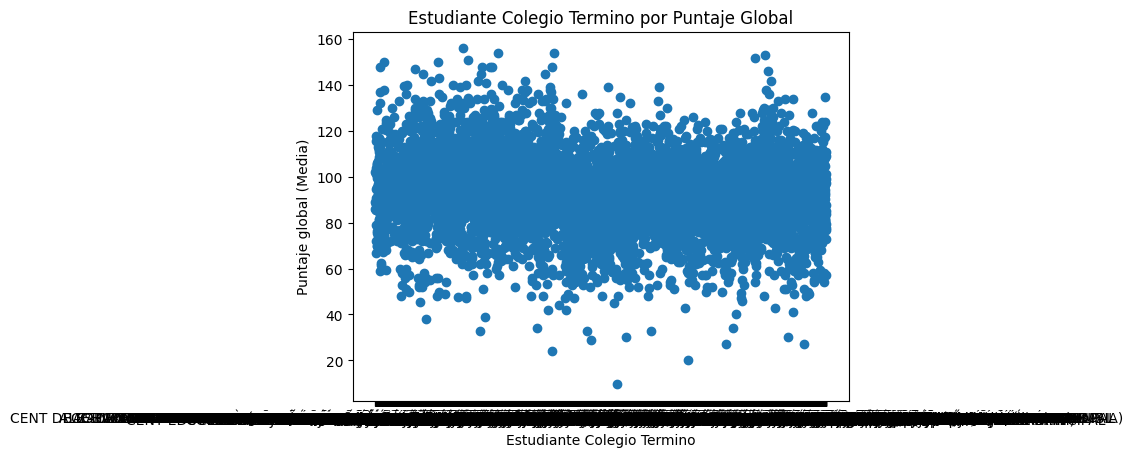

In [124]:
mean_scores = df.groupby('ESTU_COLE_TERMINO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Colegio Termino')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Colegio Termino por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_COLE_TERMINO', ylabel='PUNT_GLOBAL'>

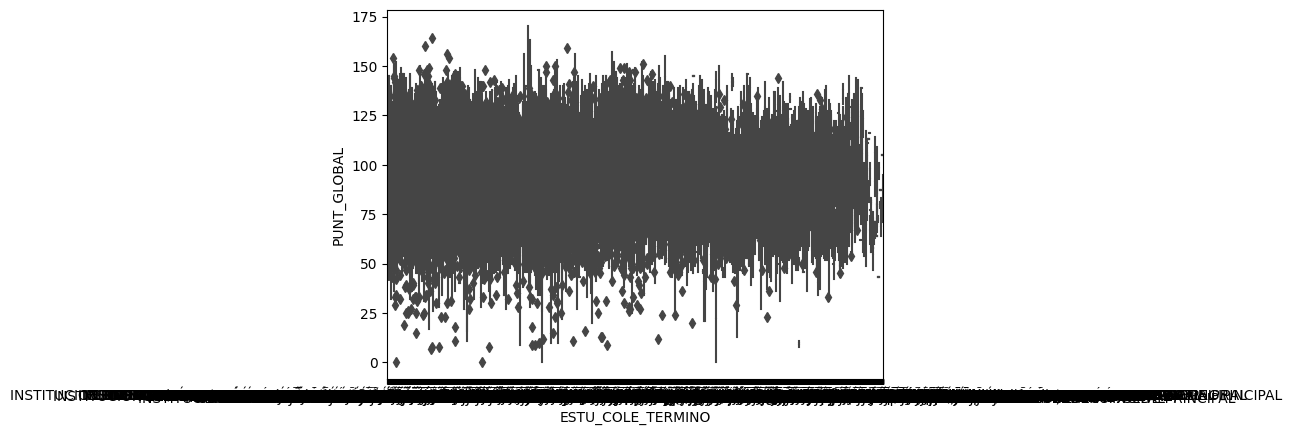

In [125]:
sns.boxplot(x="ESTU_COLE_TERMINO", y="PUNT_GLOBAL", data=df)

### Histogram

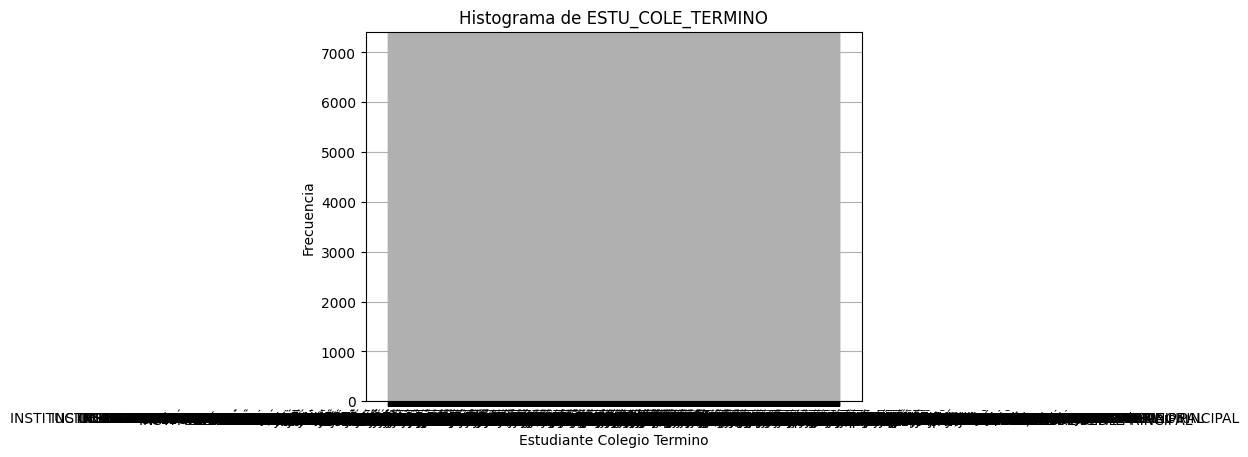

In [126]:
df["ESTU_COLE_TERMINO"].hist()

plt.title("Histograma de ESTU_COLE_TERMINO")
plt.xlabel("Estudiante Colegio Termino")
plt.ylabel("Frecuencia")

plt.show() 

### No se Descarta

No se descarta porque es relevante analizar en que influyen la institucion donde se graduaron, ya que influye directamente en el nivel educativo, y se le hace transformación de los datos para agrupar en OTROS, los que tuvieran menos de 30 estudiantes.

In [18]:
grouped = df[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby("ESTU_COLE_TERMINO").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_COLE_TERMINO'].fillna(middle_category, inplace=True)

pandas_by_inst = df[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby("ESTU_COLE_TERMINO").agg(["count", "mean"])

pandas_by_inst_without_mean = df[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby("ESTU_COLE_TERMINO").count()

s_gr_30 = list(pandas_by_inst_without_mean.query("PUNT_GLOBAL > 30").index)

df["ESTU_COLE_TERMINO"] = df.ESTU_COLE_TERMINO.apply(lambda x: x if x in s_gr_30 else 'OTROS')

In [19]:
df[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby("ESTU_COLE_TERMINO").agg(["count", "mean"])

PUNT_GLOBAL            
                                                         count        mean
ESTU_COLE_TERMINO                                                         
ALDEMAR ROJAS PLAZAS                                        40   99.250000
ANTONIO NARIÑO                                              45   81.111111
BRAULIO GONZALEZ                                            32   91.000000
CARLOS LOZANO Y LOZANO                                      46   93.565217
CARLOS PIZARRO LEON GOMEZ (INST EDUC DIST)                  33   95.787879
CASD HERMOGENES MAZA                                        33  101.757576
CEDID ALFONSO LOPEZ PUMAREJO                                37  101.486486
CEDID CIUDAD BOLIVAR                                        50   99.400000
CEDID GUILLERMO CANO ISAZA                                  34  103.882353
CEDID SAN PABLO BOSA                                        68   95.220588
CENT EDUC DIST ALMIRANTE PADILLA                            32   96.781250
CENT EDUC DIST CARLOS ALBAN HOLGUIN                         34  101.382353
CENT EDUC DIST EL PORVENIR                                  34  101.029412
CENT EDUC DIST GENERAL SANTANDER                            38  108.000000
CENT EDUC DIST GRAN COLOMBIANO                              36  103.138889
CENT EDUC DIST MARRUECOS Y MOLINOS                          32  100.093750
CENT EDUC DIST MIGUEL DE CERVANTES SAAVEDRA                 34  100.294118
CENT EDUC DIST NUEVO CHILE                                  34   98.647059
CIUDAD ESCOLAR DE COMFENALCO                                51   98.705882
COL CLARETIANO                                              43  103.581395
COL DIST EDUC BAS Y MEDIA ALBERTO LLERAS CAMARGO            36  101.416667
COL DIST EDUC BAS Y MEDIA LOS ALPES                         33   94.727273
COL DIST EDUC BAS Y MEDIA RODRIGO LARA BONILLA              58  100.758621
COL DIST ENRIQUE OLAYA HERRERA                              55  100.909091
COL DIST FERNANDO MAZUERA VILLEGAS                          84   93.964286
COL DIST JOSE FELIX RESTREPO                                44  102.886364
COL DIST LA MERCED                                          53  104.528302
COL DIST REP DE COSTA RICA                                  41   99.804878
COL DIST TOMAS RUEDA VARGAS                                 55  100.509091
COL DIST VENECIA                                            33   98.060606
COL INTEGD JUAN ATALAYA                                     34   92.176471
COL LUIS CARLOS GALAN SARMIENTO                             35   88.171429
COL NAL ANDRES BELLO                                        47  100.510638
COL NAL NICOLAS ESGUERRA                                    51  110.019608
COL NAL RESTREPO MILLAN                                     42  100.547619
COL PABLO CORREA LEON                                       40   93.250000
COL. MILITAR ALMIRANTE COLON                                78   97.525641
COLEGIO JOSÉ FRANCISCO SOCARRAS (IED) - SEDE PR...          31  102.354839
COLEGIO MANUEL CEPEDA VARGAS (IED) - SEDE PRINC...          33  104.090909
COLEGIO TECNICO INDUSTRIAL JOSE ELIAS PUYANA                39  101.717949
COLEGIO TECNICO MUNICIPAL SIMÓN BOLIVAR                     31   93.451613
COLEGIO TECNISISTEMAS - SEDE PRINCIPAL                      51   92.705882
COLEGIO UNIVERSITARIO                                       34   97.176471
ESCUELA NORMAL SUPERIOR                                     47   93.234043
I. E. SANTO TOMAS DE AQUINO                                 31   95.677419
I.E. ROBERTO VELANDIA - SEDE PRICIPAL                       33   99.787879
I.E. SAN ISIDORO - SEDE PRINCIPAL                           68   84.705882
I.E.M. LICEO INTEGRADO - SEDE PRINCIPAL                     34   92.176471
I.E.M. SANTIAGO PEREZ - SEDE PRINCIPAL                      39   97.641026
I.E.T. FELIX TIBERIO GUZMAN - SEDE PRINCIPAL                44   86.750000
I.E.T. GENERAL ROBERTO LEYVA SEDE CAMPESTRE - S...          37   82.054054
I

- - -
## Variable: ESTU_CODDANE_COLE_TERMINO
- - -

In [35]:
df[['ESTU_CODDANE_COLE_TERMINO','PUNT_GLOBAL']].groupby("ESTU_CODDANE_COLE_TERMINO").agg(["count", "mean"])

PUNT_GLOBAL            
                                count        mean
ESTU_CODDANE_COLE_TERMINO                        
0.000000e+00                        9   89.222222
1.050010e+10                       10   90.300000
1.500010e+10                        3  110.333333
3.080010e+10                        1   88.000000
3.080010e+10                        1   77.000000
...                               ...         ...
6.254730e+11                        1   72.000000
8.180011e+11                        1   73.000000
8.180011e+11                        4   71.500000
8.230011e+11                        1   51.000000
8.470010e+11                        3  100.333333

[7650 rows x 2 columns]

### Descartado

Se descarta la variable ESTU_CODDANE_COLE_TERMINO, porque representa el codigo numerico del municipio lo cual no agrega información relevante con respecto a la variable ESTU_COLE_TERMINO

- - -
## Variable: ESTU_COD_COLE_MCPIO_TERMINO
- - -

In [36]:
df[['ESTU_COD_COLE_MCPIO_TERMINO','PUNT_GLOBAL']].groupby("ESTU_COD_COLE_MCPIO_TERMINO").agg(["count", "mean"])

PUNT_GLOBAL            
                                  count        mean
ESTU_COD_COLE_MCPIO_TERMINO                        
5001.0                             2340   96.696154
5002.0                               16  100.125000
5004.0                                1  103.000000
5030.0                               25   95.840000
5031.0                               26   89.961538
...                                 ...         ...
97001.0                               5   80.200000
99001.0                               9   85.888889
99524.0                               6   73.166667
99624.0                               1   79.000000
99773.0                               1  108.000000

[1031 rows x 2 columns]

### Descartado

Se descarta la variable ESTU_COD_COLE_MCPIO_TERMINO, porque ya tenemos una variable para el municipio y otra para el colegio en el que se graduo, y no es relevente a que municipio pertenece cual colegio

- - -
## Variable: ESTU_OTROCOLE_TERMINO
- - -

In [37]:
df[['ESTU_OTROCOLE_TERMINO','PUNT_GLOBAL']].groupby("ESTU_OTROCOLE_TERMINO").agg(["count", "mean"])

PUNT_GLOBAL       
                                               count   mean
ESTU_OTROCOLE_TERMINO                                      
(I.E.D) PARAISO MIRADOR                            1  100.0
20 De julio                                        1  111.0
21 Angeles                                         1  113.0
A.A.E. MIRAVALLE                                   1   85.0
ACADEMIA AMERICANA DE SISTEMAS Y COMERCI           1   91.0
...                                              ...    ...
usminia D.C                                        1   99.0
validacion por icfes                               1   82.0
victor camargo alvarez                             1   82.0
vida y paz rodrigo arenas b                        1  126.0
ídem carlos perez mejia                            1   61.0

[9655 rows x 2 columns]

### Descartado

Se descarta la variable ESTU_OTROCOLE_TERMINO, porque todos los datos tienen maximo uno, por lo que no influye en el resultado del puntaje global

- - -
## Variable: ESTU_TITULOOBTENIDOBACHILLER (INDECISOS)
- - -

In [38]:
df[['ESTU_TITULOOBTENIDOBACHILLER','PUNT_GLOBAL']].groupby("ESTU_TITULOOBTENIDOBACHILLER").agg(["count", "mean"])

PUNT_GLOBAL           
                                        count       mean
ESTU_TITULOOBTENIDOBACHILLER                            
Bachiller académico                     39880  93.251204
Bachiller pedagógico o normalista         739  94.675237
Bachiller técnico                       17846  94.153424

### Scatter Plot

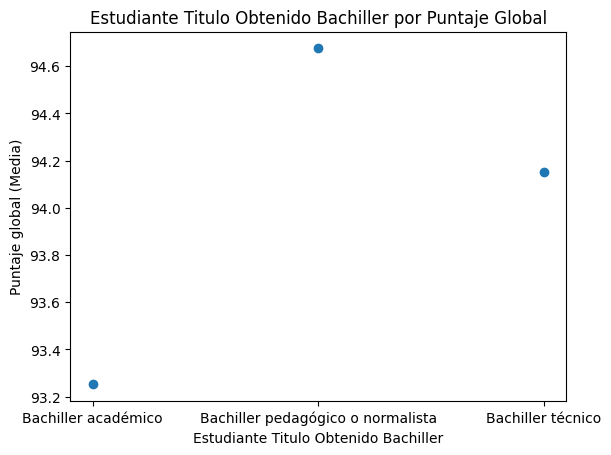

In [108]:
mean_scores = df.groupby('ESTU_TITULOOBTENIDOBACHILLER')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Titulo Obtenido Bachiller')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Titulo Obtenido Bachiller por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_TITULOOBTENIDOBACHILLER', ylabel='PUNT_GLOBAL'>

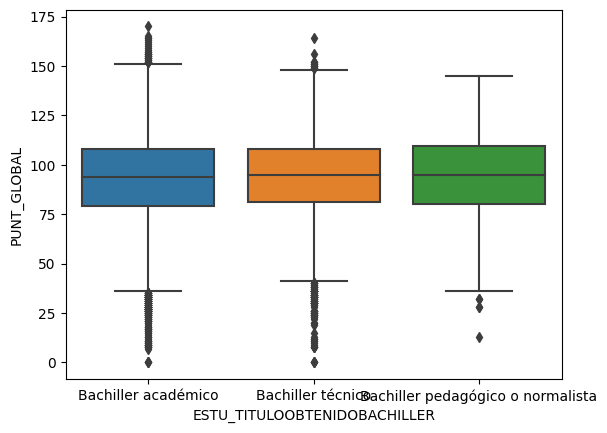

In [109]:
sns.boxplot(x="ESTU_TITULOOBTENIDOBACHILLER", y="PUNT_GLOBAL", data=df)

### Histogram

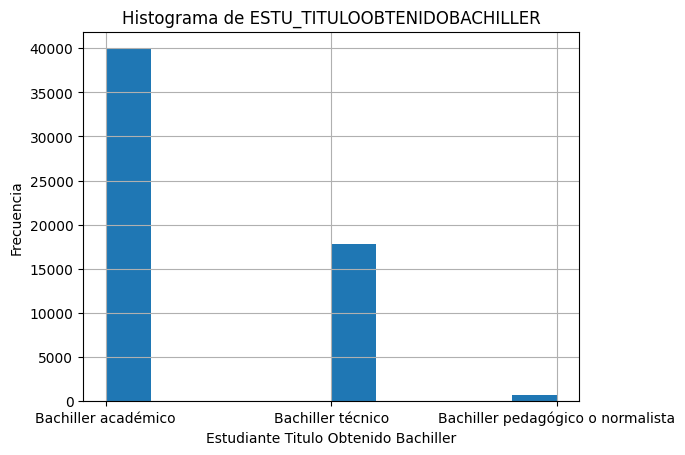

In [110]:
df["ESTU_TITULOOBTENIDOBACHILLER"].hist()

plt.title("Histograma de ESTU_TITULOOBTENIDOBACHILLER")
plt.xlabel("Estudiante Titulo Obtenido Bachiller")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_TITULOOBTENIDOBACHILLER porque las media son practicamente las mismas, esto quiere decir que no representa una cambio considerable para el analisis

- - -
## Variable: ESTU_PAGOMATRICULABECA
- - -

In [39]:
df[['ESTU_PAGOMATRICULABECA','PUNT_GLOBAL']].groupby("ESTU_PAGOMATRICULABECA").agg(["count", "mean"])

PUNT_GLOBAL           
                             count       mean
ESTU_PAGOMATRICULABECA                       
No                           48219  93.521765
Si                           10242  93.653388

### Scatter Plot

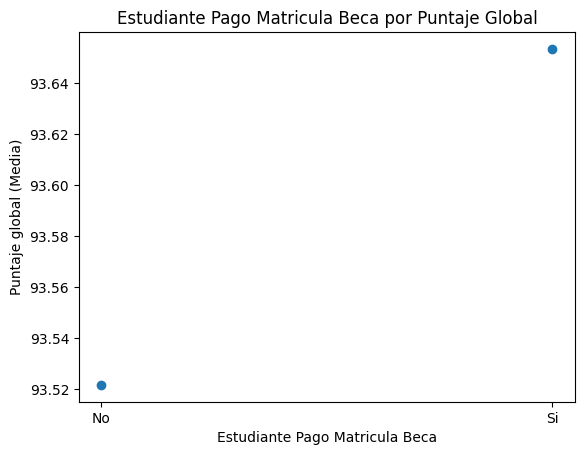

In [111]:
mean_scores = df.groupby('ESTU_PAGOMATRICULABECA')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Pago Matricula Beca')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Pago Matricula Beca por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_PAGOMATRICULABECA', ylabel='PUNT_GLOBAL'>

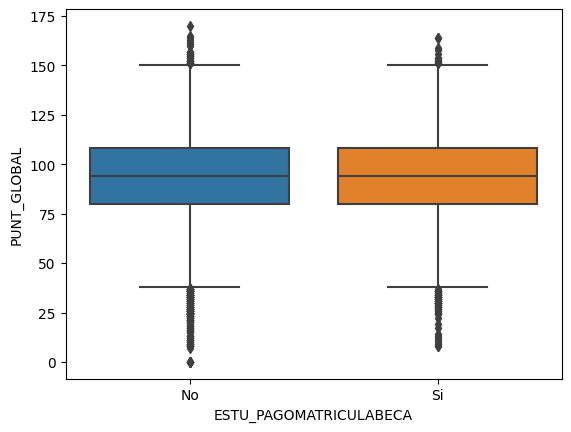

In [112]:
sns.boxplot(x="ESTU_PAGOMATRICULABECA", y="PUNT_GLOBAL", data=df)

### Histogram

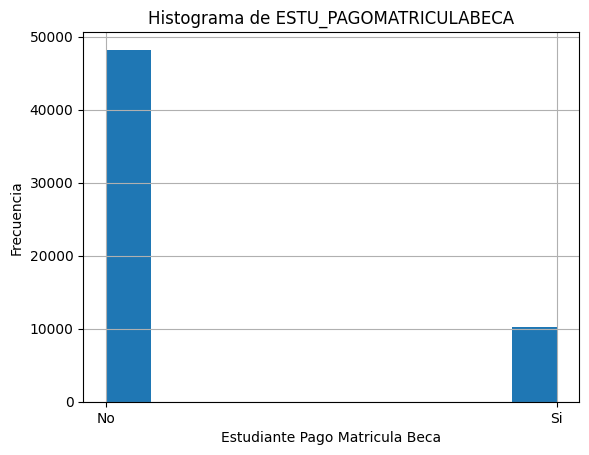

In [113]:
df["ESTU_PAGOMATRICULABECA"].hist()

plt.title("Histograma de ESTU_PAGOMATRICULABECA")
plt.xlabel("Estudiante Pago Matricula Beca")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_PAGOMATRICULABECA porque las media son practicamente las mismas, esto quiere decir que no representa una cambio considerable para el analisis

- - -
## Variable: ESTU_PAGOMATRICULACREDITO
- - -

In [40]:
df[['ESTU_PAGOMATRICULACREDITO','PUNT_GLOBAL']].groupby("ESTU_PAGOMATRICULACREDITO").agg(["count", "mean"])

PUNT_GLOBAL           
                                count       mean
ESTU_PAGOMATRICULACREDITO                       
No                              52463  93.341155
Si                               5998  95.328943

### Scatter Plot

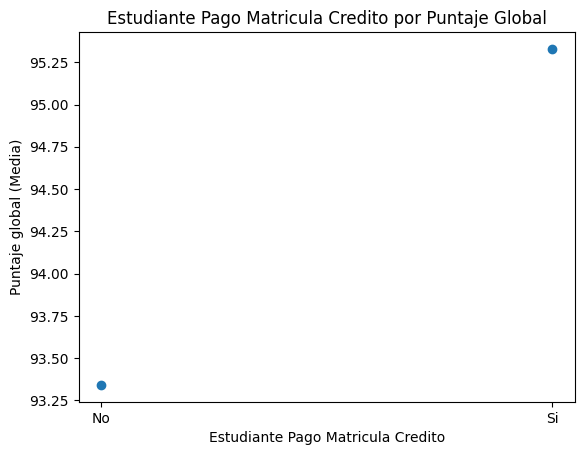

In [115]:
mean_scores = df.groupby('ESTU_PAGOMATRICULACREDITO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Pago Matricula Credito')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Pago Matricula Credito por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_PAGOMATRICULACREDITO', ylabel='PUNT_GLOBAL'>

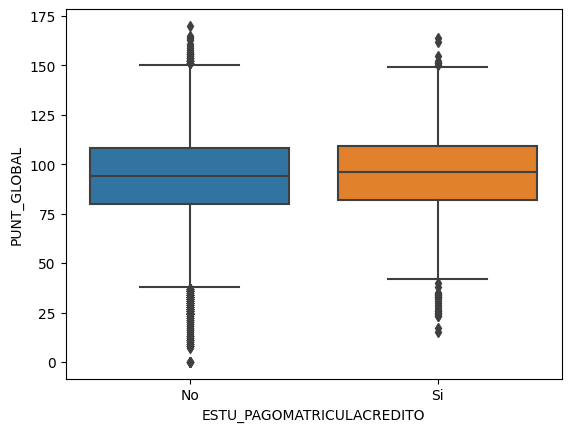

In [116]:
sns.boxplot(x="ESTU_PAGOMATRICULACREDITO", y="PUNT_GLOBAL", data=df)

### Histogram

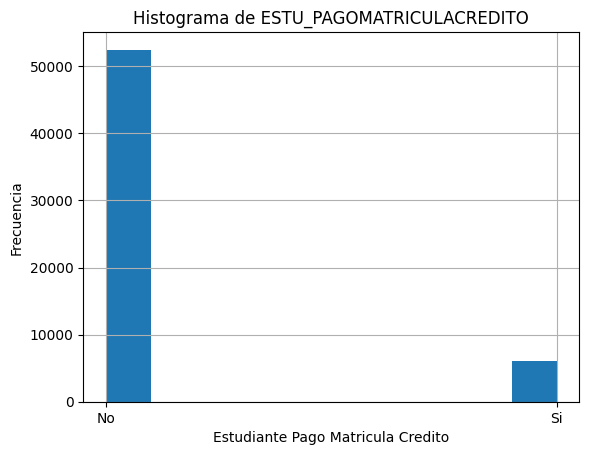

In [117]:
df["ESTU_PAGOMATRICULACREDITO"].hist()

plt.title("Histograma de ESTU_PAGOMATRICULACREDITO")
plt.xlabel("Estudiante Pago Matricula Credito")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_PAGOMATRICULACREDITO porque las media son practicamente las mismas, esto quiere decir que no representa una cambio considerable para el analisis

- - -
## Variable: ESTU_PAGOMATRICULAPADRES
- - -

In [41]:
df[['ESTU_PAGOMATRICULAPADRES','PUNT_GLOBAL']].groupby("ESTU_PAGOMATRICULAPADRES").agg(["count", "mean"])

PUNT_GLOBAL           
                               count       mean
ESTU_PAGOMATRICULAPADRES                       
No                             42734  93.584804
Si                             15729  93.438553

### Scatter Plot

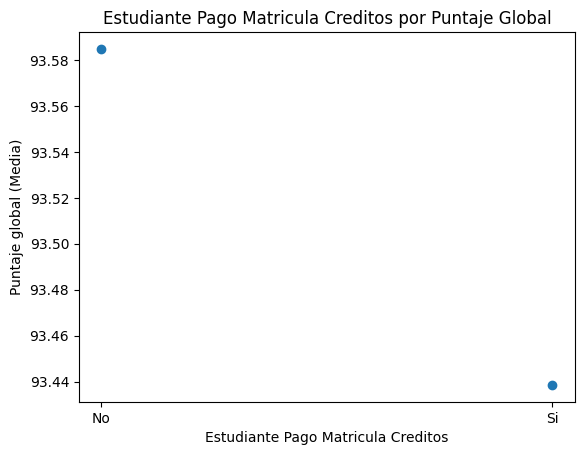

In [118]:
mean_scores = df.groupby('ESTU_PAGOMATRICULAPADRES')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Pago Matricula Creditos')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Pago Matricula Creditos por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_PAGOMATRICULAPADRES', ylabel='PUNT_GLOBAL'>

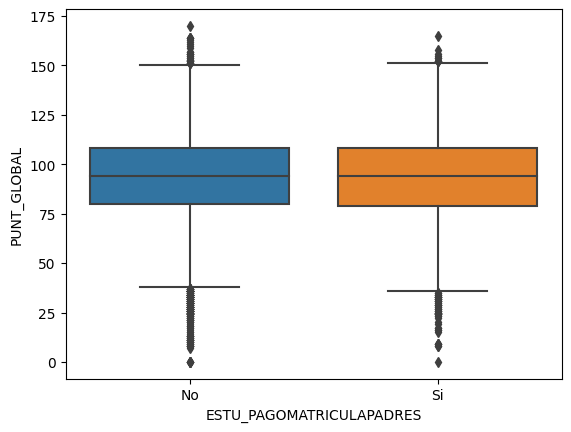

In [119]:
sns.boxplot(x="ESTU_PAGOMATRICULAPADRES", y="PUNT_GLOBAL", data=df)

### Histogram

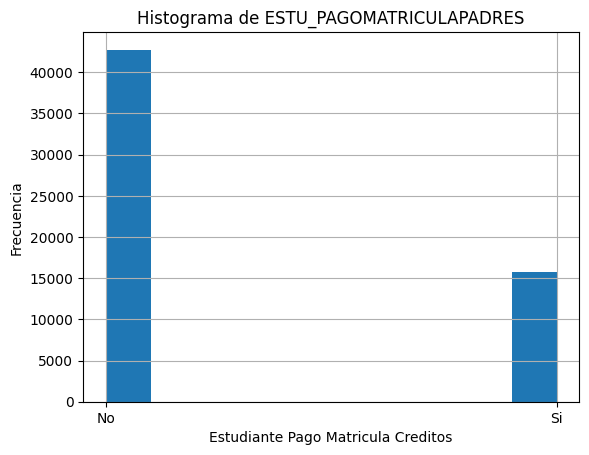

In [120]:
df["ESTU_PAGOMATRICULAPADRES"].hist()

plt.title("Histograma de ESTU_PAGOMATRICULAPADRES")
plt.xlabel("Estudiante Pago Matricula Creditos")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_PAGOMATRICULAPADRES porque las media son practicamente las mismas, esto quiere decir que no representa una cambio considerable para el analisis

- - -
## Variable: ESTU_PAGOMATRICULAPROPIO
- - -

In [42]:
df[['ESTU_PAGOMATRICULAPROPIO','PUNT_GLOBAL']].groupby("ESTU_PAGOMATRICULAPROPIO").agg(["count", "mean"])

PUNT_GLOBAL           
                               count       mean
ESTU_PAGOMATRICULAPROPIO                       
No                             40894  92.738813
Si                             17567  95.423408

### Scatter Plot

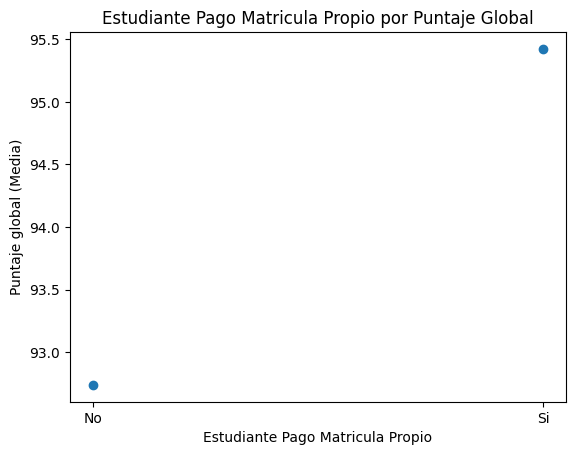

In [121]:
mean_scores = df.groupby('ESTU_PAGOMATRICULAPROPIO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Pago Matricula Propio')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Pago Matricula Propio por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_PAGOMATRICULAPROPIO', ylabel='PUNT_GLOBAL'>

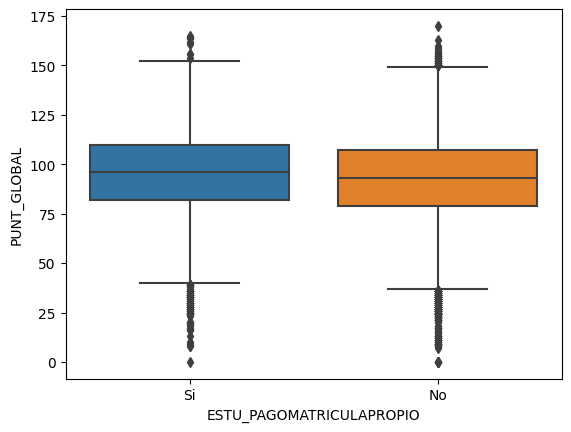

In [122]:
sns.boxplot(x="ESTU_PAGOMATRICULAPROPIO", y="PUNT_GLOBAL", data=df)

### Histogram

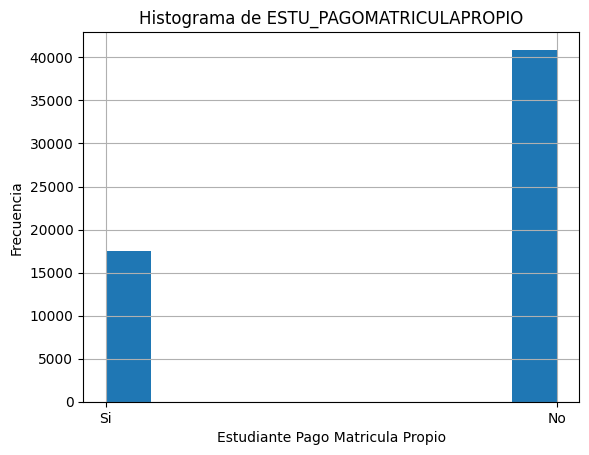

In [123]:
df["ESTU_PAGOMATRICULAPROPIO"].hist()

plt.title("Histograma de ESTU_PAGOMATRICULAPROPIO")
plt.xlabel("Estudiante Pago Matricula Propio")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_PAGOMATRICULAPROPIO porque las media son muy similares, esto quiere decir que no representa una cambio considerable para el analisis

- - -
## Variable: ESTU_COMOCAPACITOEXAMENSB11
- - -

In [21]:
df[['ESTU_COMOCAPACITOEXAMENSB11','PUNT_GLOBAL']].groupby("ESTU_COMOCAPACITOEXAMENSB11").agg(["count", "mean"])

PUNT_GLOBAL           
                                               count       mean
ESTU_COMOCAPACITOEXAMENSB11                                    
No realizó ninguna prueba de preparación       21300  93.214554
Repasó por cuenta propia                       42010  93.749893
Tomó un curso de preparación                    5415  88.815882

### Scatter Plot

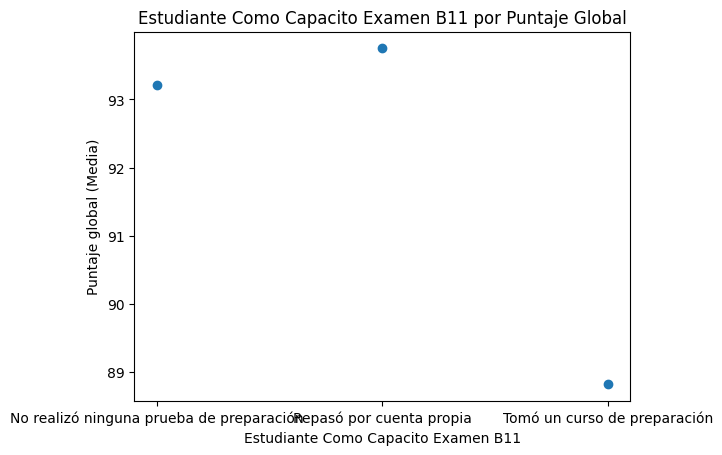

In [127]:
mean_scores = df.groupby('ESTU_COMOCAPACITOEXAMENSB11')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Como Capacito Examen B11')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Como Capacito Examen B11 por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_COMOCAPACITOEXAMENSB11', ylabel='PUNT_GLOBAL'>

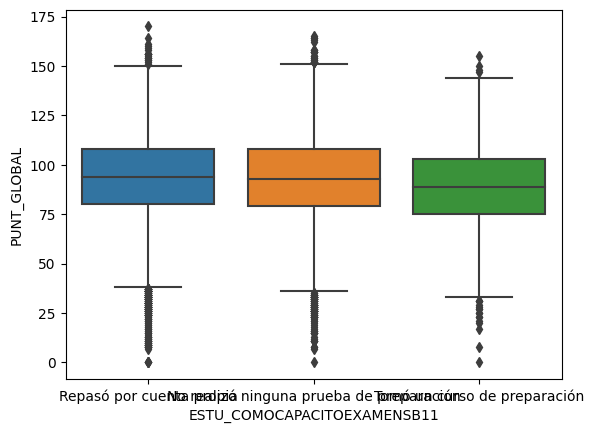

In [128]:
sns.boxplot(x="ESTU_COMOCAPACITOEXAMENSB11", y="PUNT_GLOBAL", data=df)

### Histogram

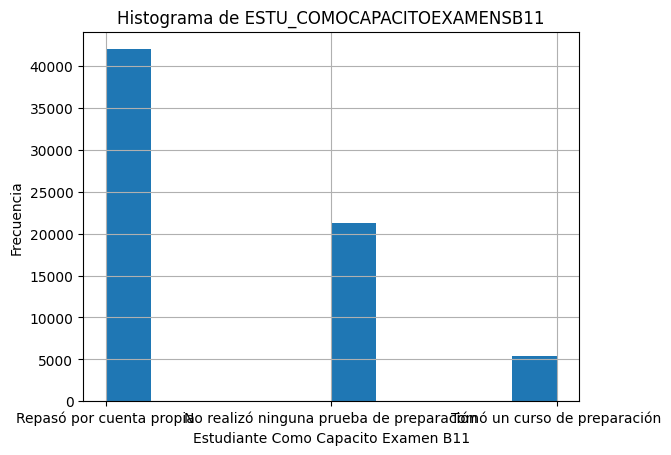

In [129]:
df["ESTU_COMOCAPACITOEXAMENSB11"].hist()

plt.title("Histograma de ESTU_COMOCAPACITOEXAMENSB11")
plt.xlabel("Estudiante Como Capacito Examen B11")
plt.ylabel("Frecuencia")

plt.show()

### No se descarta

No se descarta la variable ESTU_COMOCAPACITOEXAMENSB11, y se quitan los valores nulos.

In [20]:
grouped = df[['ESTU_COMOCAPACITOEXAMENSB11','PUNT_GLOBAL']].groupby("ESTU_COMOCAPACITOEXAMENSB11").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_COMOCAPACITOEXAMENSB11'].fillna(middle_category, inplace=True)

In [21]:
df[['ESTU_COMOCAPACITOEXAMENSB11','PUNT_GLOBAL']].groupby("ESTU_COMOCAPACITOEXAMENSB11").agg(["count", "mean"])

PUNT_GLOBAL           
                                               count       mean
ESTU_COMOCAPACITOEXAMENSB11                                    
No realizó ninguna prueba de preparación       21300  93.214554
Repasó por cuenta propia                       42010  93.749893
Tomó un curso de preparación                    5415  88.815882

- - -
## Variable: ESTU_TIPODOCUMENTOSB11
- - -

In [44]:
df[['ESTU_TIPODOCUMENTOSB11','PUNT_GLOBAL']].groupby("ESTU_TIPODOCUMENTOSB11").agg(["count", "mean"])

PUNT_GLOBAL           
                             count       mean
ESTU_TIPODOCUMENTOSB11                       
CC                           21110  89.074751
CE                              68  99.661765
CR                             785  91.899363
PE                               9  93.666667
TI                           35827  96.200045

### Scatter Plot

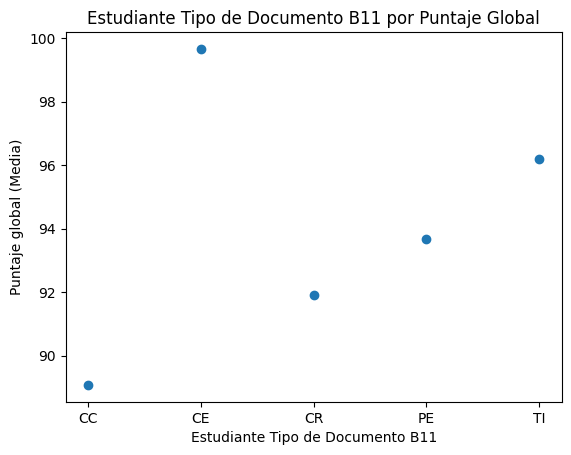

In [130]:
mean_scores = df.groupby('ESTU_TIPODOCUMENTOSB11')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Tipo de Documento B11')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Tipo de Documento B11 por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_TIPODOCUMENTOSB11', ylabel='PUNT_GLOBAL'>

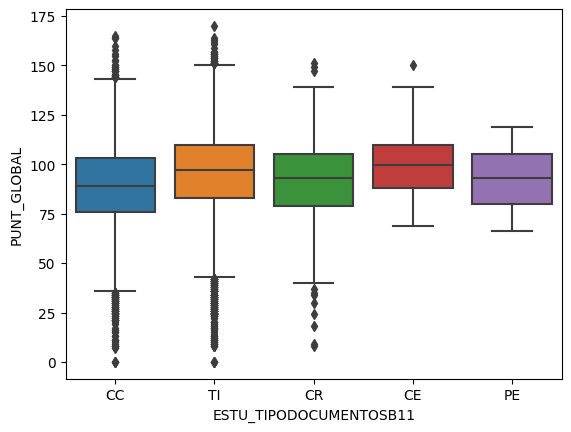

In [131]:
sns.boxplot(x="ESTU_TIPODOCUMENTOSB11", y="PUNT_GLOBAL", data=df)

### Histogram

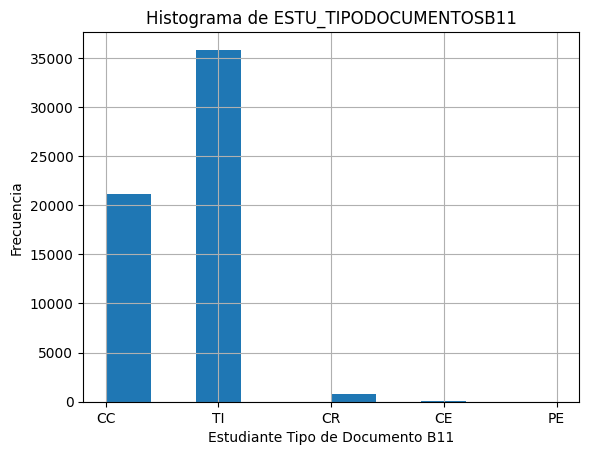

In [132]:
df["ESTU_TIPODOCUMENTOSB11"].hist()

plt.title("Histograma de ESTU_TIPODOCUMENTOSB11")
plt.xlabel("Estudiante Tipo de Documento B11")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_TIPODOCUMENTOSB11 porque los datos estan muy parejos, y esta relaciona con la variable ESTU_COMOCAPACITOEXAMENSB11

- - -
## Variable: ESTU_SEMESTRECURSA
- - -

In [81]:
df[['ESTU_SEMESTRECURSA','PUNT_GLOBAL']].groupby("ESTU_SEMESTRECURSA").agg(["count", "mean"])

PUNT_GLOBAL           
                         count       mean
ESTU_SEMESTRECURSA                       
1                         1055  85.646445
2                         2755  84.731397
3                         9520  93.048739
4                        32413  92.306914
5                         5428  97.302690
6                        10891  95.221743
7                         2897  97.080083
8                         1463  97.249487
9                         1007  96.677259
10                         542  94.616236
11                          70  94.742857
12                         684  86.662281

### Scatter Plot

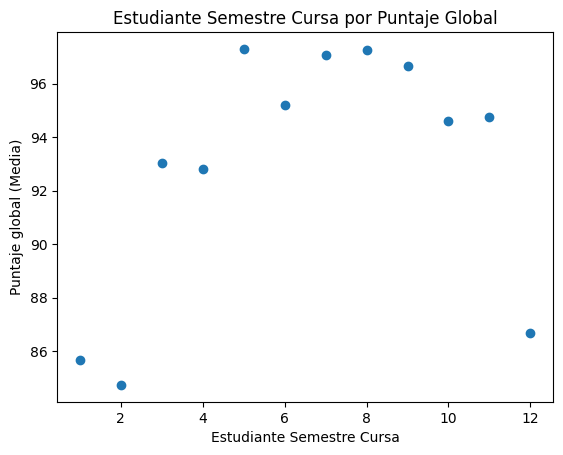

In [134]:
df["ESTU_SEMESTRECURSA"] = df["ESTU_SEMESTRECURSA"].replace("12 o más", 12)
df["ESTU_SEMESTRECURSA"] = pd.to_numeric(df["ESTU_SEMESTRECURSA"], errors="coerce")

mean_scores = df.groupby('ESTU_SEMESTRECURSA')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Semestre Cursa')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Semestre Cursa por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_SEMESTRECURSA', ylabel='PUNT_GLOBAL'>

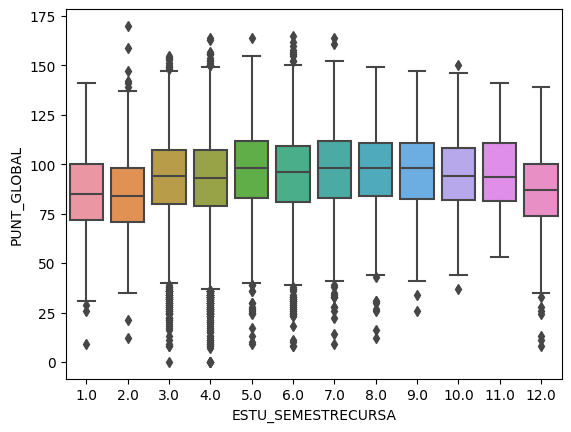

In [135]:
sns.boxplot(x="ESTU_SEMESTRECURSA", y="PUNT_GLOBAL", data=df)

### Histogram

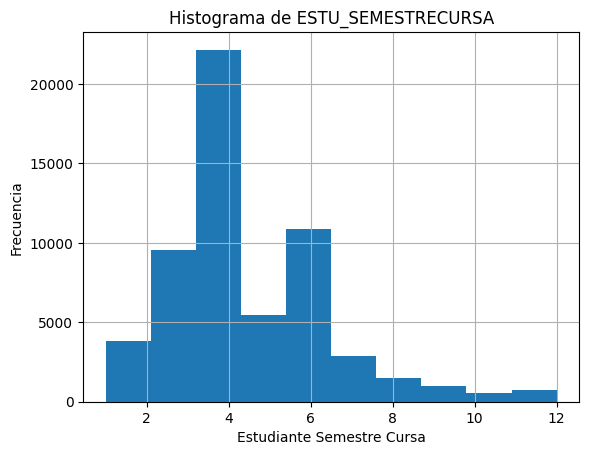

In [136]:
df["ESTU_SEMESTRECURSA"].hist()

plt.title("Histograma de ESTU_SEMESTRECURSA")
plt.xlabel("Estudiante Semestre Cursa")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_SEMESTRECURSA porque es relevante para el analisis y se le hace la transformación de los datos:

In [22]:
df["ESTU_SEMESTRECURSA"] = df["ESTU_SEMESTRECURSA"].replace("12 o más", 12)
df["ESTU_SEMESTRECURSA"] = pd.to_numeric(df["ESTU_SEMESTRECURSA"], errors="coerce")

mean_semestre = df["ESTU_SEMESTRECURSA"].median()

df["ESTU_SEMESTRECURSA"] = df["ESTU_SEMESTRECURSA"].fillna(mean_semestre)

df["ESTU_SEMESTRECURSA"] = df["ESTU_SEMESTRECURSA"].astype(int)

In [23]:
df[['ESTU_SEMESTRECURSA','PUNT_GLOBAL']].groupby("ESTU_SEMESTRECURSA").agg(["count", "mean"])

PUNT_GLOBAL           
                         count       mean
ESTU_SEMESTRECURSA                       
1                         1055  85.646445
2                         2755  84.731397
3                         9520  93.048739
4                        32413  92.306914
5                         5428  97.302690
6                        10891  95.221743
7                         2897  97.080083
8                         1463  97.249487
9                         1007  96.677259
10                         542  94.616236
11                          70  94.742857
12                         684  86.662281

- - -
## Variable: FAMI_EDUCACIONPADRE
- - -

In [23]:
df[['FAMI_EDUCACIONPADRE','PUNT_GLOBAL']].groupby("FAMI_EDUCACIONPADRE").agg(["count", "mean"])

PUNT_GLOBAL            
                                           count        mean
FAMI_EDUCACIONPADRE                                         
Educación profesional completa              6462   85.296967
Educación profesional incompleta            1079  100.895273
Ninguno                                     2040   86.935294
No Aplica                                   1114   95.954219
No sabe                                     2449   98.349122
Postgrado                                    734  103.897820
Primaria completa                           7825   92.460319
Primaria incompleta                        16636   91.592811
Secundaria (Bachillerato) completa         13779   95.038827
Secundaria (Bachillerato) incompleta        8550   94.630058
Técnica o tecnológica completa              5904   97.220698
Técnica o tecnológica incompleta            2153   94.551324

### Scatter Plot

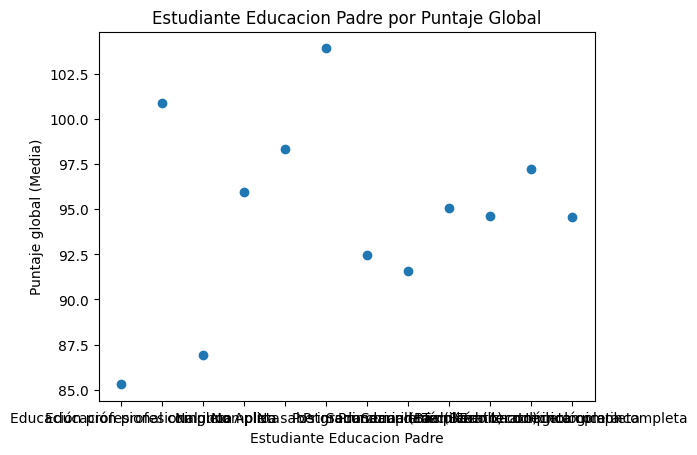

In [137]:
mean_scores = df.groupby('FAMI_EDUCACIONPADRE')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Educacion Padre')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Educacion Padre por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_EDUCACIONPADRE', ylabel='PUNT_GLOBAL'>

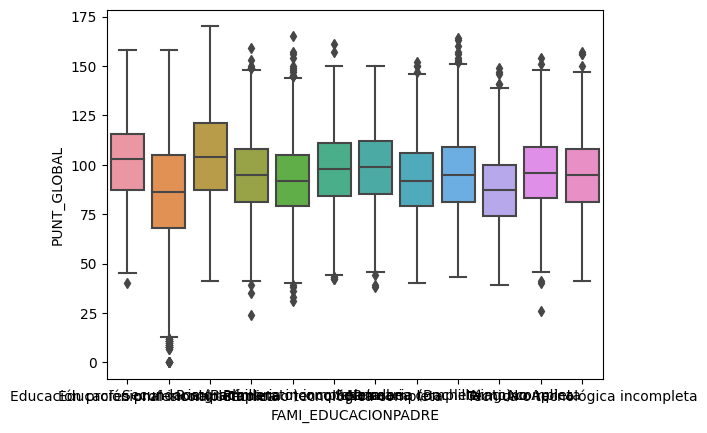

In [138]:
sns.boxplot(x="FAMI_EDUCACIONPADRE", y="PUNT_GLOBAL", data=df)

### Histogram

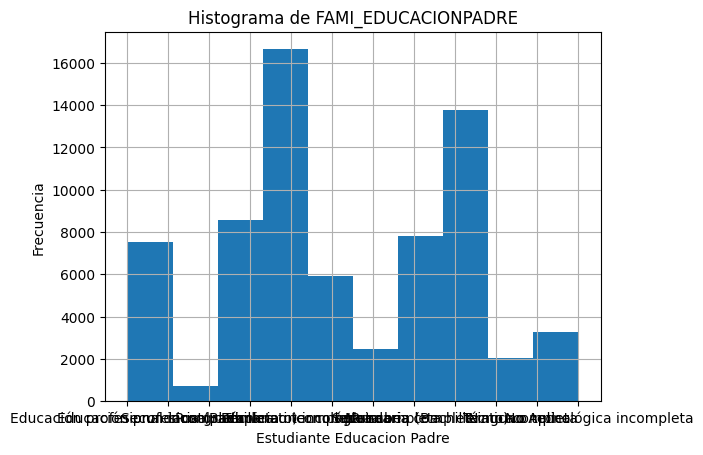

In [139]:
df["FAMI_EDUCACIONPADRE"].hist()

plt.title("Histograma de FAMI_EDUCACIONPADRE")
plt.xlabel("Estudiante Educacion Padre")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta FAMI_EDUCACIONPADRE porque es relevante para el analisis

In [24]:
grouped = df[['FAMI_EDUCACIONPADRE','PUNT_GLOBAL']].groupby("FAMI_EDUCACIONPADRE").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['FAMI_EDUCACIONPADRE'].fillna(middle_category, inplace=True)

In [25]:
df[['FAMI_EDUCACIONPADRE','PUNT_GLOBAL']].groupby("FAMI_EDUCACIONPADRE").agg(["count", "mean"])

PUNT_GLOBAL            
                                           count        mean
FAMI_EDUCACIONPADRE                                         
Educación profesional completa              6462   85.296967
Educación profesional incompleta            1079  100.895273
Ninguno                                     2040   86.935294
No Aplica                                   1114   95.954219
No sabe                                     2449   98.349122
Postgrado                                    734  103.897820
Primaria completa                           7825   92.460319
Primaria incompleta                        16636   91.592811
Secundaria (Bachillerato) completa         13779   95.038827
Secundaria (Bachillerato) incompleta        8550   94.630058
Técnica o tecnológica completa              5904   97.220698
Técnica o tecnológica incompleta            2153   94.551324

- - -
## Variable: FAMI_EDUCACIONMADRE
- - -

In [25]:
df[['FAMI_EDUCACIONMADRE','PUNT_GLOBAL']].groupby("FAMI_EDUCACIONMADRE").agg(["count", "mean"])

PUNT_GLOBAL            
                                           count        mean
FAMI_EDUCACIONMADRE                                         
Educación profesional completa              6773   85.805109
Educación profesional incompleta            1013   99.605133
Ninguno                                     1286   86.567652
No Aplica                                    147   88.965986
No sabe                                      383   94.091384
Postgrado                                    934  103.153105
Primaria completa                           8176   91.989114
Primaria incompleta                        13097   90.892571
Secundaria (Bachillerato) completa         16254   95.018826
Secundaria (Bachillerato) incompleta       10700   94.626542
Técnica o tecnológica completa              7638   97.661168
Técnica o tecnológica incompleta            2324   94.921687

### Scatter Plot

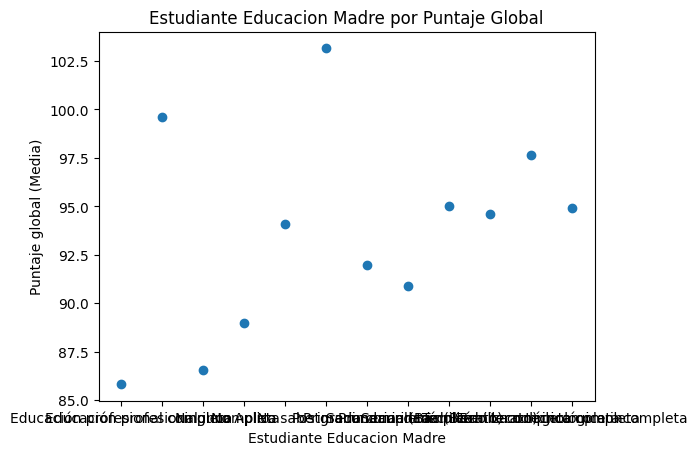

In [140]:
mean_scores = df.groupby('FAMI_EDUCACIONMADRE')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Educacion Madre')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Educacion Madre por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_EDUCACIONMADRE', ylabel='PUNT_GLOBAL'>

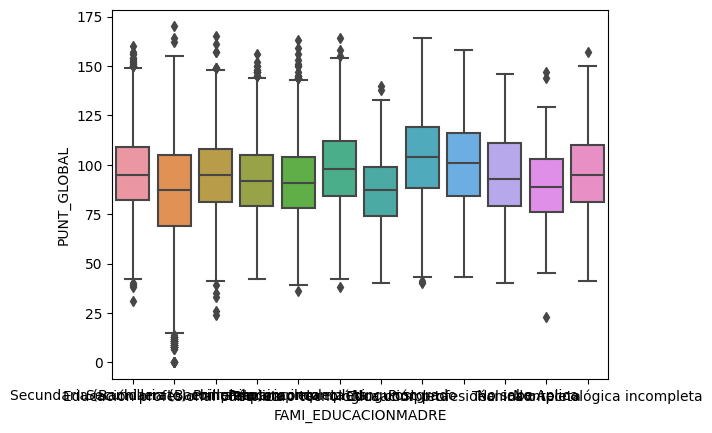

In [141]:
sns.boxplot(x="FAMI_EDUCACIONMADRE", y="PUNT_GLOBAL", data=df)

### Histogram

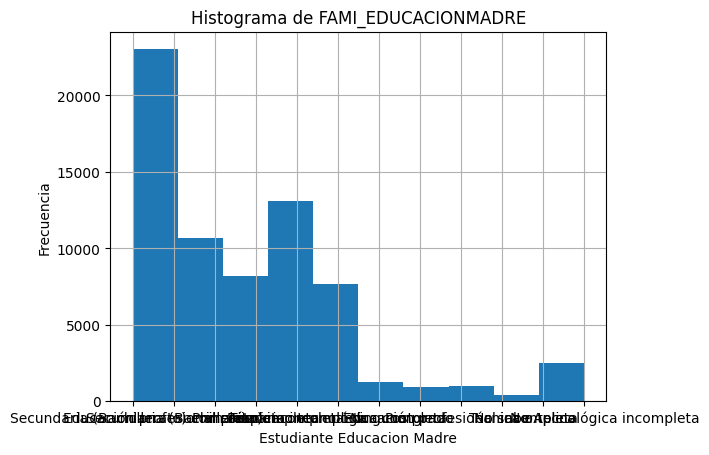

In [142]:
df["FAMI_EDUCACIONMADRE"].hist()

plt.title("Histograma de FAMI_EDUCACIONMADRE")
plt.xlabel("Estudiante Educacion Madre")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta FAMI_EDUCACIONMADRE porque es relevante para el analisis

In [26]:
grouped = df[['FAMI_EDUCACIONMADRE','PUNT_GLOBAL']].groupby("FAMI_EDUCACIONMADRE").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['FAMI_EDUCACIONMADRE'].fillna(middle_category, inplace=True)

In [27]:
df[['FAMI_EDUCACIONMADRE','PUNT_GLOBAL']].groupby("FAMI_EDUCACIONMADRE").agg(["count", "mean"])

PUNT_GLOBAL            
                                           count        mean
FAMI_EDUCACIONMADRE                                         
Educación profesional completa              6773   85.805109
Educación profesional incompleta            1013   99.605133
Ninguno                                     1286   86.567652
No Aplica                                    147   88.965986
No sabe                                      383   94.091384
Postgrado                                    934  103.153105
Primaria completa                           8176   91.989114
Primaria incompleta                        13097   90.892571
Secundaria (Bachillerato) completa         16254   95.018826
Secundaria (Bachillerato) incompleta       10700   94.626542
Técnica o tecnológica completa              7638   97.661168
Técnica o tecnológica incompleta            2324   94.921687

- - -
## Variable: FAMI_TRABAJOLABORPADRE
- - -

In [27]:
df[['FAMI_TRABAJOLABORPADRE','PUNT_GLOBAL']].groupby("FAMI_TRABAJOLABORPADRE").agg(["count", "mean"])

PUNT_GLOBAL            
                                                         count        mean
FAMI_TRABAJOLABORPADRE                                                    
Es agricultor, pesquero o jornalero                       8827   89.357993
Es dueño de un negocio grande, tiene un cargo d...         406   91.544335
Es dueño de un negocio pequeño (tiene pocos emp...        4902   94.570991
Es operario de máquinas o conduce vehículos (ta...        7607   96.120021
Es vendedor o trabaja en atención al público              3380   92.427811
No aplica                                                   80   85.662500
No sabe                                                   4680   95.404701
Pensionado                                               16427   90.509649
Tiene un trabajo de tipo auxiliar administrativ...        2035   94.392138
Trabaja como personal de limpieza, mantenimient...        5251   94.819273
Trabaja como profesional (por ejemplo médico, a...        2291  100.028808
Trabaja en el hogar, no trabaja o estudia                 2986   92.621567
Trabaja por cuenta propia (por ejemplo plomero,...        9853   94.982848

### Scatter Plot

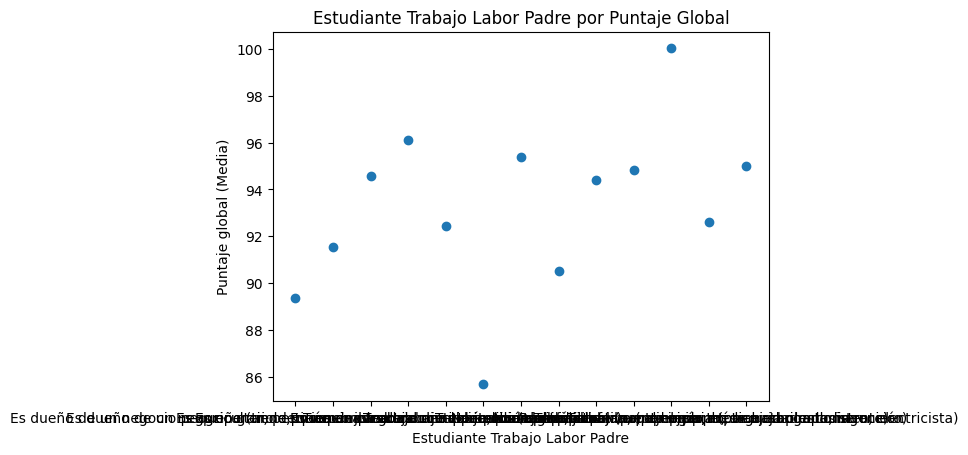

In [143]:
mean_scores = df.groupby('FAMI_TRABAJOLABORPADRE')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Trabajo Labor Padre')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Trabajo Labor Padre por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_TRABAJOLABORPADRE', ylabel='PUNT_GLOBAL'>

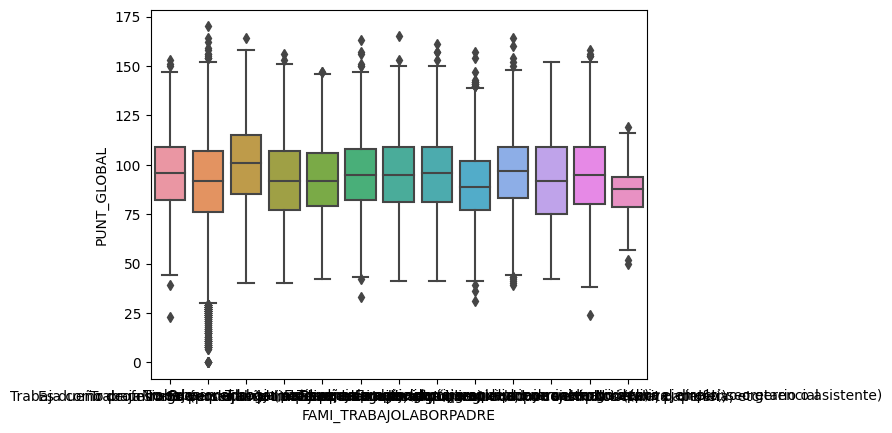

In [144]:
sns.boxplot(x="FAMI_TRABAJOLABORPADRE", y="PUNT_GLOBAL", data=df)

### Histogram

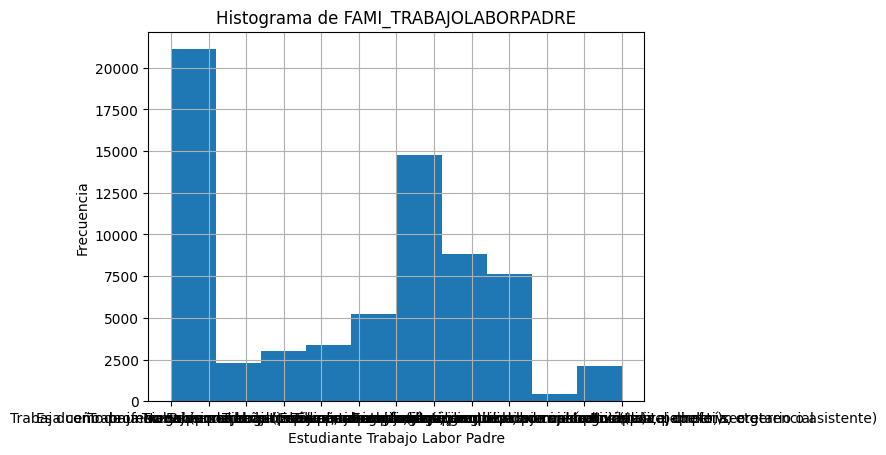

In [145]:
df["FAMI_TRABAJOLABORPADRE"].hist()

plt.title("Histograma de FAMI_TRABAJOLABORPADRE")
plt.xlabel("Estudiante Trabajo Labor Padre")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta FAMI_TRABAJOLABORPADRE porque es relevante para el analisis

In [28]:
grouped = df[['FAMI_TRABAJOLABORPADRE','PUNT_GLOBAL']].groupby("FAMI_TRABAJOLABORPADRE").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['FAMI_TRABAJOLABORPADRE'].fillna(middle_category, inplace=True)

In [29]:
df[['FAMI_TRABAJOLABORPADRE','PUNT_GLOBAL']].groupby("FAMI_TRABAJOLABORPADRE").agg(["count", "mean"])

PUNT_GLOBAL            
                                                         count        mean
FAMI_TRABAJOLABORPADRE                                                    
Es agricultor, pesquero o jornalero                       8827   89.357993
Es dueño de un negocio grande, tiene un cargo d...         406   91.544335
Es dueño de un negocio pequeño (tiene pocos emp...        4902   94.570991
Es operario de máquinas o conduce vehículos (ta...        7607   96.120021
Es vendedor o trabaja en atención al público              3380   92.427811
No aplica                                                   80   85.662500
No sabe                                                   4680   95.404701
Pensionado                                               16427   90.509649
Tiene un trabajo de tipo auxiliar administrativ...        2035   94.392138
Trabaja como personal de limpieza, mantenimient...        5251   94.819273
Trabaja como profesional (por ejemplo médico, a...        2291  100.028808
Trabaja en el hogar, no trabaja o estudia                 2986   92.621567
Trabaja por cuenta propia (por ejemplo plomero,...        9853   94.982848

- - -
## Variable: FAMI_TRABAJOLABORMADRE
- - -

In [29]:
df[['FAMI_TRABAJOLABORMADRE','PUNT_GLOBAL']].groupby("FAMI_TRABAJOLABORMADRE").agg(["count", "mean"])

PUNT_GLOBAL           
                                                         count       mean
FAMI_TRABAJOLABORMADRE                                                   
Es agricultor, pesquero o jornalero                       1784  89.151906
Es dueño de un negocio grande, tiene un cargo d...         238  88.798319
Es dueño de un negocio pequeño (tiene pocos emp...        4911  94.479536
Es operario de máquinas o conduce vehículos (ta...        1517  97.005933
Es vendedor o trabaja en atención al público              4292  93.767707
No aplica                                                   41  82.341463
No sabe                                                    697  89.355811
Pensionado                                                2381  98.265015
Tiene un trabajo de tipo auxiliar administrativ...        3462  97.110341
Trabaja como personal de limpieza, mantenimient...        6735  94.797476
Trabaja como profesional (por ejemplo médico, a...        2675  99.668037
Trabaja en el hogar, no trabaja o estudia                29324  93.553608
Trabaja por cuenta propia (por ejemplo plomero,...       10668  86.876734

### Scatter Plot

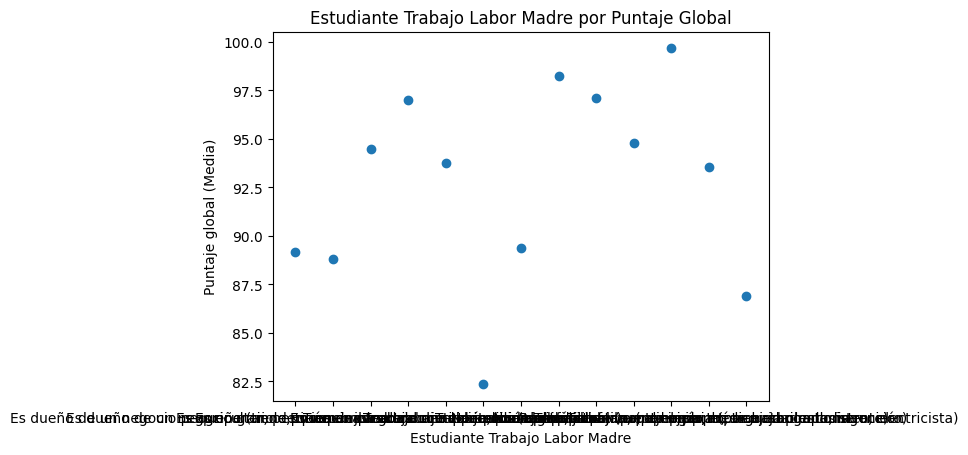

In [146]:
mean_scores = df.groupby('FAMI_TRABAJOLABORMADRE')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Trabajo Labor Madre')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Trabajo Labor Madre por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_TRABAJOLABORMADRE', ylabel='PUNT_GLOBAL'>

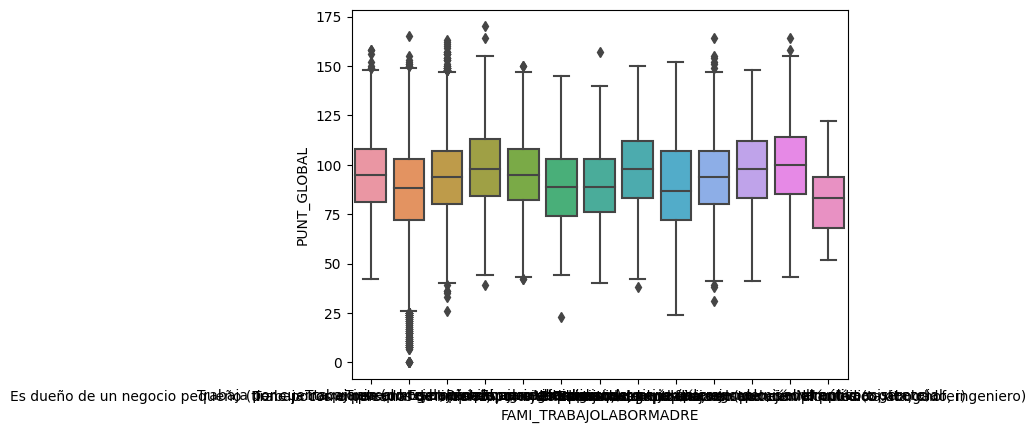

In [147]:
sns.boxplot(x="FAMI_TRABAJOLABORMADRE", y="PUNT_GLOBAL", data=df)

### Histogram

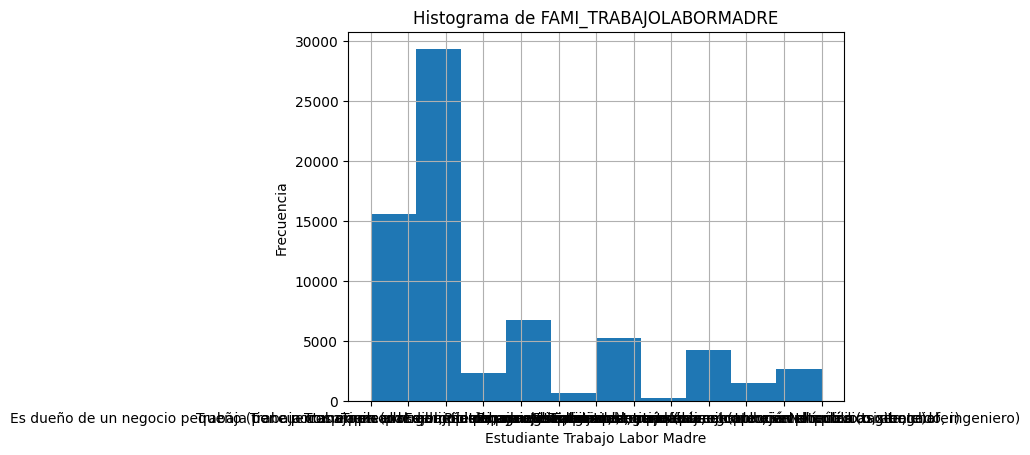

In [148]:
df["FAMI_TRABAJOLABORMADRE"].hist()

plt.title("Histograma de FAMI_TRABAJOLABORMADRE")
plt.xlabel("Estudiante Trabajo Labor Madre")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta FAMI_TRABAJOLABORMADRE porque es relevante para el analisis

In [30]:
grouped = df[['FAMI_TRABAJOLABORMADRE','PUNT_GLOBAL']].groupby("FAMI_TRABAJOLABORMADRE").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['FAMI_TRABAJOLABORMADRE'].fillna(middle_category, inplace=True)

In [31]:
df[['FAMI_TRABAJOLABORMADRE','PUNT_GLOBAL']].groupby("FAMI_TRABAJOLABORMADRE").agg(["count", "mean"])

PUNT_GLOBAL           
                                                         count       mean
FAMI_TRABAJOLABORMADRE                                                   
Es agricultor, pesquero o jornalero                       1784  89.151906
Es dueño de un negocio grande, tiene un cargo d...         238  88.798319
Es dueño de un negocio pequeño (tiene pocos emp...        4911  94.479536
Es operario de máquinas o conduce vehículos (ta...        1517  97.005933
Es vendedor o trabaja en atención al público              4292  93.767707
No aplica                                                   41  82.341463
No sabe                                                    697  89.355811
Pensionado                                                2381  98.265015
Tiene un trabajo de tipo auxiliar administrativ...        3462  97.110341
Trabaja como personal de limpieza, mantenimient...        6735  94.797476
Trabaja como profesional (por ejemplo médico, a...        2675  99.668037
Trabaja en el hogar, no trabaja o estudia                29324  93.553608
Trabaja por cuenta propia (por ejemplo plomero,...       10668  86.876734

- - -
## Variable: FAMI_ESTRATOVIVIENDA
- - -

In [78]:
df[['FAMI_ESTRATOVIVIENDA','PUNT_GLOBAL']].groupby("FAMI_ESTRATOVIVIENDA").agg(["count", "mean"])

PUNT_GLOBAL            
                           count        mean
FAMI_ESTRATOVIVIENDA                        
0                            228   86.083333
1                          16897   88.736699
2                          33824   92.456155
3                          15705   98.761350
4                           1674  100.889486
5                            320   98.140625
6                             77   94.181818

### Scatter Plot

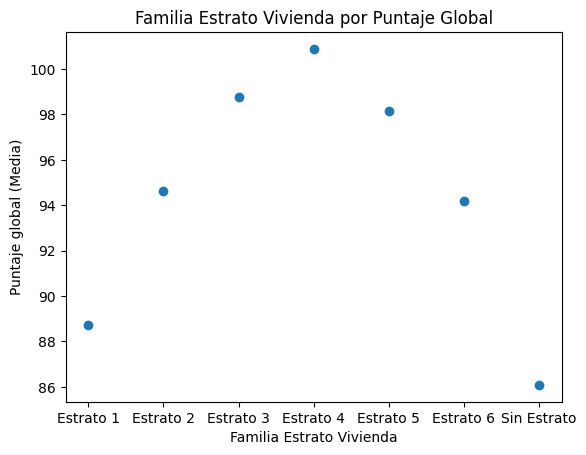

In [149]:
mean_scores = df.groupby('FAMI_ESTRATOVIVIENDA')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Familia Estrato Vivienda')
plt.ylabel('Puntaje global (Media)')
plt.title('Familia Estrato Vivienda por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_ESTRATOVIVIENDA', ylabel='PUNT_GLOBAL'>

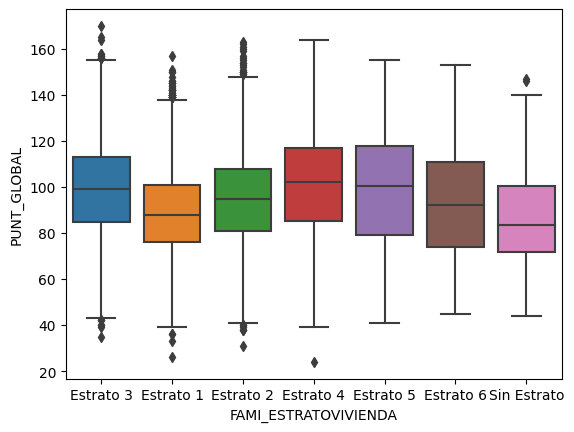

In [150]:
sns.boxplot(x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", data=df)

### Histogram

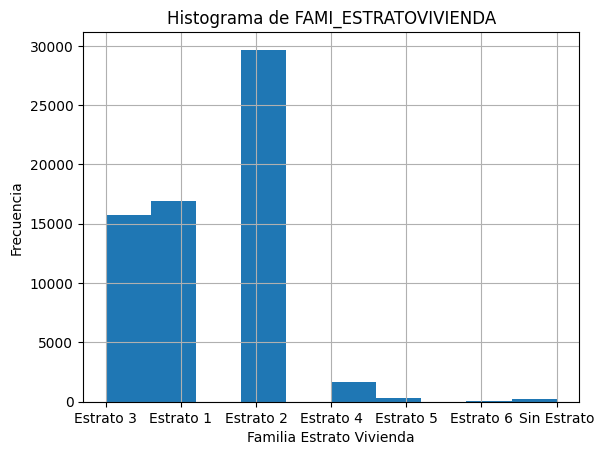

In [151]:
df["FAMI_ESTRATOVIVIENDA"].hist()

plt.title("Histograma de FAMI_ESTRATOVIVIENDA")
plt.xlabel("Familia Estrato Vivienda")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta FAMI_ESTRATOVIVIENDA porque es relevante para el analisis

In [32]:
replace_dict = {"Estrato 1": 1,"Estrato 2": 2,"Estrato 3": 3,"Estrato 4": 4,"Estrato 5": 5,"Estrato 6": 6,"Sin Estrato": 0}

df["FAMI_ESTRATOVIVIENDA"] = df["FAMI_ESTRATOVIVIENDA"].replace(replace_dict)

df["FAMI_ESTRATOVIVIENDA"] = pd.to_numeric(df["FAMI_ESTRATOVIVIENDA"], errors="coerce")

mean_semestre = df["FAMI_ESTRATOVIVIENDA"].median()

df["FAMI_ESTRATOVIVIENDA"] = df["FAMI_ESTRATOVIVIENDA"].fillna(mean_semestre)

df["FAMI_ESTRATOVIVIENDA"] = df["FAMI_ESTRATOVIVIENDA"].astype(int)

In [33]:
df[['FAMI_ESTRATOVIVIENDA','PUNT_GLOBAL']].groupby("FAMI_ESTRATOVIVIENDA").agg(["count", "mean"])

PUNT_GLOBAL            
                           count        mean
FAMI_ESTRATOVIVIENDA                        
0                            228   86.083333
1                          16897   88.736699
2                          33824   92.456155
3                          15705   98.761350
4                           1674  100.889486
5                            320   98.140625
6                             77   94.181818

- - -
## Variable: FAMI_TIENEINTERNET
- - -

In [31]:
df[['FAMI_TIENEINTERNET','PUNT_GLOBAL']].groupby("FAMI_TIENEINTERNET").agg(["count", "mean"])

PUNT_GLOBAL          
                         count      mean
FAMI_TIENEINTERNET                      
No                        7981  87.80629
Si                       60744  93.90325

### Scatter Plot

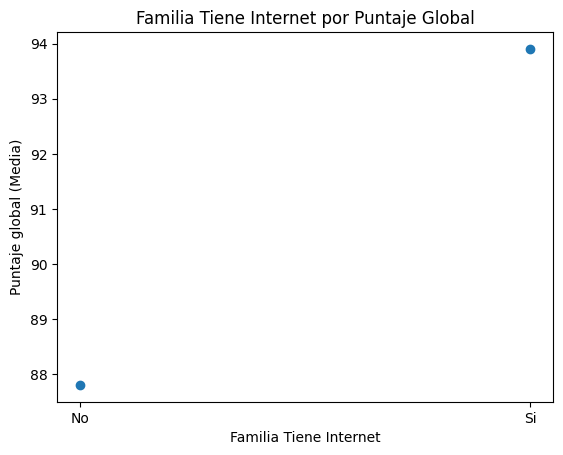

In [152]:
mean_scores = df.groupby('FAMI_TIENEINTERNET')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Familia Tiene Internet')
plt.ylabel('Puntaje global (Media)')
plt.title('Familia Tiene Internet por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_TIENEINTERNET', ylabel='PUNT_GLOBAL'>

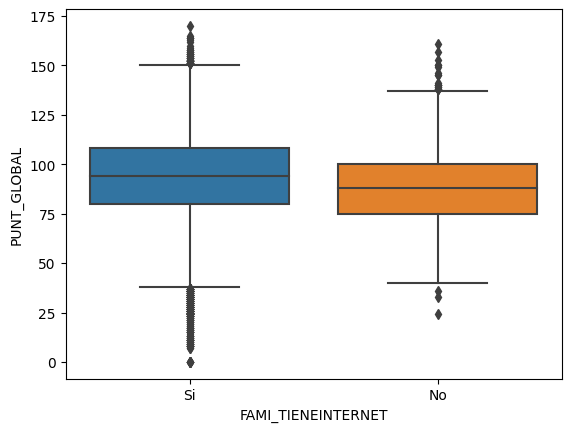

In [153]:
sns.boxplot(x="FAMI_TIENEINTERNET", y="PUNT_GLOBAL", data=df)

### Histogram

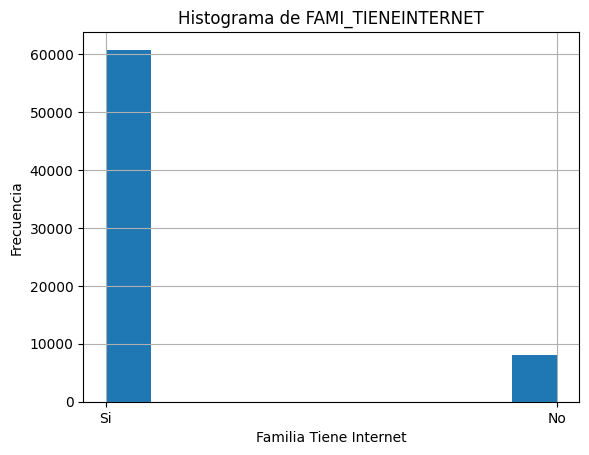

In [154]:
df["FAMI_TIENEINTERNET"].hist()

plt.title("Histograma de FAMI_TIENEINTERNET")
plt.xlabel("Familia Tiene Internet")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta FAMI_TIENEINTERNET porque es relevante para el analisis

In [34]:
grouped = df[['FAMI_TIENEINTERNET','PUNT_GLOBAL']].groupby("FAMI_TIENEINTERNET").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['FAMI_TIENEINTERNET'].fillna(middle_category, inplace=True)

In [35]:
df[['FAMI_TIENEINTERNET','PUNT_GLOBAL']].groupby("FAMI_TIENEINTERNET").agg(["count", "mean"])

PUNT_GLOBAL          
                         count      mean
FAMI_TIENEINTERNET                      
No                        7981  87.80629
Si                       60744  93.90325

- - -
## Variable: FAMI_TIENESERVICIOTV
- - -

In [52]:
df[['FAMI_TIENESERVICIOTV','PUNT_GLOBAL']].groupby("FAMI_TIENESERVICIOTV").agg(["count", "mean"])

PUNT_GLOBAL           
                           count       mean
FAMI_TIENESERVICIOTV                       
No                         17085  92.585192
Si                         47240  94.829382

### Scatter Plot

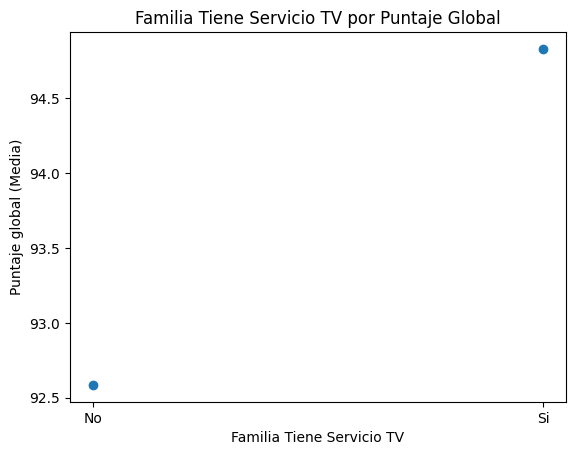

In [155]:
mean_scores = df.groupby('FAMI_TIENESERVICIOTV')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Familia Tiene Servicio TV')
plt.ylabel('Puntaje global (Media)')
plt.title('Familia Tiene Servicio TV por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_TIENESERVICIOTV', ylabel='PUNT_GLOBAL'>

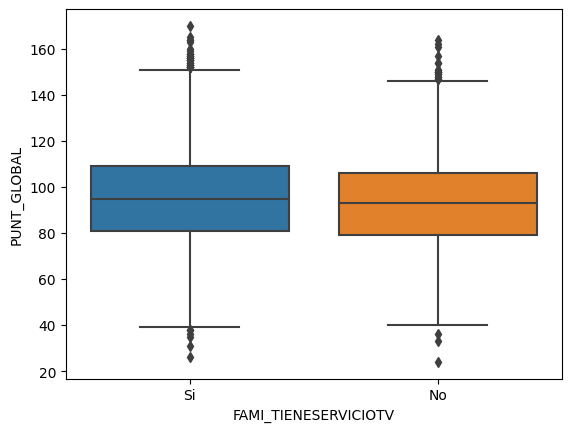

In [156]:
sns.boxplot(x="FAMI_TIENESERVICIOTV", y="PUNT_GLOBAL", data=df)

### Histogram

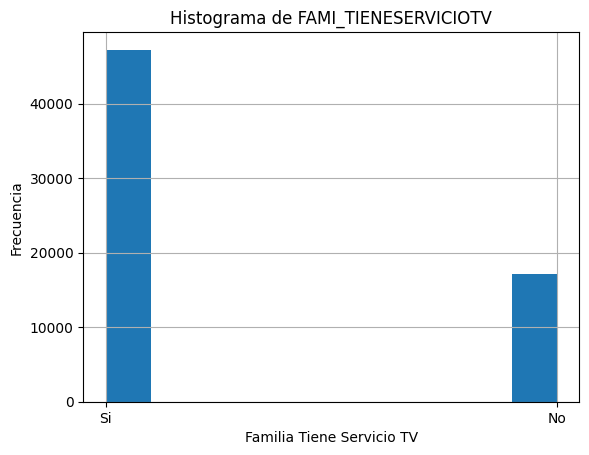

In [157]:
df["FAMI_TIENESERVICIOTV"].hist()

plt.title("Histograma de FAMI_TIENESERVICIOTV")
plt.xlabel("Familia Tiene Servicio TV")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta FAMI_TIENESERVICIOTV porque las medias estan muy similares, y no afecta realmente mucho que tenga TV o no.

- - -
## Variable: FAMI_TIENECOMPUTADOR
- - -

In [33]:
df[['FAMI_TIENECOMPUTADOR','PUNT_GLOBAL']].groupby("FAMI_TIENECOMPUTADOR").agg(["count", "mean"])

PUNT_GLOBAL           
                           count       mean
FAMI_TIENECOMPUTADOR                       
No                          8160  87.851348
Si                         60565  93.915199

### Scatter Plot

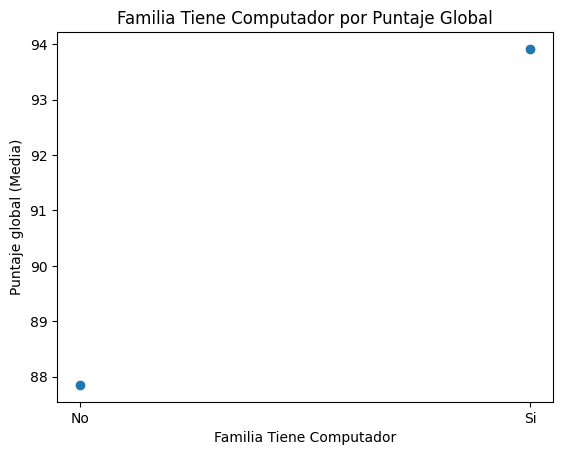

In [158]:
mean_scores = df.groupby('FAMI_TIENECOMPUTADOR')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Familia Tiene Computador')
plt.ylabel('Puntaje global (Media)')
plt.title('Familia Tiene Computador por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_TIENECOMPUTADOR', ylabel='PUNT_GLOBAL'>

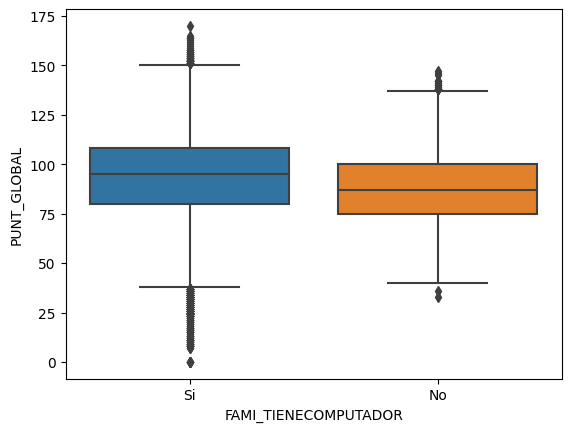

In [159]:
sns.boxplot(x="FAMI_TIENECOMPUTADOR", y="PUNT_GLOBAL", data=df)

### Histogram

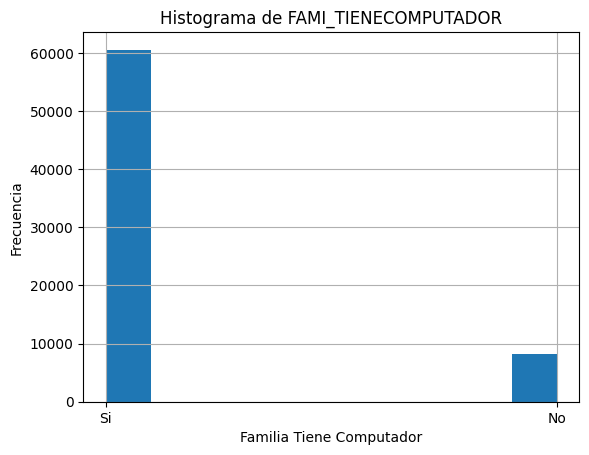

In [160]:
df["FAMI_TIENECOMPUTADOR"].hist()

plt.title("Histograma de FAMI_TIENECOMPUTADOR")
plt.xlabel("Familia Tiene Computador")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta FAMI_TIENECOMPUTADOR porque es relevante para el analisis

In [36]:
grouped = df[['FAMI_TIENECOMPUTADOR','PUNT_GLOBAL']].groupby("FAMI_TIENECOMPUTADOR").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['FAMI_TIENECOMPUTADOR'].fillna(middle_category, inplace=True)

In [37]:
df[['FAMI_TIENECOMPUTADOR','PUNT_GLOBAL']].groupby("FAMI_TIENECOMPUTADOR").agg(["count", "mean"])

PUNT_GLOBAL           
                           count       mean
FAMI_TIENECOMPUTADOR                       
No                          8160  87.851348
Si                         60565  93.915199

- - -
## Variable: FAMI_TIENELAVADORA
- - -

In [54]:
df[['FAMI_TIENELAVADORA','PUNT_GLOBAL']].groupby("FAMI_TIENELAVADORA").agg(["count", "mean"])

PUNT_GLOBAL           
                         count       mean
FAMI_TIENELAVADORA                       
No                       12623  90.245900
Si                       51383  95.242824

### Scatter Plot

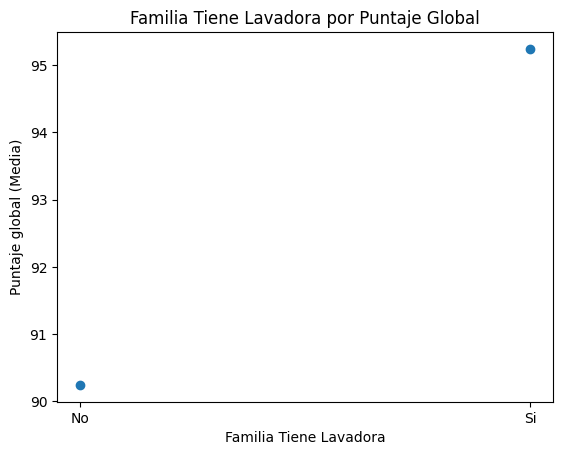

In [161]:
mean_scores = df.groupby('FAMI_TIENELAVADORA')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Familia Tiene Lavadora')
plt.ylabel('Puntaje global (Media)')
plt.title('Familia Tiene Lavadora por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_TIENELAVADORA', ylabel='PUNT_GLOBAL'>

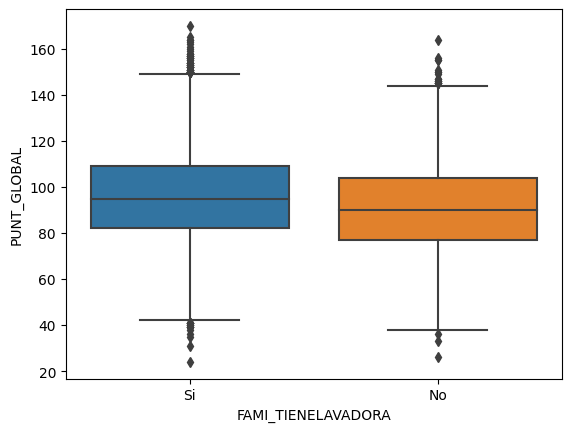

In [162]:
sns.boxplot(x="FAMI_TIENELAVADORA", y="PUNT_GLOBAL", data=df)

### Histogram

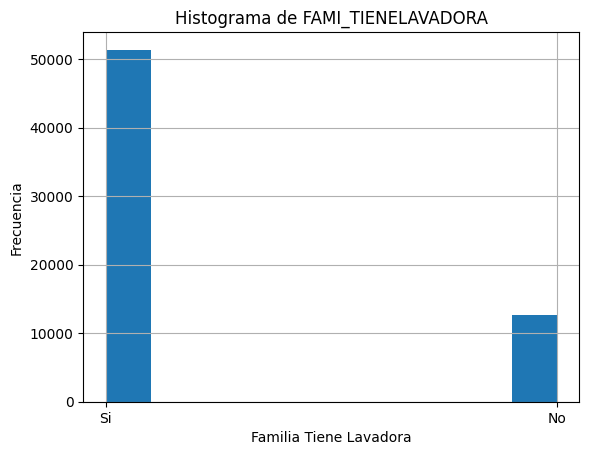

In [163]:
df["FAMI_TIENELAVADORA"].hist()

plt.title("Histograma de FAMI_TIENELAVADORA")
plt.xlabel("Familia Tiene Lavadora")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta FAMI_TIENELAVADORA porque las medias estan muy similares, y no afecta realmente mucho que tenga Lavadora o no.

- - -
## Variable: FAMI_TIENEHORNOMICROOGAS
- - -

In [55]:
df[['FAMI_TIENEHORNOMICROOGAS','PUNT_GLOBAL']].groupby("FAMI_TIENEHORNOMICROOGAS").agg(["count", "mean"])

PUNT_GLOBAL           
                               count       mean
FAMI_TIENEHORNOMICROOGAS                       
No                             38286  92.427807
Si                             25560  97.061581

### Scatter Plot

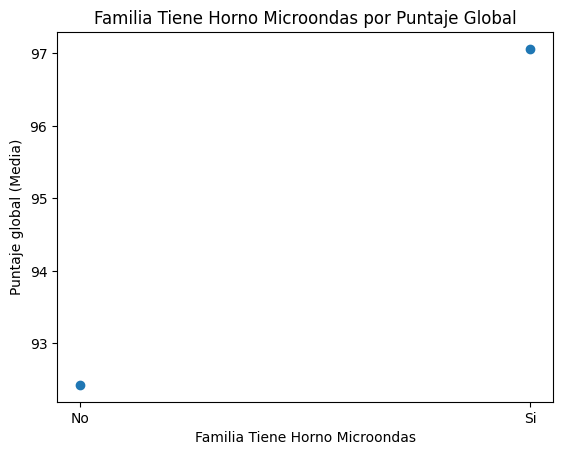

In [164]:
mean_scores = df.groupby('FAMI_TIENEHORNOMICROOGAS')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Familia Tiene Horno Microondas')
plt.ylabel('Puntaje global (Media)')
plt.title('Familia Tiene Horno Microondas por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_TIENEHORNOMICROOGAS', ylabel='PUNT_GLOBAL'>

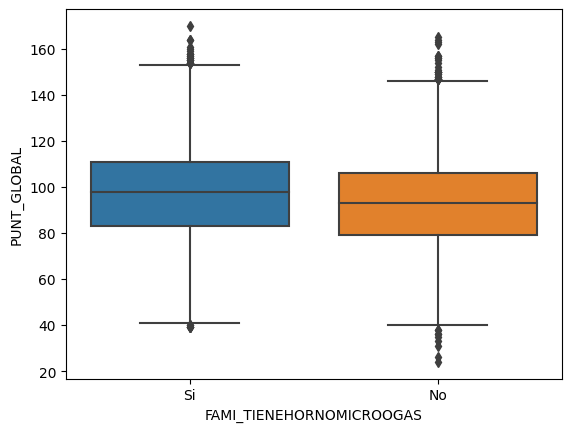

In [165]:
sns.boxplot(x="FAMI_TIENEHORNOMICROOGAS", y="PUNT_GLOBAL", data=df)

### Histogram

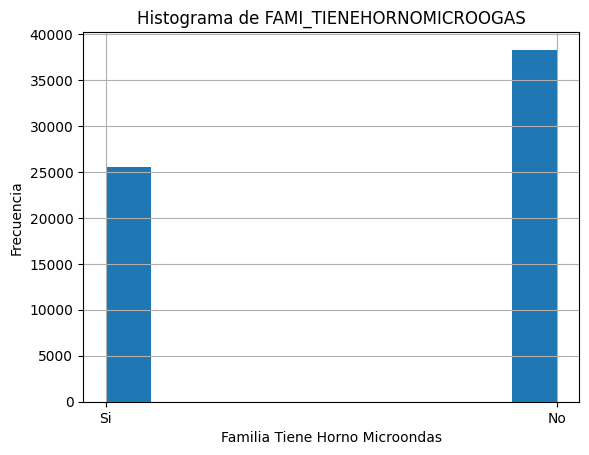

In [166]:
df["FAMI_TIENEHORNOMICROOGAS"].hist()

plt.title("Histograma de FAMI_TIENEHORNOMICROOGAS")
plt.xlabel("Familia Tiene Horno Microondas")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta FAMI_TIENEHORNOMICROOGAS porque las medias estan muy similares, y no afecta realmente mucho que tenga microhondas o no.

- - -
## Variable: FAMI_TIENEAUTOMOVIL
- - -

In [56]:
df[['FAMI_TIENEAUTOMOVIL','PUNT_GLOBAL']].groupby("FAMI_TIENEAUTOMOVIL").agg(["count", "mean"])

PUNT_GLOBAL           
                          count       mean
FAMI_TIENEAUTOMOVIL                       
No                        52603  93.690607
Si                        11214  97.000713

### Scatter Plot

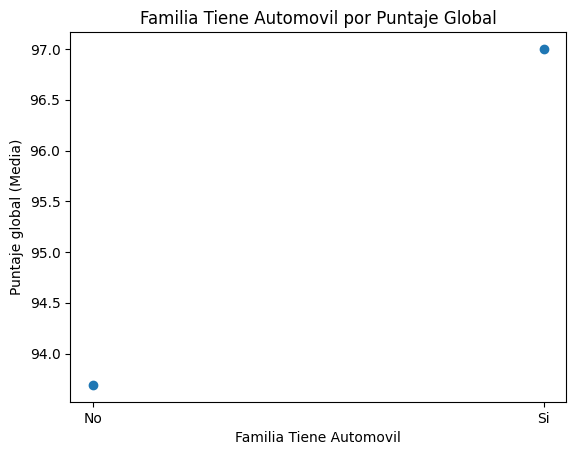

In [167]:
mean_scores = df.groupby('FAMI_TIENEAUTOMOVIL')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Familia Tiene Automovil')
plt.ylabel('Puntaje global (Media)')
plt.title('Familia Tiene Automovil por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_TIENEAUTOMOVIL', ylabel='PUNT_GLOBAL'>

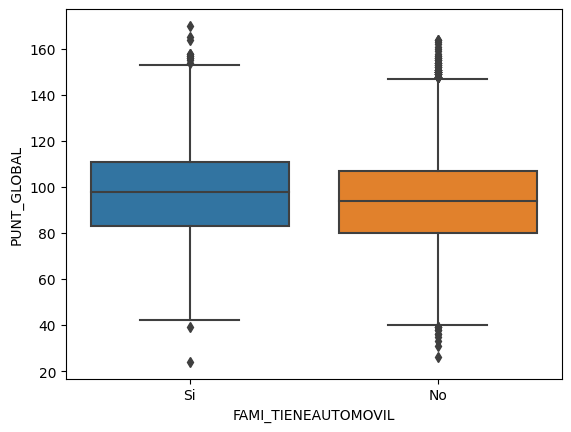

In [168]:
sns.boxplot(x="FAMI_TIENEAUTOMOVIL", y="PUNT_GLOBAL", data=df)

### Histogram

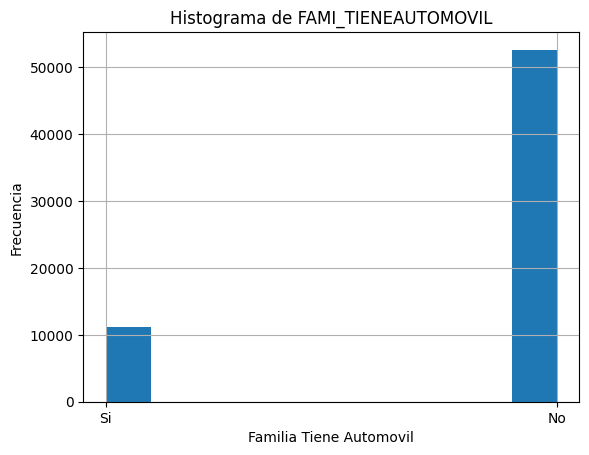

In [169]:
df["FAMI_TIENEAUTOMOVIL"].hist()

plt.title("Histograma de FAMI_TIENEAUTOMOVIL")
plt.xlabel("Familia Tiene Automovil")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta FAMI_TIENEAUTOMOVIL porque las medias estan muy similares, y no afecta realmente mucho que tenga microhondas o no.

- - -
## Variable: FAMI_TIENEMOTOCICLETA
- - -

In [57]:
df[['FAMI_TIENEMOTOCICLETA','PUNT_GLOBAL']].groupby("FAMI_TIENEMOTOCICLETA").agg(["count", "mean"])

PUNT_GLOBAL           
                            count       mean
FAMI_TIENEMOTOCICLETA                       
No                          39694  95.139442
Si                          24146  92.807256

### Scatter Plot

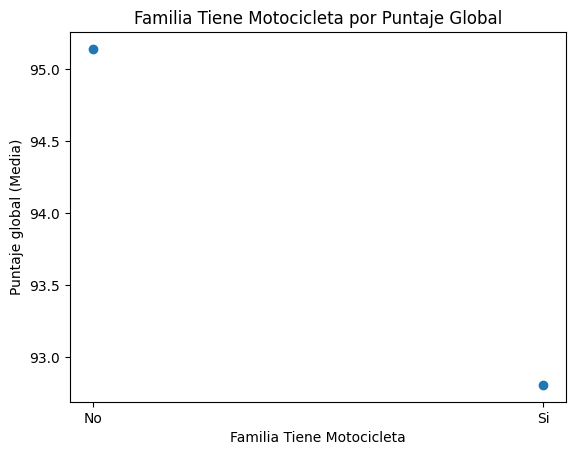

In [170]:
mean_scores = df.groupby('FAMI_TIENEMOTOCICLETA')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Familia Tiene Motocicleta')
plt.ylabel('Puntaje global (Media)')
plt.title('Familia Tiene Motocicleta por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_TIENEMOTOCICLETA', ylabel='PUNT_GLOBAL'>

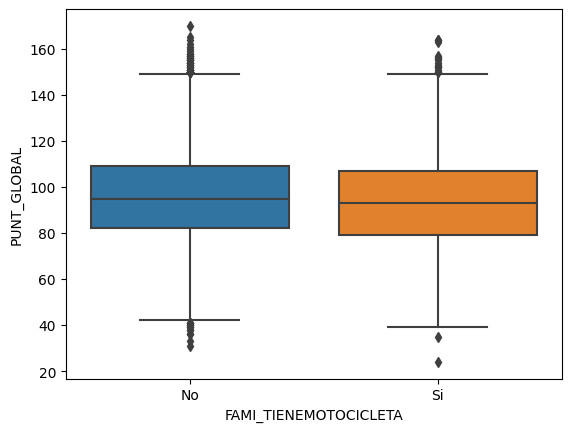

In [171]:
sns.boxplot(x="FAMI_TIENEMOTOCICLETA", y="PUNT_GLOBAL", data=df)

### Histogram

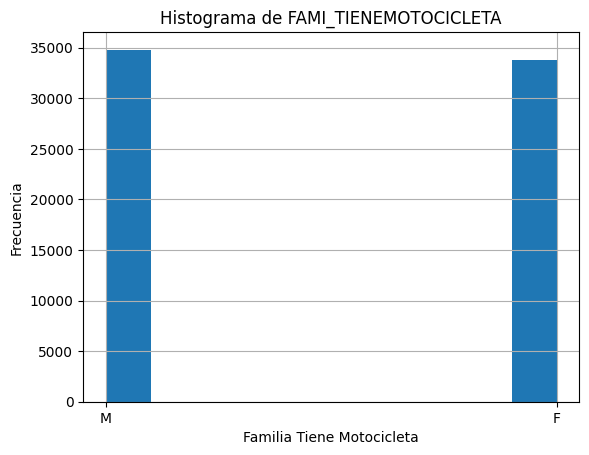

In [172]:
df["ESTU_GENERO"].hist()

plt.title("Histograma de FAMI_TIENEMOTOCICLETA")
plt.xlabel("Familia Tiene Motocicleta")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta FAMI_TIENEMOTOCICLETA porque las medias estan muy similares, y no afecta realmente mucho que tenga microhondas o no.

- - -
## Variable: FAMI_TIENECONSOLAVIDEOJUEGOS
- - -

In [58]:
df[['FAMI_TIENECONSOLAVIDEOJUEGOS','PUNT_GLOBAL']].groupby("FAMI_TIENECONSOLAVIDEOJUEGOS").agg(["count", "mean"])

PUNT_GLOBAL           
                                   count       mean
FAMI_TIENECONSOLAVIDEOJUEGOS                       
No                                 53110  93.492544
Si                                 10673  98.139324

### Scatter Plot

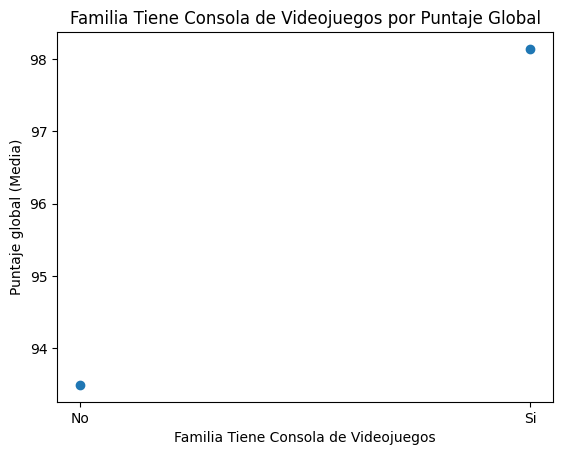

In [173]:
mean_scores = df.groupby('FAMI_TIENECONSOLAVIDEOJUEGOS')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Familia Tiene Consola de Videojuegos')
plt.ylabel('Puntaje global (Media)')
plt.title('Familia Tiene Consola de Videojuegos por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_TIENECONSOLAVIDEOJUEGOS', ylabel='PUNT_GLOBAL'>

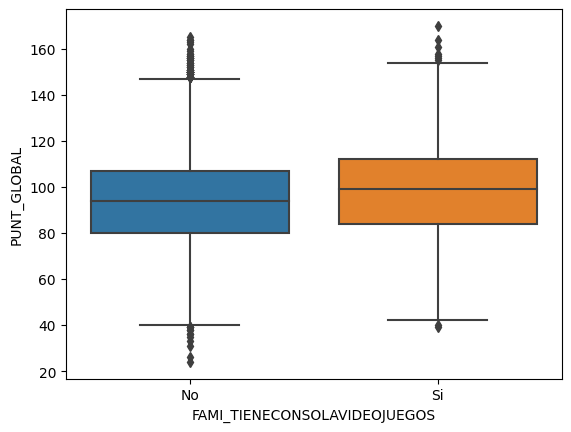

In [174]:
sns.boxplot(x="FAMI_TIENECONSOLAVIDEOJUEGOS", y="PUNT_GLOBAL", data=df)

### Histogram

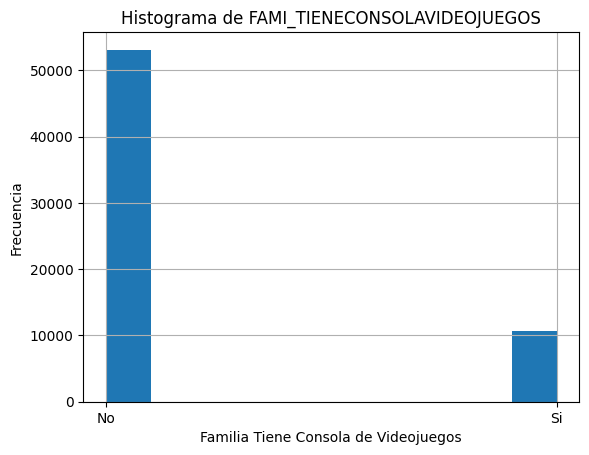

In [175]:
df["FAMI_TIENECONSOLAVIDEOJUEGOS"].hist()

plt.title("Histograma de FAMI_TIENECONSOLAVIDEOJUEGOS")
plt.xlabel("Familia Tiene Consola de Videojuegos")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta FAMI_TIENECONSOLAVIDEOJUEGOS porque las medias estan muy similares, y no afecta realmente mucho que tenga microhondas o no.

- - -
## Variable: FAMI_CUANTOSCOMPARTEBAÑO
- - -

In [59]:
df[['FAMI_CUANTOSCOMPARTEBAÑO','PUNT_GLOBAL']].groupby("FAMI_CUANTOSCOMPARTEBAÑO").agg(["count", "mean"])

PUNT_GLOBAL           
                               count       mean
FAMI_CUANTOSCOMPARTEBAÑO                       
1                               6278  97.270150
2                              12830  95.499454
3 o 4                          30518  94.064519
5 o 6                          10130  91.832379
MAS DE 6                        2396  90.335559
NINGUNA                         1711  96.023378

### Scatter Plot

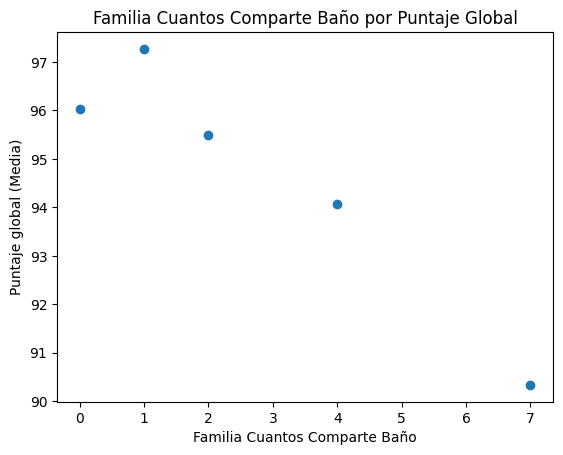

In [177]:
replace_dict = {"NINGUNA": 0, "1": 1, "2": 2, "3 o 4": 4, "5 0 6": 6,"MAS DE 6": 7}

df["FAMI_CUANTOSCOMPARTEBAÑO"] = df["FAMI_CUANTOSCOMPARTEBAÑO"].replace(replace_dict)

df["FAMI_CUANTOSCOMPARTEBAÑO"] = pd.to_numeric(df["FAMI_CUANTOSCOMPARTEBAÑO"], errors="coerce")

mean_scores = df.groupby('FAMI_CUANTOSCOMPARTEBAÑO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Familia Cuantos Comparte Baño')
plt.ylabel('Puntaje global (Media)')
plt.title('Familia Cuantos Comparte Baño por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='FAMI_CUANTOSCOMPARTEBAÑO', ylabel='PUNT_GLOBAL'>

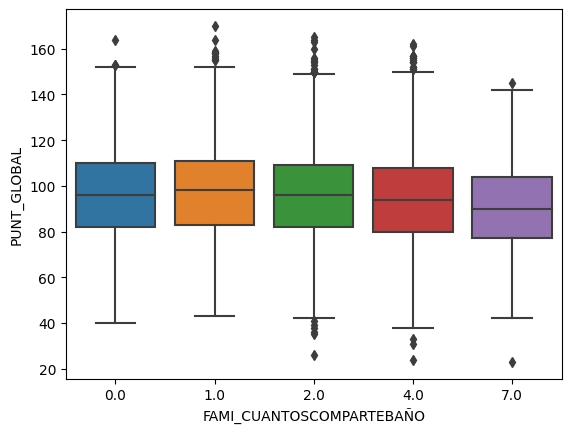

In [178]:
sns.boxplot(x="FAMI_CUANTOSCOMPARTEBAÑO", y="PUNT_GLOBAL", data=df)

### Histogram

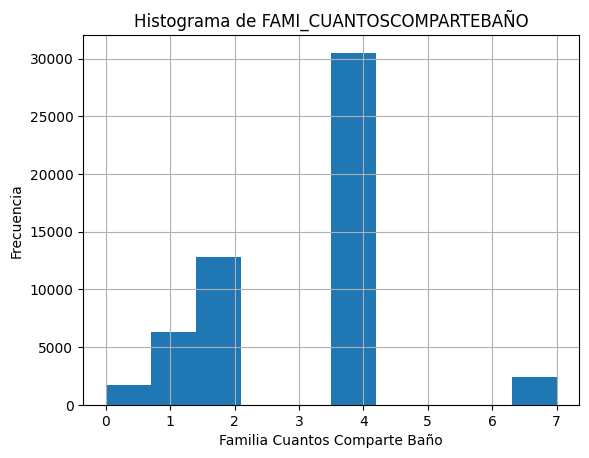

In [179]:
df["FAMI_CUANTOSCOMPARTEBAÑO"].hist()

plt.title("Histograma de FAMI_CUANTOSCOMPARTEBAÑO")
plt.xlabel("Familia Cuantos Comparte Baño")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta FAMI_CUANTOSCOMPARTEBAÑO porque no es relevante para el analisis

- - -
## Variable: ESTU_VALORMATRICULAUNIVERSIDAD
- - -

In [76]:
df[['ESTU_VALORMATRICULAUNIVERSIDAD','PUNT_GLOBAL']].groupby("ESTU_VALORMATRICULAUNIVERSIDAD").agg(["count", "mean"])

PUNT_GLOBAL            
                                     count        mean
ESTU_VALORMATRICULAUNIVERSIDAD                        
0                                    45159   91.593370
500000                                3192   95.236529
1000000                               5547   92.933658
3000000                              12861   97.443745
5000000                               1636  101.738386
7000000                                199   90.175879
8000000                                131   87.519084

### Scatter Plot

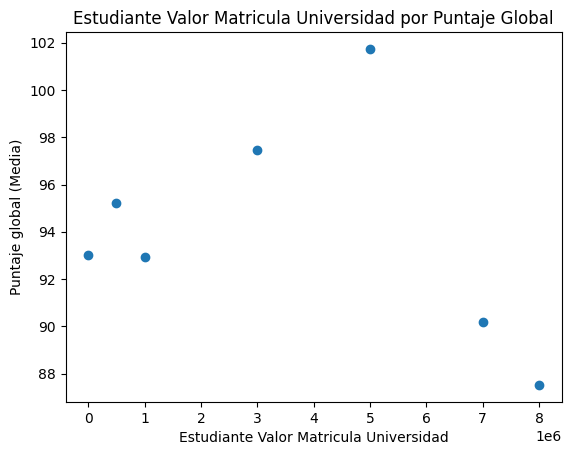

In [180]:
replace_dict = {"No pago semestre": 0, "Menos de 500 mil pesos":500000, "Entre 500 mil y un millon de pesos": 1000000, "Entre un millon y 3 millones de pesose": 3000000, "Entre 3 y 5 millones": 5000000,"Entre 5 y 7 millones": 7000000, "Mas de 7 millones": 8000000}

df["ESTU_VALORMATRICULAUNIVERSIDAD"] = df["ESTU_VALORMATRICULAUNIVERSIDAD"].replace(replace_dict)

df["ESTU_VALORMATRICULAUNIVERSIDAD"] = pd.to_numeric(df["ESTU_VALORMATRICULAUNIVERSIDAD"], errors="coerce")

mean_scores = df.groupby('ESTU_VALORMATRICULAUNIVERSIDAD')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Valor Matricula Universidad')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Valor Matricula Universidad por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD', ylabel='PUNT_GLOBAL'>

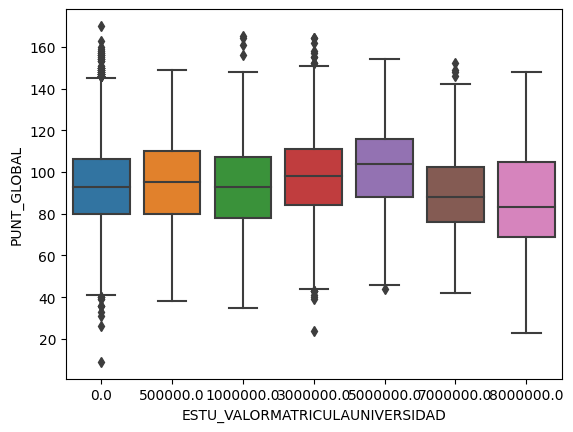

In [181]:
sns.boxplot(x="ESTU_VALORMATRICULAUNIVERSIDAD", y="PUNT_GLOBAL", data=df)

### Histogram

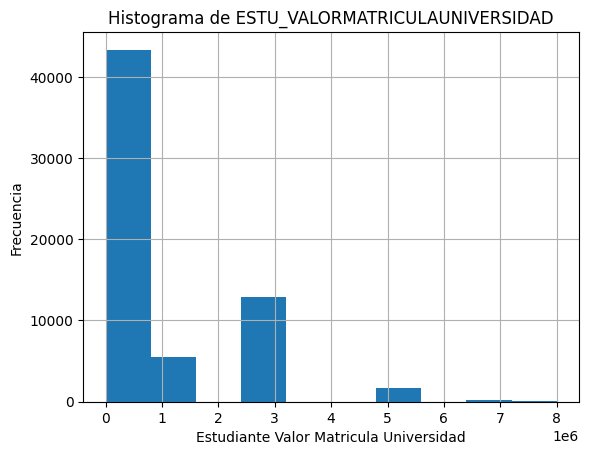

In [182]:
df["ESTU_VALORMATRICULAUNIVERSIDAD"].hist()

plt.title("Histograma de ESTU_VALORMATRICULAUNIVERSIDAD")
plt.xlabel("Estudiante Valor Matricula Universidad")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_VALORMATRICULAUNIVERSIDAD porque es relevante para el analisis

In [38]:
replace_dict = {"No pago semestre": 0, "Menos de 500 mil pesos":500000, "Entre 500 mil y un millon de pesos": 1000000, "Entre un millon y 3 millones de pesose": 3000000, "Entre 3 y 5 millones": 5000000,"Entre 5 y 7 millones": 7000000, "Mas de 7 millones": 8000000}

df["ESTU_VALORMATRICULAUNIVERSIDAD"] = df["ESTU_VALORMATRICULAUNIVERSIDAD"].replace(replace_dict)

df["ESTU_VALORMATRICULAUNIVERSIDAD"] = pd.to_numeric(df["ESTU_VALORMATRICULAUNIVERSIDAD"], errors="coerce")

mean_valormatriculauniversidad = df["ESTU_VALORMATRICULAUNIVERSIDAD"].median()

df["ESTU_VALORMATRICULAUNIVERSIDAD"] = df["ESTU_VALORMATRICULAUNIVERSIDAD"].fillna(mean_valormatriculauniversidad)

df["ESTU_VALORMATRICULAUNIVERSIDAD"] = df["ESTU_VALORMATRICULAUNIVERSIDAD"].astype(int)

In [39]:
df[['ESTU_VALORMATRICULAUNIVERSIDAD','PUNT_GLOBAL']].groupby("ESTU_VALORMATRICULAUNIVERSIDAD").agg(["count", "mean"])

PUNT_GLOBAL            
                                     count        mean
ESTU_VALORMATRICULAUNIVERSIDAD                        
0                                    45159   91.593370
500000                                3192   95.236529
1000000                               5547   92.933658
3000000                              12861   97.443745
5000000                               1636  101.738386
7000000                                199   90.175879
8000000                                131   87.519084

- - -
## Variable: ESTU_HORASSEMANATRABAJA
- - -

In [85]:
df[['ESTU_HORASSEMANATRABAJA','PUNT_GLOBAL']].groupby("ESTU_HORASSEMANATRABAJA").agg(["count", "mean"])

PUNT_GLOBAL           
                              count       mean
ESTU_HORASSEMANATRABAJA                       
0                             11037  92.870526
10                            11344  89.455395
20                             8032  92.615787
30                            11693  88.348328
40                            26619  97.227544

### Scatter Plot

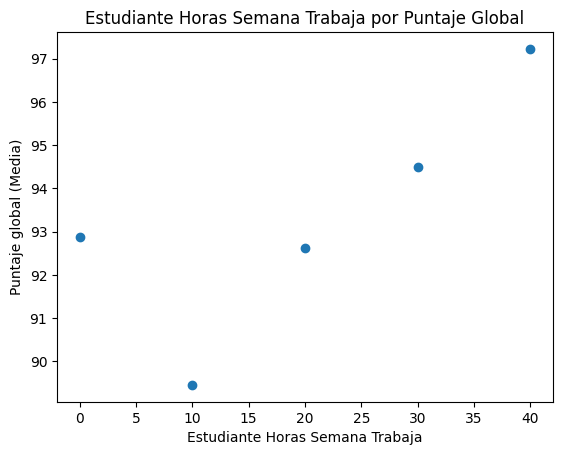

In [183]:
replace_dict = {"0": 0, "Menos de 10 horas":10, "Entre 11 y 20 horas": 20, "Entre 21 y 30 horas": 30, "Más de 30 horas": 40}

df["ESTU_HORASSEMANATRABAJA"] = df["ESTU_HORASSEMANATRABAJA"].replace(replace_dict)

df["ESTU_HORASSEMANATRABAJA"] = pd.to_numeric(df["ESTU_HORASSEMANATRABAJA"], errors="coerce")

mean_scores = df.groupby('ESTU_HORASSEMANATRABAJA')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Horas Semana Trabaja')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Horas Semana Trabaja por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_HORASSEMANATRABAJA', ylabel='PUNT_GLOBAL'>

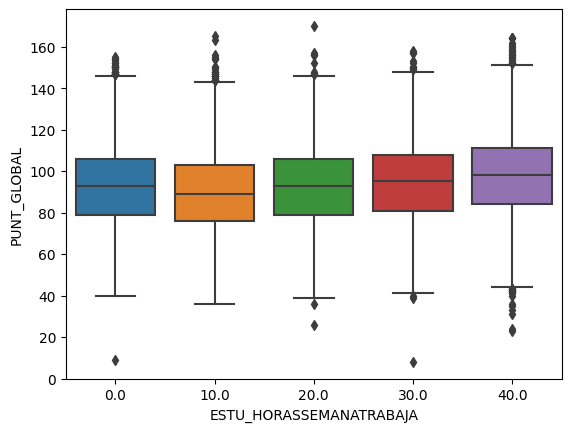

In [184]:
sns.boxplot(x="ESTU_HORASSEMANATRABAJA", y="PUNT_GLOBAL", data=df)

### Histogram

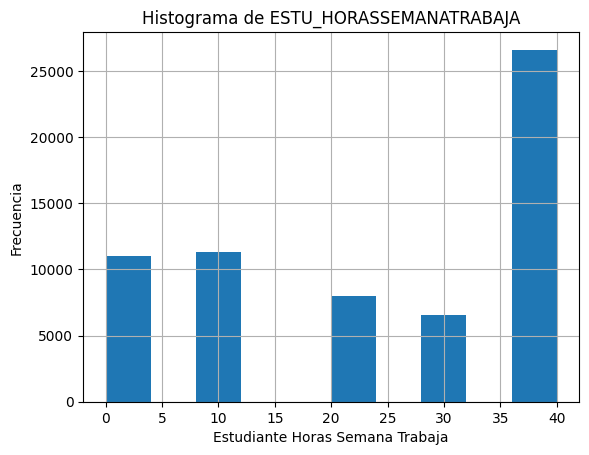

In [185]:
df["ESTU_HORASSEMANATRABAJA"].hist()

plt.title("Histograma de ESTU_HORASSEMANATRABAJA")
plt.xlabel("Estudiante Horas Semana Trabaja")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_HORASSEMANATRABAJA porque es relevante para el analisis

In [40]:
replace_dict = {"0": 0, "Menos de 10 horas":10, "Entre 11 y 20 horas": 20, "Entre 21 y 30 horas": 30, "Más de 30 horas": 40}

df["ESTU_HORASSEMANATRABAJA"] = df["ESTU_HORASSEMANATRABAJA"].replace(replace_dict)

df["ESTU_HORASSEMANATRABAJA"] = pd.to_numeric(df["ESTU_HORASSEMANATRABAJA"], errors="coerce")

mean_horassemanatrabaja = df["ESTU_HORASSEMANATRABAJA"].median()

df["ESTU_HORASSEMANATRABAJA"] = df["ESTU_HORASSEMANATRABAJA"].fillna(mean_horassemanatrabaja)

df["ESTU_HORASSEMANATRABAJA"] = df["ESTU_HORASSEMANATRABAJA"].astype(int)

In [41]:
df[['ESTU_HORASSEMANATRABAJA','PUNT_GLOBAL']].groupby("ESTU_HORASSEMANATRABAJA").agg(["count", "mean"])

PUNT_GLOBAL           
                              count       mean
ESTU_HORASSEMANATRABAJA                       
0                             11037  92.870526
10                            11344  89.455395
20                             8032  92.615787
30                            11693  88.348328
40                            26619  97.227544

- - -
## Variable: INST_COD_INSTITUCION
- - -

In [6]:
df[['INST_COD_INSTITUCION','PUNT_GLOBAL']].groupby("INST_COD_INSTITUCION").agg(["count", "mean"])

PUNT_GLOBAL            
                           count        mean
INST_COD_INSTITUCION                        
1106                         416   93.112981
1110                           6  119.833333
1111                         208  106.716346
1112                         100   96.910000
1113                          33   89.303030
1114                          19  106.894737
1115                          11   83.818182
1117                          48   92.875000
1119                           9  101.888889
1121                          84  102.785714
1122                          24   82.041667
1201                          72  106.777778
1202                          46   92.652174
1203                         219  104.068493
1204                         189   95.835979
1205                         109   86.954128
1206                          29  100.620690
1207                         201   94.557214
1208                          44   97.909091
1209                         100   93.760000
1210                           8   91.875000
1212                           1   79.000000
1213                          62   87.306452
1214                          10  106.800000
1215                          11  103.818182
1217                          16   99.000000
1218                          24   83.750000
1301                         302  119.847682
1705                           6   98.833333
1707                           2   99.000000
1717                          31   92.741935
1718                          30  101.900000
1720                          81   92.962963
1722                           1   77.000000
1726                           3  117.333333
1728                          33  102.666667
1735                         103  103.310680
1801                          30  106.966667
1805                          66  100.060606
1823                         173   87.710983
1825                          91  102.010989
1826                          55   91.836364
1827                           2   81.000000
1829                           3  115.333333
1830                          89   97.550562
1831                          15   87.800000
1832                         102   95.450980
1834                         137   94.467153
1835                          24  101.041667
2102                         314   94.277070
2106                        2173   80.413254
2110                          87  100.103448
2114                          24   86.750000
2207                          32   91.031250
2209                         422  101.109005
2302                          10  103.000000
2702                          30  102.233333
2708                          29  112.172414
2713                          71  101.042254
2724                           7   89.571429
2725                         466  102.854077
2728                         233  100.364807
2731                         214   95.742991
2732                          21  100.523810
2737                          29   88.034483
2739                          33   95.272727
2743                          27  103.074074
2744                          27   98.148148
2745                         786  102.501272
2747                          63   95.603175
2749                          82  104.475610
2805                          10   88.900000
2815                          14  108.857143
2818                           2   91.500000
2823                           4  109.500000
2825                          74   96.878378
2829                         275  101.261818
2832                          60   93.466667
2833                         162   89.592593
2834                          25  107.320000
2836                           4  113.000000
2841                          47   94.914894
2842                           7  114.000000
2847                           2  106.000000
2848                          29  109.241379
2850                           2   87.000000
2901            

### Scatter Plot

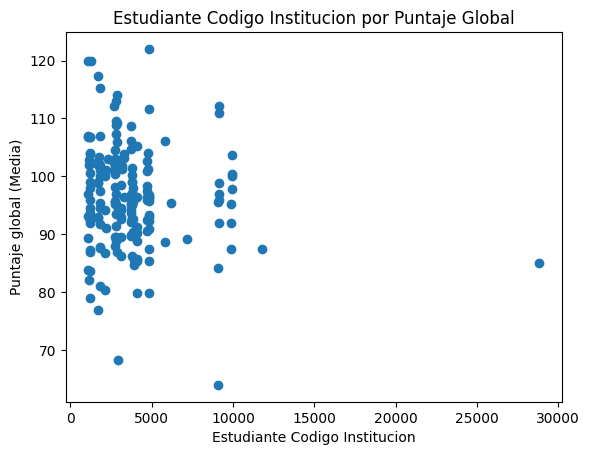

In [186]:
mean_scores = df.groupby('INST_COD_INSTITUCION')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Codigo Institucion')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Codigo Institucion por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='INST_COD_INSTITUCION', ylabel='PUNT_GLOBAL'>

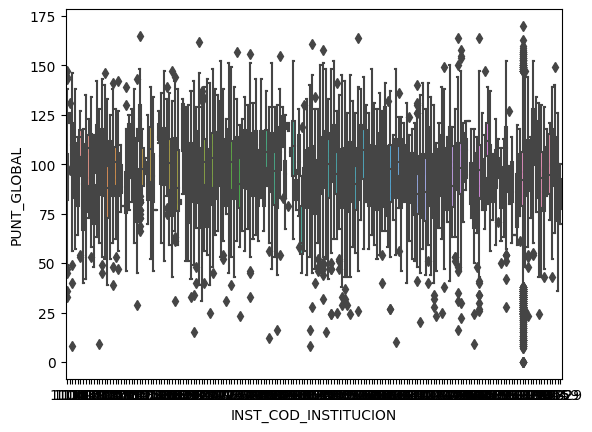

In [187]:
sns.boxplot(x="INST_COD_INSTITUCION", y="PUNT_GLOBAL", data=df)

### Histogram

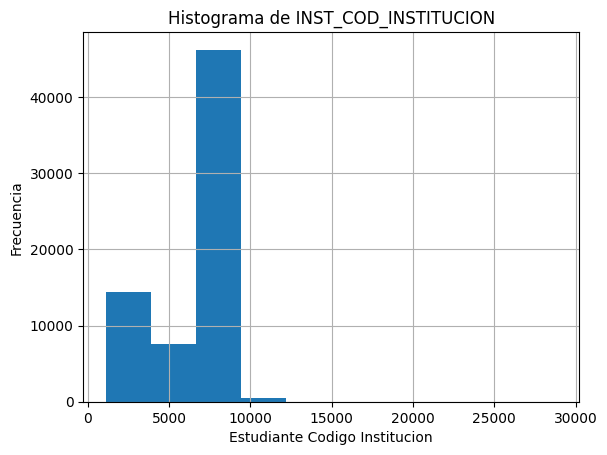

In [188]:
df["INST_COD_INSTITUCION"].hist()

plt.title("Histograma de INST_COD_INSTITUCION")
plt.xlabel("Estudiante Codigo Institucion")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta INST_COD_INSTITUCION porque no es relevante para el analisis debido a que ya hay una variable cn el nombre de la institucion

- - -
## Variable: INST_NOMBRE_INSTITUCION
- - -

In [7]:
df[['INST_NOMBRE_INSTITUCION','PUNT_GLOBAL']].groupby("INST_NOMBRE_INSTITUCION").agg(["count", "mean"])

PUNT_GLOBAL            
                                                         count        mean
INST_NOMBRE_INSTITUCION                                                   
CENTRO DE EDUCACION MILITAR-BOGOTÁ D.C.                     11   68.363636
COLEGIO INTEGRADO NACIONAL ORIENTE DE CALDAS- I...          15   96.466667
COLEGIO MAYOR DE ANTIOQUIA-MEDELLIN                         87  100.103448
COLEGIO MAYOR DE BOLIVAR-CARTAGENA                          88   94.454545
COLEGIO MAYOR DEL CAUCA-POPAYAN                             99   92.949495
CORPORACION ACADEMIA SUPERIOR DE ARTES-MEDELLIN             13  101.230769
CORPORACION ACADEMIA TECNOLOGICA DE COLOMBIA -A...          11   92.727273
CORPORACION CENTRO DE ESTUDIOS ARTISTICOS Y TEC...           1  122.000000
CORPORACION CENTRO DE NUESTRA SEÑORA DE LAS MER...          18   92.222222
CORPORACION DE EDUCACION TECNOLOGICA COLSUBSIDI...          37   95.216216
CORPORACION DE ESTUDIOS SUPERIORES SALAMANDRA-CALI          53   79.867925
CORPORACION DE ESTUDIOS TECNOLOGICOS DEL NORTE ...          49   92.816327
CORPORACION EDUCATIVA -ITAE-BUCARAMANGA                     10  101.500000
CORPORACION EDUCATIVA DEL LITORAL-BARRANQUILLA              15   93.400000
CORPORACION ESCUELA DE ARTES Y LETRAS-BOGOTÁ D.C.           29  111.551724
CORPORACION ESCUELA SUPERIOR DE ADMINISTRACION ...          29   95.551724
CORPORACION ESCUELA TECNOLOGICA DEL ORIENTE-BUC...          24   88.750000
CORPORACION INSTITUTO DE ADMINISTRACION Y FINAN...          76   96.447368
CORPORACION INSTITUTO SUPERIOR DE EDUCACION SOC...          52   96.750000
CORPORACION INTERAMERICANA DE EDUCACION SUPERIO...           9   87.444444
CORPORACION INTERNACIONAL PARA EL DESARROLLO ED...          29   92.620690
CORPORACION POLITECNICO COLOMBO ANDINO-BOGOTÁ D.C.           7  104.000000
CORPORACION POLITECNICO DE LA COSTA ATLANTICA-B...         121   96.661157
CORPORACION TECNOLOGICA CATOLICA DE OCCIDENTE -...          11   90.363636
CORPORACION TECNOLOGICA DE BOGOTA - C.T.B.-BOGO...          35   99.028571
CORPORACION TECNOLOGICA INDOAMERICA-BARRANQUILLA            11   96.909091
CORPORACION TECNOLOGICA INDUSTRIAL COLOMBIANA -...          70   94.985714
CORPORACION UNIFICADA NACIONAL DE EDUCACION SUP...        2907   96.217750
CORPORACION UNIVERSAL DE INVESTIGACION Y TECNOL...          86   95.651163
CORPORACION UNIVERSITARIA  UNITEC-BOGOTÁ D.C.               29  109.241379
CORPORACION UNIVERSITARIA ADVENTISTA-MEDELLIN               14  108.857143
CORPORACION UNIVERSITARIA AMERICANA-BARRANQUILLA           474   95.964135
CORPORACION UNIVERSITARIA ANTONIO JOSE DE SUCRE...           2   87.000000
CORPORACION UNIVERSITARIA AUTONOMA DE NARIÑO -A...          13   86.230769
CORPORACION UNIVERSITARIA CENDA-BOGOTÁ D.C.                 18   93.055556
CORPORACION UNIVERSITARIA CENTRO SUPERIOR - UNI...          19   97.157895
CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMFA...          19   90.000000
CORPORACION UNIVERSITARIA DE ASTURIAS-BOGOTÁ D.C.            3  100.333333
CORPORACION UNIVERSITARIA DE CIENCIAS EMPRESARI...          29   85.310345
CORPORACION UNIVERSITARIA DE INVESTIGACION Y DE...           2  106.000000
CORPORACION UNIVERSITARIA DE SANTA ROSA DE CABA...           2   91.500000
CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-SI...           4  109.500000
CORPORACION UNIVERSITARIA EMPRESARIAL DE SALAMA...           4  113.000000
CORPORACION UNIVERSITARIA LATINOAMERICANA- CUL-...          10   91.000000
CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMI...          47   94.914894
CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMI...         275  101.261818
CORPORACION UNIVERSITARIA RAFAEL NUÑEZ-CARTAGENA            74   96.878378
CORPORACION UNIVERSITARIA REFORMADA - CUR -BARR...           7  114.000000
CORPORACION UNIVERSITARIA REMINGTON-MEDELLIN               162   89.592593
CORPORACION UNIVERSITARIA TALLER CINCO CENTRO D...           5   95.800000
DIRECCION NACIONAL DE ESCUELAS-BOGOTÁ D.C.                2173   80.413254
E

### Scatter Plot

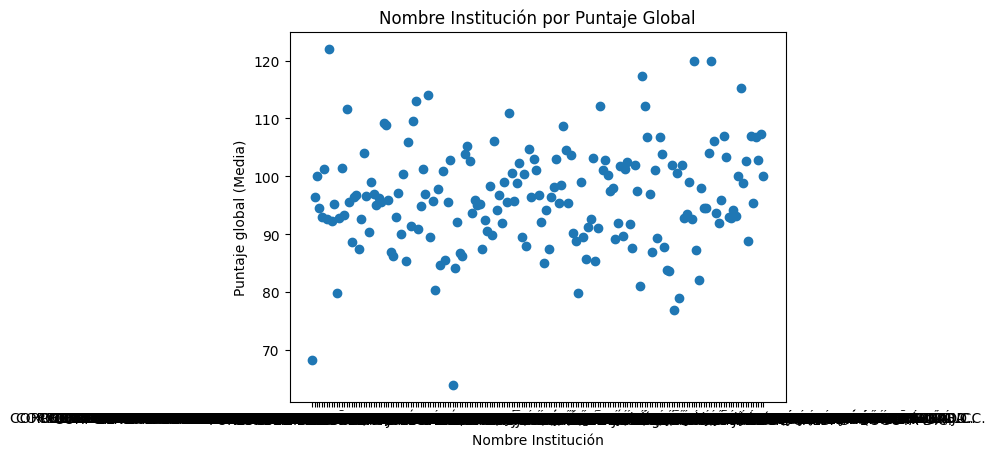

In [189]:
mean_scores = df.groupby('INST_NOMBRE_INSTITUCION')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Nombre Institución')
plt.ylabel('Puntaje global (Media)')
plt.title('Nombre Institución por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='INST_NOMBRE_INSTITUCION', ylabel='PUNT_GLOBAL'>

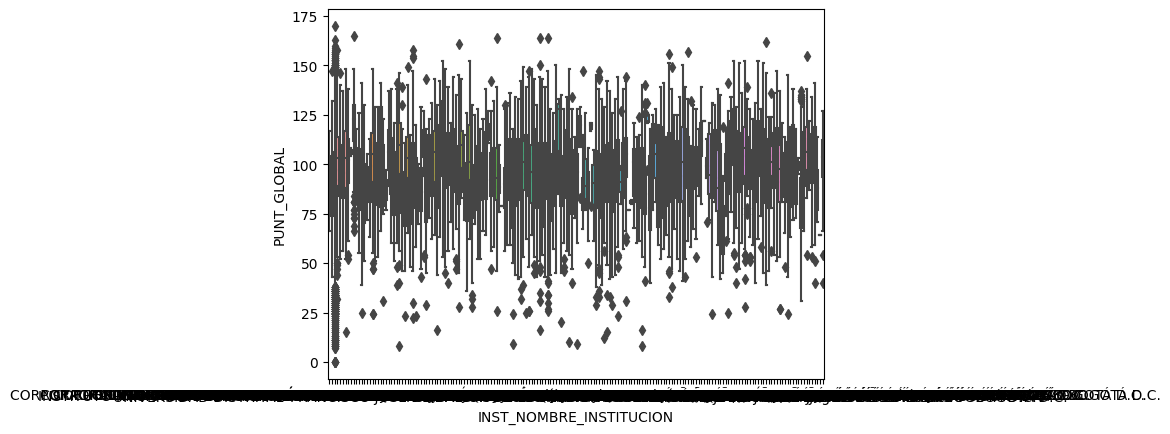

In [190]:
sns.boxplot(x="INST_NOMBRE_INSTITUCION", y="PUNT_GLOBAL", data=df)

### Histogram

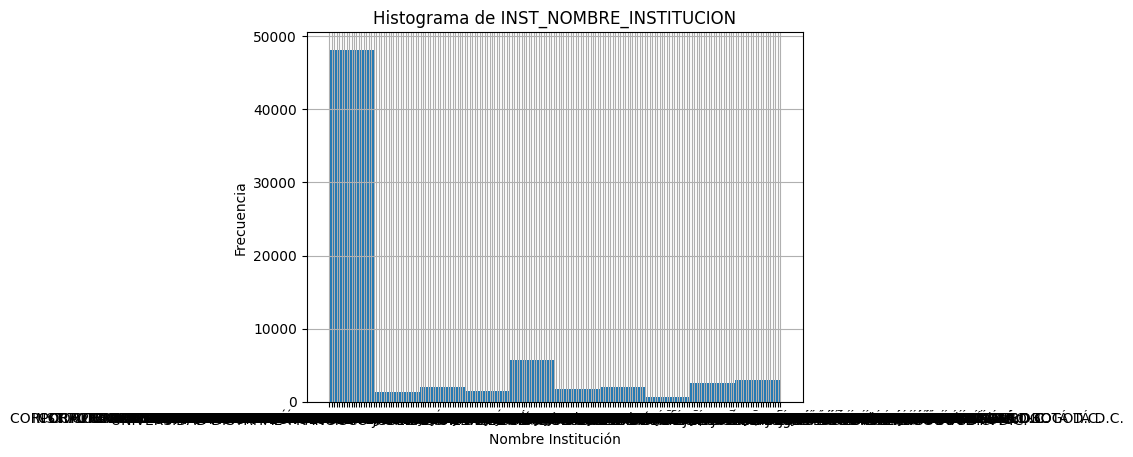

In [191]:
df["INST_NOMBRE_INSTITUCION"].hist()

plt.title("Histograma de INST_NOMBRE_INSTITUCION")
plt.xlabel("Nombre Institución")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta INST_NOMBRE_INSTITUCION porque es relevante para el analisis, y se transforman los datos

In [42]:
grouped = df[['INST_NOMBRE_INSTITUCION','PUNT_GLOBAL']].groupby("INST_NOMBRE_INSTITUCION").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['INST_NOMBRE_INSTITUCION'].fillna(middle_category, inplace=True)

institucion_counts = df['INST_NOMBRE_INSTITUCION'].value_counts()

otras_instituciones = institucion_counts[institucion_counts < 30].index.tolist()

df.loc[df['INST_NOMBRE_INSTITUCION'].isin(otras_instituciones), 'INST_NOMBRE_INSTITUCION'] = "OTROS"

In [43]:
df[['INST_NOMBRE_INSTITUCION','PUNT_GLOBAL']].groupby("INST_NOMBRE_INSTITUCION").agg(["count", "mean"])

PUNT_GLOBAL            
                                                         count        mean
INST_NOMBRE_INSTITUCION                                                   
COLEGIO MAYOR DE ANTIOQUIA-MEDELLIN                         87  100.103448
COLEGIO MAYOR DE BOLIVAR-CARTAGENA                          88   94.454545
COLEGIO MAYOR DEL CAUCA-POPAYAN                             99   92.949495
CORPORACION DE EDUCACION TECNOLOGICA COLSUBSIDI...          37   95.216216
CORPORACION DE ESTUDIOS SUPERIORES SALAMANDRA-CALI          53   79.867925
CORPORACION DE ESTUDIOS TECNOLOGICOS DEL NORTE ...          49   92.816327
CORPORACION INSTITUTO DE ADMINISTRACION Y FINAN...          76   96.447368
CORPORACION INSTITUTO SUPERIOR DE EDUCACION SOC...          52   96.750000
CORPORACION POLITECNICO DE LA COSTA ATLANTICA-B...         121   96.661157
CORPORACION TECNOLOGICA DE BOGOTA - C.T.B.-BOGO...          35   99.028571
CORPORACION TECNOLOGICA INDUSTRIAL COLOMBIANA -...          70   94.985714
CORPORACION UNIFICADA NACIONAL DE EDUCACION SUP...        2907   96.217750
CORPORACION UNIVERSAL DE INVESTIGACION Y TECNOL...          86   95.651163
CORPORACION UNIVERSITARIA AMERICANA-BARRANQUILLA           474   95.964135
CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMI...          47   94.914894
CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMI...         275  101.261818
CORPORACION UNIVERSITARIA RAFAEL NUÑEZ-CARTAGENA            74   96.878378
CORPORACION UNIVERSITARIA REMINGTON-MEDELLIN               162   89.592593
DIRECCION NACIONAL DE ESCUELAS-BOGOTÁ D.C.                2173   80.413254
ESCUELA  MILITAR DE SUBOFICIALES SARGENTO INOCE...         619   84.646204
ESCUELA DE ADMINISTRACION Y MERCADOTECNIA DEL Q...          80  100.962500
ESCUELA DE FORMACION DE INFANTERIA DE MARINA-TOLU           52   85.576923
ESCUELA DE TECNOLOGIAS DE ANTIOQUIA -ETA-MEDELLIN           42   92.166667
ESCUELA NAVAL DE SUBOFICIALES"ARC"BARRANQUILLA-...         272   86.169118
ESCUELA SUPERIOR TECNOLOGICA  DE ARTES DEBORA A...          73  103.808219
ESCUELA TECNOLOGICA INSTITUTO TECNICO CENTRAL -...         192  105.171875
FUNDACION ACADEMIA DE DIBUJO PROFESIONAL-CALI              155  102.716129
FUNDACION CENTRO COLOMBIANO DE ESTUDIOS PROFESI...         275   93.752727
FUNDACION DE EDUCACION SUPERIOR SAN JOSE -FESSA...         168   95.863095
FUNDACION DE ESTUDIOS SUPERIORES COMFANORTE -F....          61   94.983607
FUNDACION DE ESTUDIOS SUPERIORES UNIVERSITARIOS...          33   95.272727
FUNDACION ESCUELA TECNOLOGICA DE NEIVA - JESUS ...          90   87.400000
FUNDACION PARA LA EDUCACION SUPERIOR SAN MATEO ...         507   98.382643
FUNDACION TECNOLOGICA "ANTONIO DE AREVALO"-CART...         133   89.962406
FUNDACION TECNOLOGICA AUTONOMA DE BOGOTA-FABA-B...          33   94.181818
FUNDACION TECNOLOGICA AUTONOMA DEL PACIFICO-CALI           128   96.710938
FUNDACION TECNOLOGICA COLOMBO- GERMANA-BOGOTÁ D.C.         173   91.982659
FUNDACION UNIVERSITARIA AUTONOMA DE LAS AMERICA...          63   95.603175
FUNDACION UNIVERSITARIA CAFAM-BOGOTÁ D.C.                   45  110.888889
FUNDACION UNIVERSITARIA CATOLICA LUMEN GENTIUM-...         214   95.742991
FUNDACION UNIVERSITARIA COLOMBO INTERNACIONAL -...          75   98.786667
FUNDACION UNIVERSITARIA DE CIENCIAS DE LA SALUD...          30  102.233333
FUNDACION UNIVERSITARIA DEL AREA ANDINA-BOGOTÁ ...         233  100.364807
FUNDACION UNIVERSITARIA ESUMER-MEDELLIN                     86  104.697674
FUNDACION UNIVERSITARIA HORIZONTE-BOGOTÁ D.C.               50   96.500000
FUNDACION UNIVERSITARIA LOS LIBERTADORES-BOGOTÁ...          71  101.042254
FUNDACION UNIVERSITARIA PARA EL DESARROLLO HUMA...         115   96.791304
FUNDACION UNIVERSITARIA TECNOLOGICO COMFENALCO ...         374   92.181818
INSTITUCION  UNIVERSITARIA PASCUAL BRAVO-MEDELLIN          280   94.157143
INSTITUCION EDUCATIVA NORMAL SAN CARLOS-LA UNION            30   87.500000
INSTITUCION UNIVERSITARIA ANTONIO JOSE CAMACHO ...          83   96.469880
I

- - -
## Variable: ESTU_PRGM_ACADEMICO
- - -

In [10]:
df[['ESTU_PRGM_ACADEMICO','PUNT_GLOBAL']].groupby("ESTU_PRGM_ACADEMICO").agg(["count", "mean"])

PUNT_GLOBAL            
                                                         count        mean
ESTU_PRGM_ACADEMICO                                                       
CICLO COMPLEMENTARIO DE ESCUELAS NORMALES SUPER...          46   88.608696
DISEÑO DE MODAS                                             18  114.333333
GEOTECNOLOGIA                                                1  121.000000
POLICIA NACIONAL PATRULLEROS                                 1   64.000000
PROGRAMA TECNICO Y TECNOLOGO - SENA                         17   82.470588
...                                                        ...         ...
TÉCNICO PROFESIONAL EN PRODUCCIÓN GRÁFICA                    6  103.000000
TÉCNICO PROFESIONAL EN SERVICIO DE POLICÍA                1700   79.318235
TÉCNICO PROFESIONAL EN SERVICIOS A BORDO                    10   99.900000
TÉCNICO PROFESIONAL EN TRÁNSITO, TRANSPORTE Y S...           5   85.400000
TÉCNOLOGIA EN ARQUITECTURA DE SOFTWARE                      11  101.818182

[982 rows x 2 columns]

### Scatter Plot

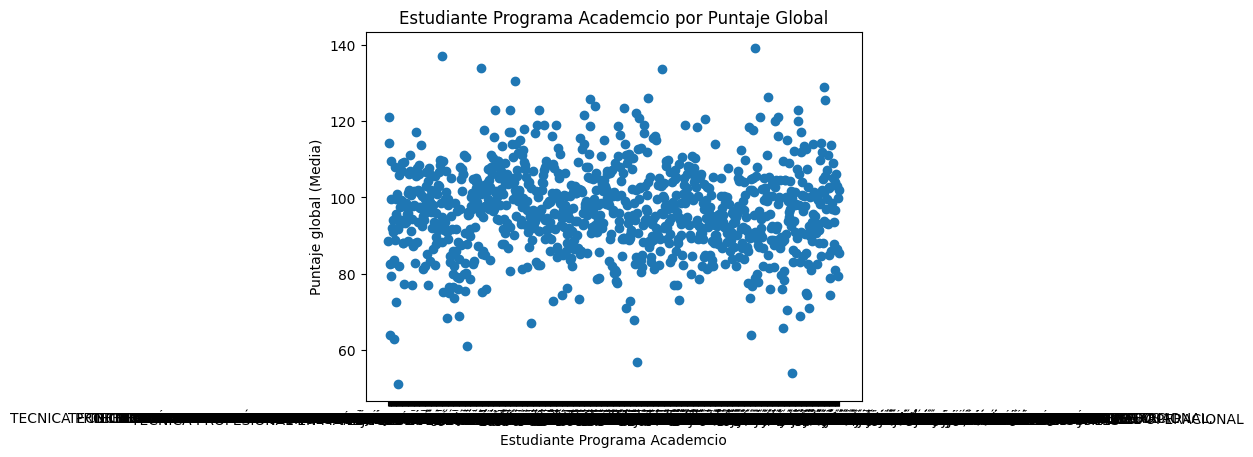

In [192]:
mean_scores = df.groupby('ESTU_PRGM_ACADEMICO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Programa Academcio')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Programa Academcio por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_PRGM_ACADEMICO', ylabel='PUNT_GLOBAL'>

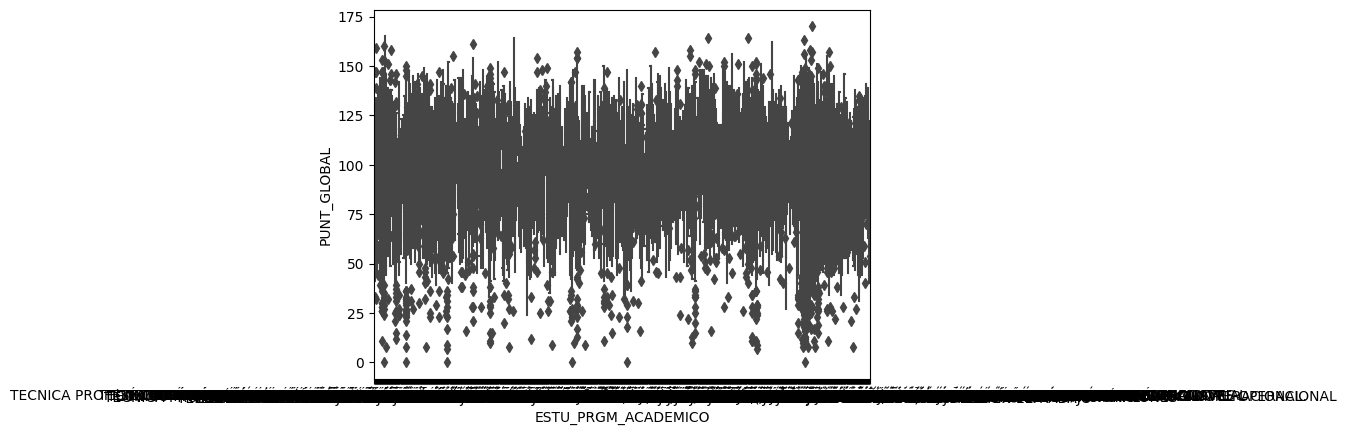

In [193]:
sns.boxplot(x="ESTU_PRGM_ACADEMICO", y="PUNT_GLOBAL", data=df)

### Histogram

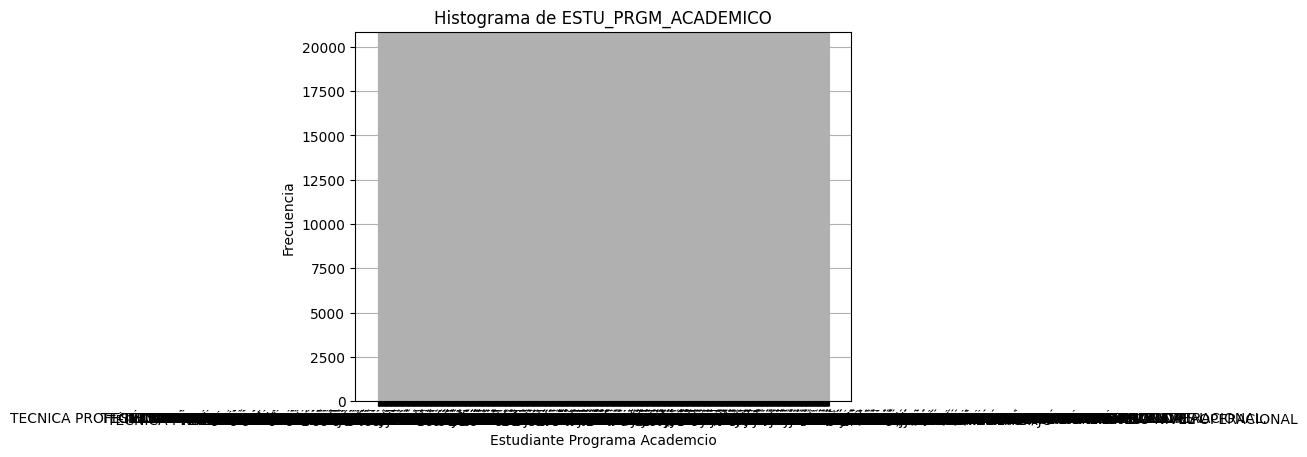

In [194]:
df["ESTU_PRGM_ACADEMICO"].hist()

plt.title("Histograma de ESTU_PRGM_ACADEMICO")
plt.xlabel("Estudiante Programa Academcio")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_PRGM_ACADEMICO porque es relevante para el analisis, y se transforman los datos

In [44]:
grouped = df[['ESTU_PRGM_ACADEMICO','PUNT_GLOBAL']].groupby("ESTU_PRGM_ACADEMICO").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_PRGM_ACADEMICO'].fillna(middle_category, inplace=True)

prgm_academico_counts = df['ESTU_PRGM_ACADEMICO'].value_counts()

otros_prgm_academico = prgm_academico_counts[prgm_academico_counts < 30].index.tolist()

df.loc[df['ESTU_PRGM_ACADEMICO'].isin(otros_prgm_academico), 'ESTU_PRGM_ACADEMICO'] = "OTROS"

In [45]:
df[['ESTU_PRGM_ACADEMICO','PUNT_GLOBAL']].groupby("ESTU_PRGM_ACADEMICO").agg(["count", "mean"])

PUNT_GLOBAL            
                                                         count        mean
ESTU_PRGM_ACADEMICO                                                       
CICLO COMPLEMENTARIO DE ESCUELAS NORMALES SUPER...          46   88.608696
OTROS                                                     6572   97.228850
TECNICA PROFESIONAL EN CONSTRUCCION DE EDIFICAC...          38   88.763158
TECNICA PROFESIONAL EN CONTABILIDAD                        135   95.703704
TECNICA PROFESIONAL EN DISEÑO GRAFICO                       66  109.060606
TECNICA PROFESIONAL EN ENTRENAMIENTO DEPORTIVO              35   77.314286
TECNICA PROFESIONAL EN GESTION EMPRESARIAL                  62   93.435484
TECNICA PROFESIONAL EN GESTIÓN EMPRESARIAL                 113   95.796460
TECNICA PROFESIONAL EN HOTELERIA                            38  101.026316
TECNICA PROFESIONAL EN LOGISTICA DE COMERCIO EX...         141  100.574468
TECNICA PROFESIONAL EN LOGISTICA DE PRODUCCIÓN              56   91.285714
TECNICA PROFESIONAL EN MANEJO DE LA PREVENCIÓN ...          74   94.351351
TECNICA PROFESIONAL EN MANTENIMIENTO ELECTROMEC...          81   97.777778
TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO            39   97.974359
TECNICA PROFESIONAL EN MEDIOS AUDIOVISUALES                 46  105.717391
TECNICA PROFESIONAL EN OPERACIÓN DE PROCESOS DE...          41   97.219512
TECNICA PROFESIONAL EN OPERACIÓN DE PROCESOS IN...          55   97.454545
TECNICA PROFESIONAL EN PERIODISMO INFORMATIVO               61  100.393443
TECNICA PROFESIONAL EN PROCESOS ADMINISTRATIVOS            697   92.569584
TECNICA PROFESIONAL EN PROCESOS ADMINISTRATIVOS...          33   97.121212
TECNICA PROFESIONAL EN PROCESOS CONTABLES                  173   95.959538
TECNICA PROFESIONAL EN PROCESOS EMPRESARIALES               35   85.142857
TECNICA PROFESIONAL EN PROCESOS LOGISTICOS Y DE...          43   98.790698
TECNICA PROFESIONAL EN PRODUCCION AGROPECUARIA              47   96.106383
TECNICA PROFESIONAL EN PROMOCION SOCIAL                     40   86.375000
TECNICA PROFESIONAL EN SECRETARIADO EJECUTIVO               32   82.156250
TECNICA PROFESIONAL EN SEGURIDAD E HIGIENE INDU...          35   95.942857
TECNICA PROFESIONAL EN SEGURIDAD VIAL                      263   87.722433
TECNICA PROFESIONAL EN SERVICIOS ADMINISTRATIVO...          73   92.904110
TECNICA PROFESIONAL EN SERVICIOS TURISTICOS Y H...          38  100.921053
TECNICA PROFESIONAL EN SISTEMAS                            169  103.136095
TECNICA PROFESIONAL EN SOPORTE  DE SISTEMAS INF...          36  102.916667
TECNICO PROFESIONAL EN COMERCIO Y NEGOCIOS INTE...          31   92.225806
TECNICO PROFESIONAL EN GASTRONOMIA                         114   98.105263
TECNICO PROFESIONAL EN MECATRONICA                          43  105.162791
TECNICO PROFESIONAL EN PROCESOS ADMINISTRATIVOS             30   98.633333
TECNICO PROFESIONAL EN PROCESOS ADMINISTRATIVOS...          60   91.816667
TECNICO PROFESIONAL EN PROCESOS DE  SEGURIDAD Y...          39   79.076923
TECNICO PROFESIONAL EN PROGRAMACION DE SISTEMAS...          40  106.225000
TECNICO PROFESIONAL EN SALUD ORAL                           53   90.547170
TECNICO PROFESIONAL EN SERVICIO DE POLICIA                 186   80.161290
TECNOLOGIA  EN PROCESOS INDUSTRIALES                        31   97.838710
TECNOLOGIA  EN SISTEMAS                                    175  100.051429
TECNOLOGIA AGROAMBIENTAL                                    38   96.842105
TECNOLOGIA DEPORTIVA                                        64   98.812500
TECNOLOGIA ELECTRICA                                        33  102.363636
TECNOLOGIA EMPRESARIAL                                      49   98.653061
TECNOLOGIA EN  MECANICA INDUSTRIAL                          35   95.771429
TECNOLOGIA EN ADMINISTRACION DE EMPRESAS                    70   94.785714
TECNOLOGIA EN ADMINISTRACION Y EJECUCION DE CON...          32   98.062500
TECNOLOGIA EN ANALISIS DE COSTOS Y PRESUPUESTOS            143  107.328671
T

- - -
## Variable: ESTU_SNIES_PRGMACADEMICO
- - -

In [13]:
df[['ESTU_SNIES_PRGMACADEMICO','PUNT_GLOBAL']].groupby("ESTU_SNIES_PRGMACADEMICO").agg(["count", "mean"])

PUNT_GLOBAL            
                               count        mean
ESTU_SNIES_PRGMACADEMICO                        
174.0                              1   92.000000
222.0                              1  121.000000
223.0                              5  119.600000
257.0                             50  107.060000
258.0                             20  101.900000
...                              ...         ...
107629.0                          61  100.245902
107631.0                          21  113.857143
108087.0                           8  104.875000
108479.0                           3   93.666667
108806.0                           7   93.142857

[1359 rows x 2 columns]

### Scatter Plot

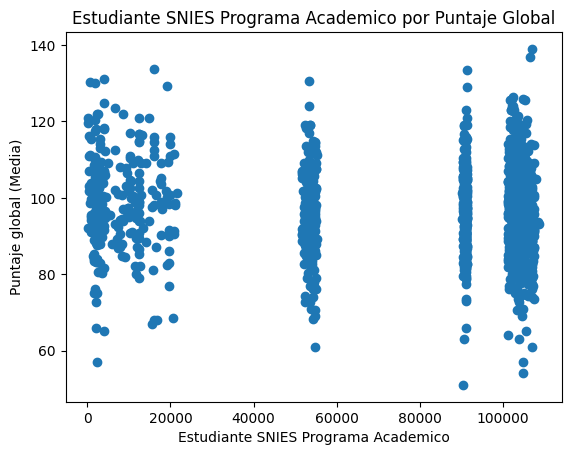

In [195]:
mean_scores = df.groupby('ESTU_SNIES_PRGMACADEMICO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante SNIES Programa Academico')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante SNIES Programa Academico por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_SNIES_PRGMACADEMICO', ylabel='PUNT_GLOBAL'>

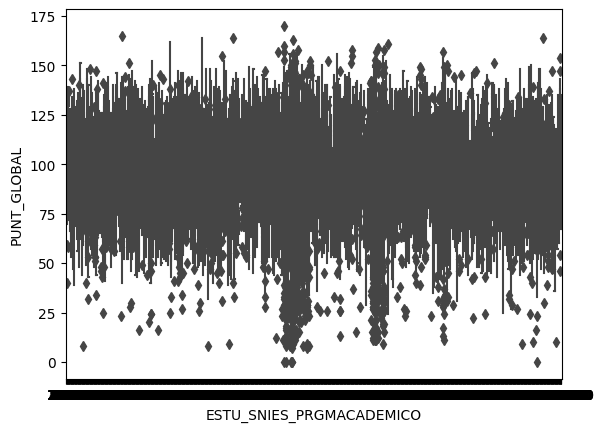

In [196]:
sns.boxplot(x="ESTU_SNIES_PRGMACADEMICO", y="PUNT_GLOBAL", data=df)

### Histogram

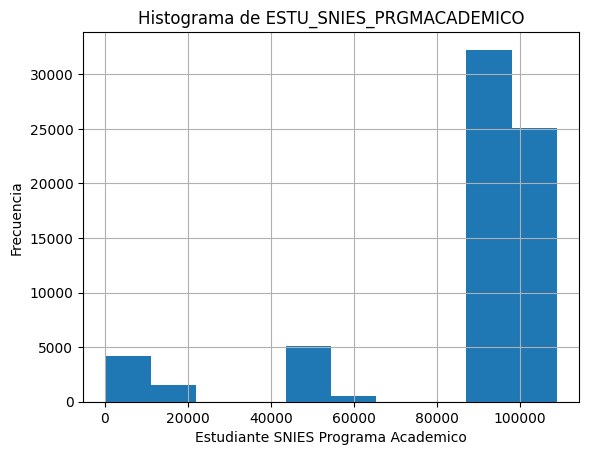

In [197]:
df["ESTU_SNIES_PRGMACADEMICO"].hist()

plt.title("Histograma de ESTU_SNIES_PRGMACADEMICO")
plt.xlabel("Estudiante SNIES Programa Academico")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_SNIES_PRGMACADEMICO porque no es relevante para el analisis

- - -
## Variable: GRUPOREFERENCIA
- - -

In [15]:
df[['GRUPOREFERENCIA','PUNT_GLOBAL']].groupby("GRUPOREFERENCIA").agg(["count", "mean"])

PUNT_GLOBAL            
                                                   count        mean
GRUPOREFERENCIA                                                     
EDUCACIÓN TYT                                          9   75.111111
GRUPO NACIONAL SENA-NO CLASIFICADOS                   17   82.470588
NORMALES SUPERIORES                                   46   88.608696
PONAL PATRULLEROS                                      1   64.000000
RECREACIÓN Y DEPORTES                                 42   74.738095
RECREACIÓN Y DEPORTES TYT                           1002   89.797405
TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO            29267   93.391226
TECNOLÓGICO EN ARTES - DISEÑO - COMUNICACIÓN        4011   99.496136
TECNOLÓGICO EN CIENCIAS AGROPECUARIAS               1595   84.144201
TECNOLÓGICO EN INGENIERÍA, INDUSTRIA Y MINAS       12731   93.189302
TECNOLÓGICO EN JUDICIAL                              209   99.177033
TECNOLÓGICO EN MILITAR Y POLICIAL                   2880   81.675347
TECNOLÓGICO EN SALUD                                5575   90.078027
TECNOLÓGICO EN TIC                                  5913   96.234230
TÉCNICO EN ADMINISTRACIÓN Y TURISMO                 3083   95.388258
TÉCNICO EN ARTES - DISEÑO - COMUNICACIÓN             762  102.450131
TÉCNICO EN CIENCIAS AGROPECUARIAS                    118   90.872881
TÉCNICO EN INGENIERÍA, INDUSTRIA Y MINAS             596   97.385906
TÉCNICO EN SALUD                                     345   88.997101
TÉCNICO EN TIC                                       523  102.782027

### Scatter Plot

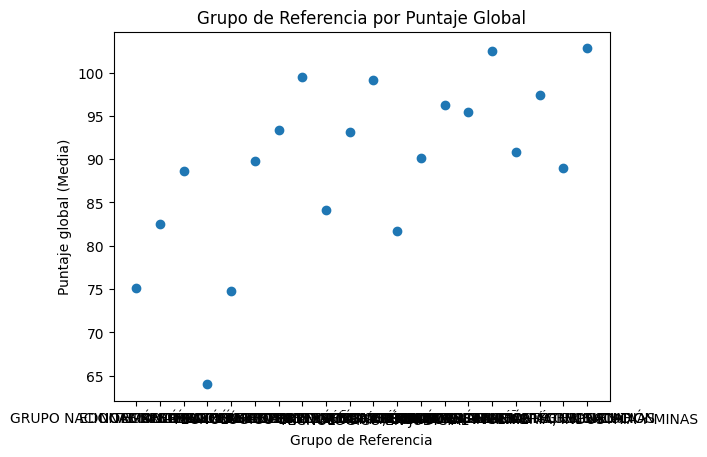

In [198]:
mean_scores = df.groupby('GRUPOREFERENCIA')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Grupo de Referencia')
plt.ylabel('Puntaje global (Media)')
plt.title('Grupo de Referencia por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='GRUPOREFERENCIA', ylabel='PUNT_GLOBAL'>

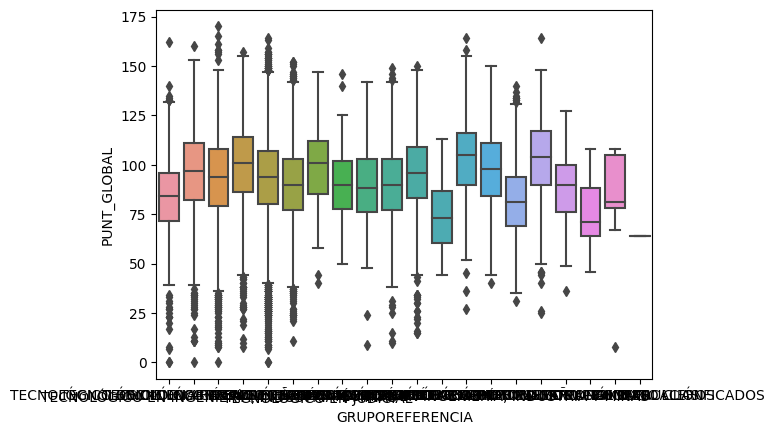

In [199]:
sns.boxplot(x="GRUPOREFERENCIA", y="PUNT_GLOBAL", data=df)

### Histogram

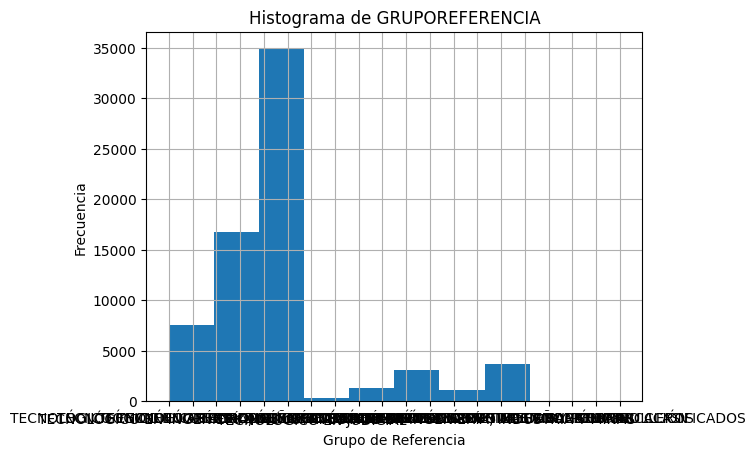

In [200]:
df["GRUPOREFERENCIA"].hist()

plt.title("Histograma de GRUPOREFERENCIA")
plt.xlabel("Grupo de Referencia")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta GRUPOREFERENCIA porque es relevante para el analisis, y se transforman los datos

In [46]:
grouped = df[['GRUPOREFERENCIA','PUNT_GLOBAL']].groupby("GRUPOREFERENCIA").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['GRUPOREFERENCIA'].fillna(middle_category, inplace=True)

gruporeferencia_counts = df['GRUPOREFERENCIA'].value_counts()

gruporeferencia = gruporeferencia_counts[gruporeferencia_counts < 30].index.tolist()

df.loc[df['GRUPOREFERENCIA'].isin(gruporeferencia), 'GRUPOREFERENCIA'] = "OTROS"

In [47]:
df[['GRUPOREFERENCIA','PUNT_GLOBAL']].groupby("GRUPOREFERENCIA").agg(["count", "mean"])

PUNT_GLOBAL            
                                                   count        mean
GRUPOREFERENCIA                                                     
NORMALES SUPERIORES                                   46   88.608696
OTROS                                                 27   79.333333
RECREACIÓN Y DEPORTES                                 42   74.738095
RECREACIÓN Y DEPORTES TYT                           1002   89.797405
TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO            29267   93.391226
TECNOLÓGICO EN ARTES - DISEÑO - COMUNICACIÓN        4011   99.496136
TECNOLÓGICO EN CIENCIAS AGROPECUARIAS               1595   84.144201
TECNOLÓGICO EN INGENIERÍA, INDUSTRIA Y MINAS       12731   93.189302
TECNOLÓGICO EN JUDICIAL                              209   99.177033
TECNOLÓGICO EN MILITAR Y POLICIAL                   2880   81.675347
TECNOLÓGICO EN SALUD                                5575   90.078027
TECNOLÓGICO EN TIC                                  5913   96.234230
TÉCNICO EN ADMINISTRACIÓN Y TURISMO                 3083   95.388258
TÉCNICO EN ARTES - DISEÑO - COMUNICACIÓN             762  102.450131
TÉCNICO EN CIENCIAS AGROPECUARIAS                    118   90.872881
TÉCNICO EN INGENIERÍA, INDUSTRIA Y MINAS             596   97.385906
TÉCNICO EN SALUD                                     345   88.997101
TÉCNICO EN TIC                                       523  102.782027

- - -
## Variable: ESTU_PRGM_CODMUNICIPIO
- - -

In [17]:
df[['ESTU_PRGM_CODMUNICIPIO','PUNT_GLOBAL']].groupby("ESTU_PRGM_CODMUNICIPIO").agg(["count", "mean"])

PUNT_GLOBAL            
                             count        mean
ESTU_PRGM_CODMUNICIPIO                        
5001                          6719   95.073821
5031                           103   94.601942
5034                             9   95.222222
5042                           111   82.783784
5045                           482   85.290456
5059                            34   94.588235
5088                            33   96.424242
5129                           418   88.119617
5148                            11  103.454545
5154                           277   83.570397
5190                            36   83.388889
5250                             1   83.000000
5266                            83  103.710843
5318                            27   92.296296
5360                           877   91.777651
5376                            41   91.219512
5579                           177   85.672316
5615                           684   94.557018
5659                             1   66.000000
5664                            15   95.866667
5686                            85   92.576471
5887                            10  105.300000
8001                          3288   89.159976
8433                             8   95.500000
8573                             9   91.000000
8638                            94   79.819149
8758                           365   98.564384
11001                        24912   96.713552
13001                         2910   88.819244
13468                            3   90.000000
15001                          666   92.156156
15176                            8  104.875000
15238                          137   92.124088
15299                           20   88.100000
15407                           16   88.375000
15572                           18   84.500000
15693                          193   78.839378
15759                          625   91.476800
17001                         1012   91.446640
17174                            1  121.000000
17380                          107   90.112150
17444                            8   93.750000
17541                            7   99.571429
17662                            1   77.000000
18001                          139   84.546763
19001                         1012   91.827075
19698                           71   81.676056
19743                            1   60.000000
20001                          703   86.852063
20011                          186   82.870968
23001                          268   84.373134
23162                            6   88.166667
23660                            1  115.000000
25126                           42   90.809524
25175                         1014   93.866864
25269                          169   81.201183
25286                           11  102.727273
25290                          310   94.151613
25307                          367   90.242507
25430                           23   85.347826
25473                          379   96.097625
25488                          619   84.646204
25754                          537   95.668529
25875                          244   92.069672
25899                            7   95.142857
27001                           21   77.238095
27050                           44   74.954545
27787                            3   85.000000
41001                          386   91.046632
41132                          207   85.285024
41298                          287   86.087108
41396                          184   87.097826
41551                          243   88.543210
41615                           90   87.400000
44001                          131   86.473282
44279                          135   82.992593
44650                           38   88.842105
47001                          466   85.746781
47189                           62   82.516129
50001                          844   89.590047
50313                          141   87.163121
52001                          379   91.176781
52356                       

### Scatter Plot

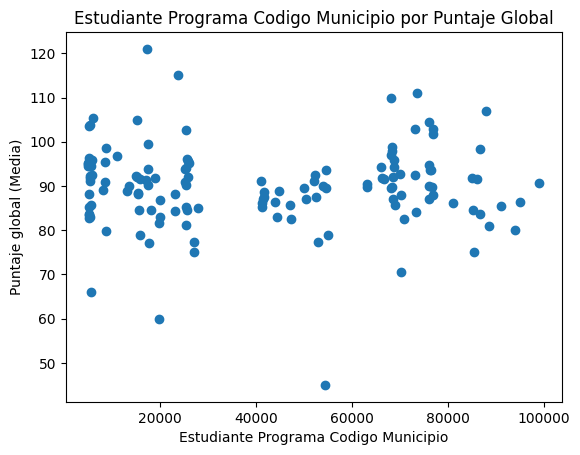

In [201]:
mean_scores = df.groupby('ESTU_PRGM_CODMUNICIPIO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Programa Codigo Municipio')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Programa Codigo Municipio por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_PRGM_CODMUNICIPIO', ylabel='PUNT_GLOBAL'>

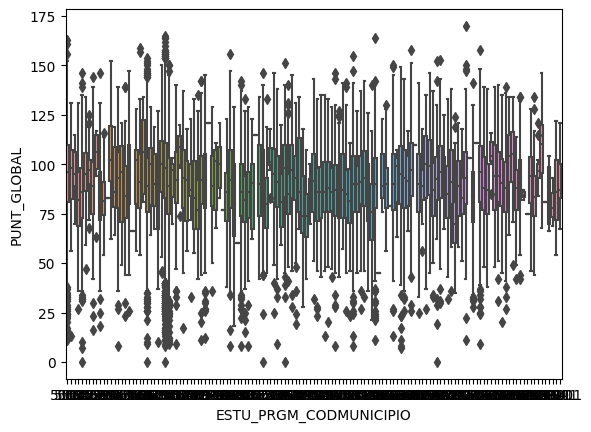

In [202]:
sns.boxplot(x="ESTU_PRGM_CODMUNICIPIO", y="PUNT_GLOBAL", data=df)

### Histogram

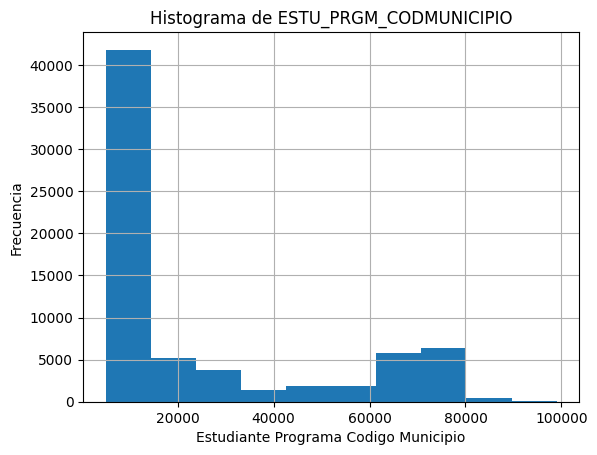

In [203]:
df["ESTU_PRGM_CODMUNICIPIO"].hist()

plt.title("Histograma de ESTU_PRGM_CODMUNICIPIO")
plt.xlabel("Estudiante Programa Codigo Municipio")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_PRGM_CODMUNICIPIO porque no es relevante para el analisis

- - -
## Variable: ESTU_PRGM_MUNICIPIO
- - -

In [20]:
df[['ESTU_PRGM_MUNICIPIO','PUNT_GLOBAL']].groupby("ESTU_PRGM_MUNICIPIO").agg(["count", "mean"])

PUNT_GLOBAL            
                                count        mean
ESTU_PRGM_MUNICIPIO                              
AGUACHICA                         186   82.870968
AMALFI                            103   94.601942
ANDES                               9   95.222222
APARTADÓ                          482   85.290456
ARAUCA                             49   86.244898
ARMENIA                           924   90.653680
ATRATO                             44   74.954545
BARBOSA                             1  110.000000
BARRANCABERMEJA                   428   89.640187
BARRANQUILLA                     3288   89.159976
BELLO                              33   96.424242
BOGOTÁ D.C.                     24912   96.713552
BUCARAMANGA                      1593   97.020716
BUENAVENTURA                       71   90.070423
CAICEDONIA                          8  104.500000
CAJAMARCA                           1  103.000000
CAJICÁ                             42   90.809524
CALARCÁ                             3   89.666667
CALDAS                            418   88.119617
CALI                             2498   94.715773
CAMPOALEGRE                       207   85.285024
CARTAGENA DE INDIAS              2910   88.819244
CARTAGO                           183   93.535519
CAUCASIA                          277   83.570397
CERETÉ                              6   88.166667
CHINCHINÁ                           1  121.000000
CHIQUINQUIRÁ                        8  104.875000
CHÍA                             1014   93.866864
CISNEROS                           36   83.388889
CIÉNAGA                            62   82.516129
COROZAL                           176   70.642045
COVEÑAS                            30   88.000000
CÚCUTA                           1194   90.054439
DOSQUEBRADAS                      348   91.767241
DUITAMA                           137   92.124088
EL BAGRE                            1   83.000000
EL CARMEN DE VIBORAL               11  103.454545
EL PLAYÓN                          23   89.782609
ENVIGADO                           83  103.710843
ESPINAL                           892   84.066143
FACATATIVÁ                        169   81.201183
FLORENCIA                         139   84.546763
FLORIDABLANCA                     212   98.000000
FONSECA                           135   82.992593
FUNZA                              11  102.727273
FUSAGASUGÁ                        310   94.151613
GARAGOA                            20   88.100000
GARZÓN                            287   86.087108
GIRARDOT                          367   90.242507
GIRÓN                             143   98.790210
GRANADA                           141   87.163121
GUADALAJARA DE BUGA               304   87.006579
GUARNE                             27   92.296296
HERRÁN                              1   45.000000
IBAGUÉ                           1447   92.540428
INÍRIDA                             3   80.000000
IPIALES                           127   92.464567
ITAGÜÍ                            877   91.777651
LA CEJA                            41   91.219512
LA DORADA                         107   90.112150
LA PLATA                          184   87.097826
LA UNIÓN                           30   87.500000
LETICIA                            11   85.363636
MADRID                             23   85.347826
MALAMBO                             8   95.500000
MANIZALES                        1012   91.446640
MARQUETALIA                         8   93.750000
MEDELLÍN                         6719   95.073821
MELGAR                              1  111.000000
MOCOA                              75   91.480000
MOMPÓS                              3   90.000000
MONTERREY                           2   84.500000
MONTERÍA                          268   84.373134
MOSQUERA                          379   96.097625
MÁLAGA                            111   87.126126
NEIVA                             386   91.046632
NILO                              619   84.646204
OCAÑA                     

### Scatter Plot

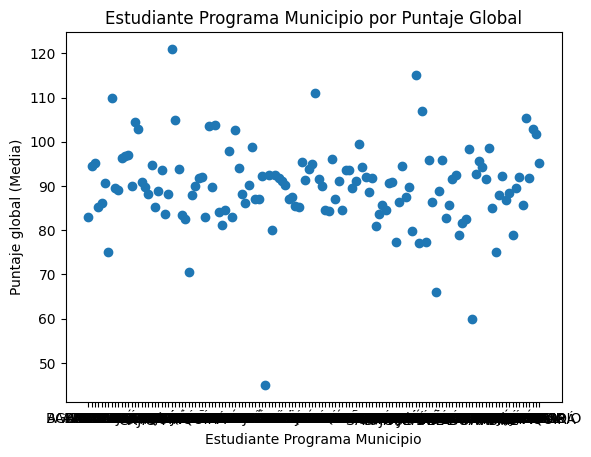

In [204]:
mean_scores = df.groupby('ESTU_PRGM_MUNICIPIO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Programa Municipio')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Programa Municipio por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_PRGM_MUNICIPIO', ylabel='PUNT_GLOBAL'>

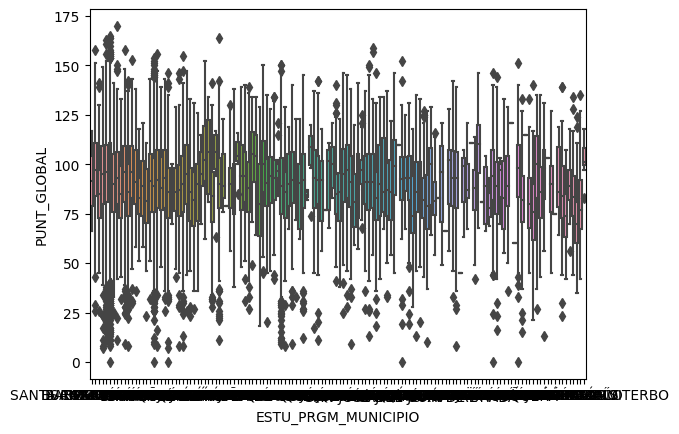

In [205]:
sns.boxplot(x="ESTU_PRGM_MUNICIPIO", y="PUNT_GLOBAL", data=df)

### Histogram

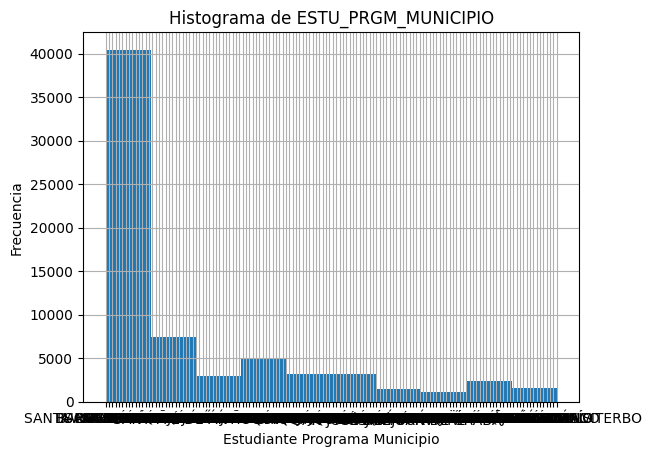

In [206]:
df["ESTU_PRGM_MUNICIPIO"].hist()

plt.title("Histograma de ESTU_PRGM_MUNICIPIO")
plt.xlabel("Estudiante Programa Municipio")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_PRGM_MUNICIPIO porque es relevante para el analisis, y se transforman los datos

In [48]:
grouped = df[['ESTU_PRGM_MUNICIPIO','PUNT_GLOBAL']].groupby("ESTU_PRGM_MUNICIPIO").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_PRGM_MUNICIPIO'].fillna(middle_category, inplace=True)

prgm_municipio_counts = df['ESTU_PRGM_MUNICIPIO'].value_counts()

prgm_municipio = prgm_municipio_counts[prgm_municipio_counts < 30].index.tolist()

df.loc[df['ESTU_PRGM_MUNICIPIO'].isin(prgm_municipio), 'ESTU_PRGM_MUNICIPIO'] = "OTROS"

In [49]:
df[['ESTU_PRGM_MUNICIPIO','PUNT_GLOBAL']].groupby("ESTU_PRGM_MUNICIPIO").agg(["count", "mean"])

PUNT_GLOBAL            
                             count        mean
ESTU_PRGM_MUNICIPIO                           
AGUACHICA                      186   82.870968
AMALFI                         103   94.601942
APARTADÓ                       482   85.290456
ARAUCA                          49   86.244898
ARMENIA                        924   90.653680
ATRATO                          44   74.954545
BARRANCABERMEJA                428   89.640187
BARRANQUILLA                  3288   89.159976
BELLO                           33   96.424242
BOGOTÁ D.C.                  24912   96.713552
BUCARAMANGA                   1593   97.020716
BUENAVENTURA                    71   90.070423
CAJICÁ                          42   90.809524
CALDAS                         418   88.119617
CALI                          2498   94.715773
CAMPOALEGRE                    207   85.285024
CARTAGENA DE INDIAS           2910   88.819244
CARTAGO                        183   93.535519
CAUCASIA                       277   83.570397
CHÍA                          1014   93.866864
CISNEROS                        36   83.388889
CIÉNAGA                         62   82.516129
COROZAL                        176   70.642045
COVEÑAS                         30   88.000000
CÚCUTA                        1194   90.054439
DOSQUEBRADAS                   348   91.767241
DUITAMA                        137   92.124088
ENVIGADO                        83  103.710843
ESPINAL                        892   84.066143
FACATATIVÁ                     169   81.201183
FLORENCIA                      139   84.546763
FLORIDABLANCA                  212   98.000000
FONSECA                        135   82.992593
FUSAGASUGÁ                     310   94.151613
GARZÓN                         287   86.087108
GIRARDOT                       367   90.242507
GIRÓN                          143   98.790210
GRANADA                        141   87.163121
GUADALAJARA DE BUGA            304   87.006579
IBAGUÉ                        1447   92.540428
IPIALES                        127   92.464567
ITAGÜÍ                         877   91.777651
LA CEJA                         41   91.219512
LA DORADA                      107   90.112150
LA PLATA                       184   87.097826
LA UNIÓN                        30   87.500000
MANIZALES                     1012   91.446640
MEDELLÍN                      6719   95.073821
MOCOA                           75   91.480000
MONTERÍA                       268   84.373134
MOSQUERA                       379   96.097625
MÁLAGA                         111   87.126126
NEIVA                          386   91.046632
NILO                           619   84.646204
OTROS                          415   92.293976
PALMIRA                        226   93.650442
PAMPLONA                        90   89.477778
PASTO                          379   91.176781
PEREIRA                       1044   94.189655
PIEDECUESTA                    114   92.122807
PITALITO                       243   88.543210
POPAYÁN                       1012   91.827075
PUERTO ASÍS                    142   83.704225
PUERTO BERRÍO                  177   85.672316
RIOHACHA                       131   86.473282
RIONEGRO                       684   94.557018
RIVERA                          90   87.400000
ROLDANILLO                     186   89.801075
SABANALARGA                     94   79.819149
SAN ANDRÉS DE TUMACO            64   77.343750
SAN GIL                        196   95.862245
SAN JOSÉ DEL GUAVIARE           85   86.329412
SAN JUAN DEL CESAR              38   88.842105
SANTA FÉ DE ANTIOQUIA          111   82.783784
SANTA MARTA                    466   85.746781
SANTA ROSA DE OSOS              85   92.576471
SANTA ROSA DE VITERBO          193   78.839378
SANTANDER DE QUILICHAO          71   81.676056
SINCELEJO                      105   92.704762
SOACHA                         537   95.668529
SOCORRO                         39   94.230769
SOGAMOSO                       625   91.476800
SOLEDAD                     

- - -
## Variable: ESTU_PRGM_DEPARTAMENTO
- - -

In [27]:
df[['ESTU_PRGM_DEPARTAMENTO','PUNT_GLOBAL']].groupby("ESTU_PRGM_DEPARTAMENTO").agg(["count", "mean"])

PUNT_GLOBAL            
                             count        mean
ESTU_PRGM_DEPARTAMENTO                        
AMAZONAS                        11   85.363636
ANTIOQUIA                    10234   93.404436
ARAUCA                          49   86.244898
ATLANTICO                     3764   89.856536
BOGOTÁ                       24912   96.713552
BOLIVAR                       2913   88.820460
BOYACA                        1683   90.268568
CALDAS                        1136   91.400528
CAQUETA                        139   84.546763
CASANARE                       180   91.666667
CAUCA                         1084   91.132841
CESAR                          889   86.019123
CHOCO                           68   76.102941
CORDOBA                        275   84.567273
CUNDINAMARCA                  3722   91.735357
GUAINIA                          3   80.000000
GUAVIARE                        85   86.329412
HUILA                         1397   87.983536
LA GUAJIRA                     304   85.223684
MAGDALENA                      528   85.367424
META                           985   89.242640
NARIÑO                         600   89.790000
NORTE SANTANDER               1299   90.007698
PUTUMAYO                       231   87.116883
QUINDIO                        893   90.500560
RISARALDA                     1394   93.581062
SAN ANDRES                      21  105.761905
SANTANDER                     3168   94.397096
SUCRE                          336   79.967262
TOLIMA                        2341   89.323793
VALLE                         4066   93.012297
VICHADA                         15   90.666667

### Scatter Plot

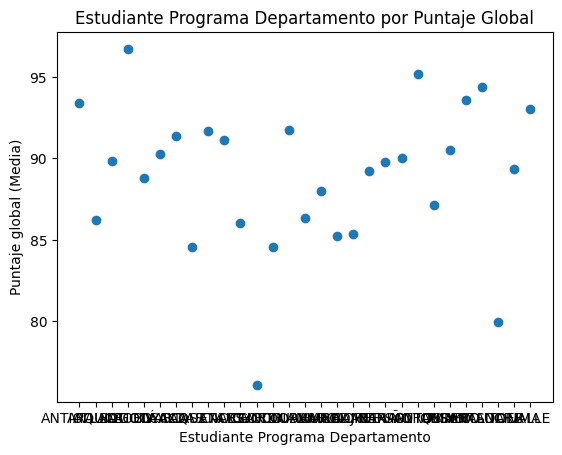

In [207]:
mean_scores = df.groupby('ESTU_PRGM_DEPARTAMENTO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Programa Departamento')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Programa Departamento por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO', ylabel='PUNT_GLOBAL'>

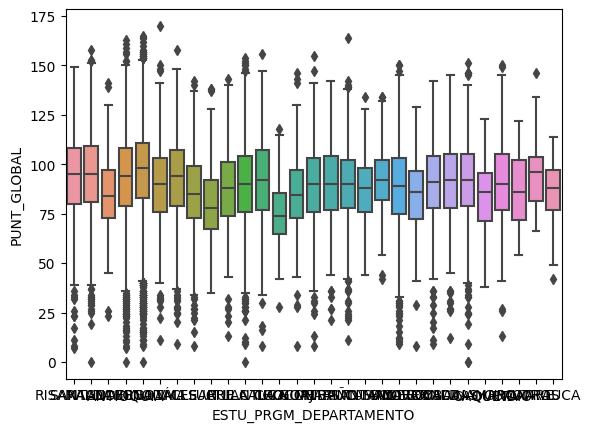

In [208]:
sns.boxplot(x="ESTU_PRGM_DEPARTAMENTO", y="PUNT_GLOBAL", data=df)

### Histogram

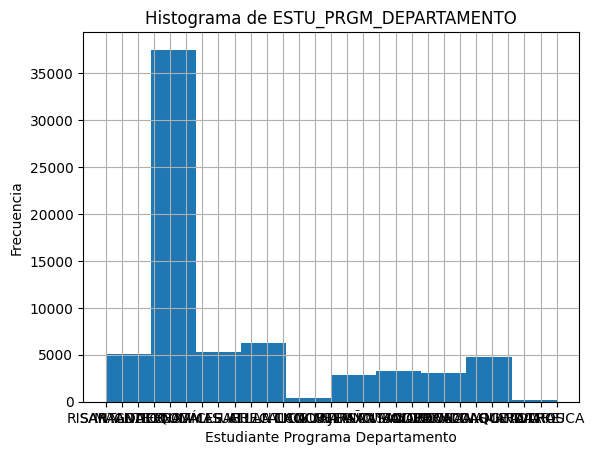

In [209]:
df["ESTU_PRGM_DEPARTAMENTO"].hist()

plt.title("Histograma de ESTU_PRGM_DEPARTAMENTO")
plt.xlabel("Estudiante Programa Departamento")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_PRGM_DEPARTAMENTO porque es relevante para el analisis, y se transforman los datos

In [50]:
grouped = df[['ESTU_PRGM_DEPARTAMENTO','PUNT_GLOBAL']].groupby("ESTU_PRGM_DEPARTAMENTO").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_PRGM_DEPARTAMENTO'].fillna(middle_category, inplace=True)

prgm_departamento_counts = df['ESTU_PRGM_DEPARTAMENTO'].value_counts()

prgm_departamento = prgm_departamento_counts[prgm_departamento_counts < 30].index.tolist()

df.loc[df['ESTU_PRGM_DEPARTAMENTO'].isin(prgm_departamento), 'ESTU_PRGM_DEPARTAMENTO'] = "OTROS"

In [51]:
df[['ESTU_PRGM_DEPARTAMENTO','PUNT_GLOBAL']].groupby("ESTU_PRGM_DEPARTAMENTO").agg(["count", "mean"])

PUNT_GLOBAL           
                             count       mean
ESTU_PRGM_DEPARTAMENTO                       
ANTIOQUIA                    10234  93.404436
ARAUCA                          49  86.244898
ATLANTICO                     3764  89.856536
BOGOTÁ                       24912  96.713552
BOLIVAR                       2913  88.820460
BOYACA                        1683  90.268568
CALDAS                        1136  91.400528
CAQUETA                        139  84.546763
CASANARE                       180  91.666667
CAUCA                         1084  91.132841
CESAR                          889  86.019123
CHOCO                           68  76.102941
CORDOBA                        275  84.567273
CUNDINAMARCA                  3722  91.735357
GUAVIARE                        85  86.329412
HUILA                         1397  87.983536
LA GUAJIRA                     304  85.223684
MAGDALENA                      528  85.367424
META                           985  89.242640
NARIÑO                         600  89.790000
NORTE SANTANDER               1299  90.007698
OTROS                           50  95.200000
PUTUMAYO                       231  87.116883
QUINDIO                        893  90.500560
RISARALDA                     1394  93.581062
SANTANDER                     3168  94.397096
SUCRE                          336  79.967262
TOLIMA                        2341  89.323793
VALLE                         4066  93.012297

- - -
## Variable: ESTU_NIVEL_PRGM_ACADEMICO
- - -

In [30]:
df[['ESTU_NIVEL_PRGM_ACADEMICO','PUNT_GLOBAL']].groupby("ESTU_NIVEL_PRGM_ACADEMICO").agg(["count", "mean"])

PUNT_GLOBAL           
                                count       mean
ESTU_NIVEL_PRGM_ACADEMICO                       
TECNOLOGÍA                      61358  93.316112
TÉCNICO PROFESIONAL              7367  92.188272

### Scatter Plot

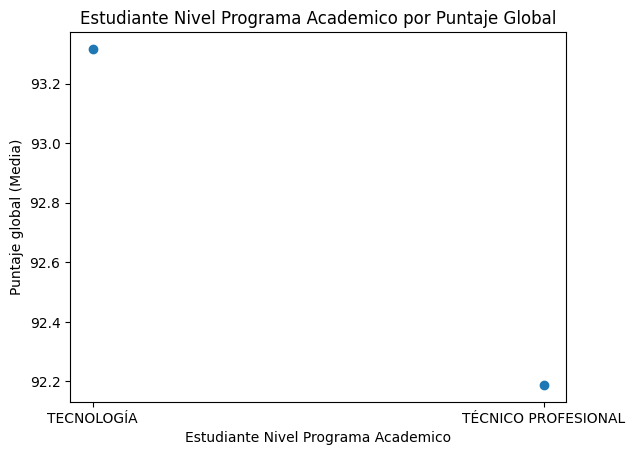

In [210]:
mean_scores = df.groupby('ESTU_NIVEL_PRGM_ACADEMICO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Nivel Programa Academico')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Nivel Programa Academico por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_NIVEL_PRGM_ACADEMICO', ylabel='PUNT_GLOBAL'>

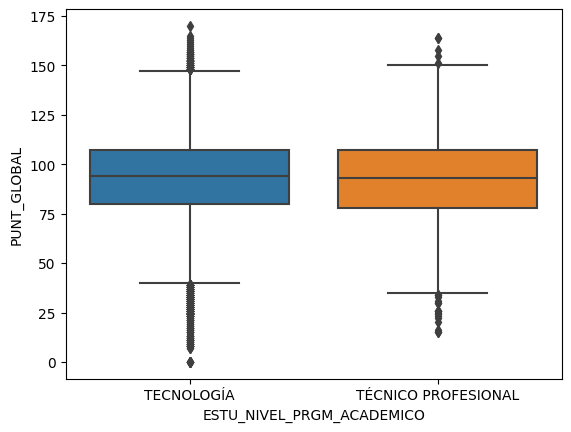

In [211]:
sns.boxplot(x="ESTU_NIVEL_PRGM_ACADEMICO", y="PUNT_GLOBAL", data=df)

### Histogram

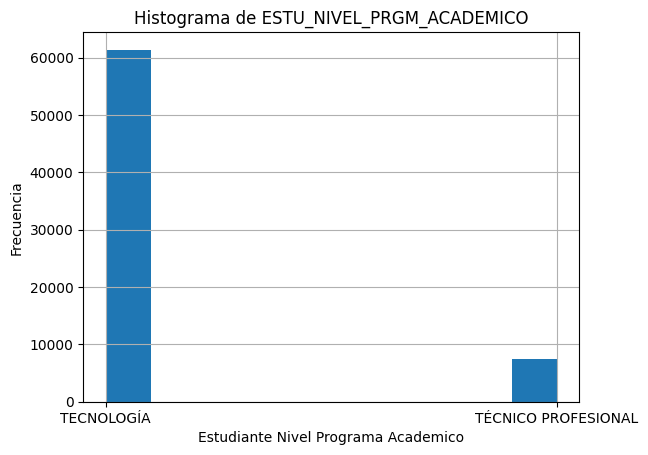

In [212]:
df["ESTU_NIVEL_PRGM_ACADEMICO"].hist()

plt.title("Histograma de ESTU_NIVEL_PRGM_ACADEMICO")
plt.xlabel("Estudiante Nivel Programa Academico")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_NIVEL_PRGM_ACADEMICO porque no es relevante para el analisis

- - -
## Variable: ESTU_METODO_PRGM
- - -

In [35]:
df[['ESTU_METODO_PRGM','PUNT_GLOBAL']].groupby("ESTU_METODO_PRGM").agg(["count", "mean"])

PUNT_GLOBAL           
                       count       mean
ESTU_METODO_PRGM                       
DISTANCIA               3288  93.497871
DISTANCIA VITUAL        4994  97.044654
PRESENCIAL             60443  92.860695

### Scatter Plot

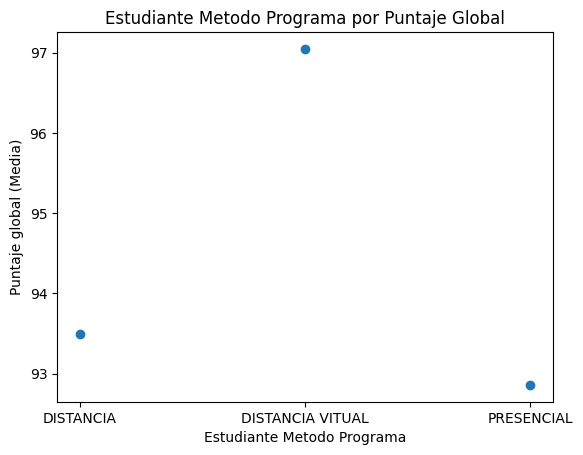

In [213]:
mean_scores = df.groupby('ESTU_METODO_PRGM')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Metodo Programa')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Metodo Programa por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_METODO_PRGM', ylabel='PUNT_GLOBAL'>

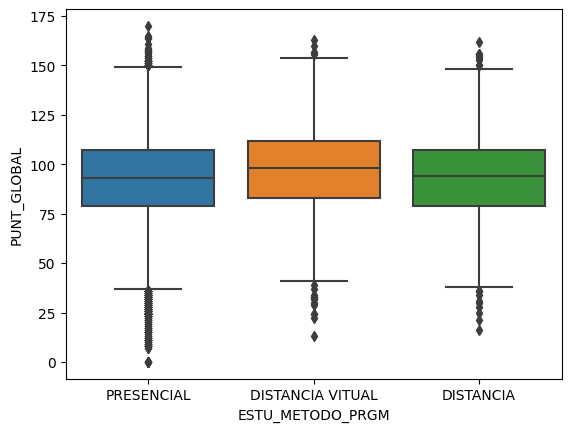

In [214]:
sns.boxplot(x="ESTU_METODO_PRGM", y="PUNT_GLOBAL", data=df)

### Histogram

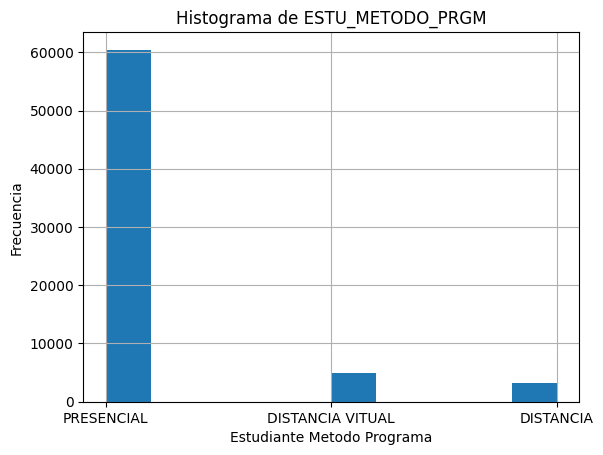

In [215]:
df["ESTU_METODO_PRGM"].hist()

plt.title("Histograma de ESTU_METODO_PRGM")
plt.xlabel("Estudiante Metodo Programa")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_METODO_PRGM porque es relevante para el analisis

In [52]:
grouped = df[['ESTU_METODO_PRGM','PUNT_GLOBAL']].groupby("ESTU_METODO_PRGM").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_METODO_PRGM'].fillna(middle_category, inplace=True)

In [53]:
df[['ESTU_METODO_PRGM','PUNT_GLOBAL']].groupby("ESTU_METODO_PRGM").agg(["count", "mean"])

PUNT_GLOBAL           
                       count       mean
ESTU_METODO_PRGM                       
DISTANCIA               3288  93.497871
DISTANCIA VITUAL        4994  97.044654
PRESENCIAL             60443  92.860695

- - -
## Variable: ESTU_NUCLEO_PREGRADO
- - -

In [32]:
df[['ESTU_NUCLEO_PREGRADO','PUNT_GLOBAL']].groupby("ESTU_NUCLEO_PREGRADO").agg(["count", "mean"])

PUNT_GLOBAL            
                                                         count        mean
ESTU_NUCLEO_PREGRADO                                                      
ADMINISTRACIÓN                                           23765   93.120050
AGRONOMÍA                                                 1247   84.338412
ARQUITECTURA                                               863   97.235226
ARTES PLÁSTICAS, VISUALES Y AFINES                         156  105.538462
ARTES REPRESENTATIVAS                                       89   97.820225
BACTERIOLOGÍA                                               11  101.636364
BIBLIOTECOLOGÍA, OTROS DE CIENCIAS SOCIALES Y H...        1529   88.275343
BIOLOGÍA, MICROBIOLOGÍA Y AFINES                           195   94.476923
COMUNICACIÓN SOCIAL, PERIODISMO Y AFINES                   460   99.889130
CONTADURÍA PUBLICA                                        5044   94.380056
DEPORTES, EDUCACIÓN FÍSICA Y RECREACIÓN                    158   89.981013
DERECHO Y AFINES                                           176   98.522727
DISEÑO                                                    1870   97.381283
ECONOMÍA                                                  4010   94.235661
EDUCACIÓN                                                  823   89.658566
ENFERMERÍA                                                  33   89.303030
FORMACIÓN RELACIONADA CON EL CAMPO MILITAR O PO...        2909   81.676177
FÍSICA                                                       4   83.000000
GEOGRAFÍA, HISTORIA                                          6  101.666667
GEOLOGÍA, OTROS PROGRAMAS DE CIENCIAS NATURALES            535   88.968224
INGENIERÍA ADMINISTRATIVA Y AFINES                          11   87.000000
INGENIERÍA AGROINDUSTRIAL, ALIMENTOS Y AFINES              264   93.833333
INGENIERÍA AGRONÓMICA, PECUARIA Y AFINES                    36   91.444444
INGENIERÍA AGRÍCOLA, FORESTAL Y AFINES                      73   84.465753
INGENIERÍA AMBIENTAL, SANITARIA Y AFINES                  3026   90.062128
INGENIERÍA BIOMÉDICA Y AFINES                               63  111.396825
INGENIERÍA CIVIL Y AFINES                                 1639   92.925564
INGENIERÍA DE MINAS, METALURGIA Y AFINES                   241   91.659751
INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES               7147   97.605569
INGENIERÍA ELECTRÓNICA, TELECOMUNICACIONES Y AF...        1079  101.015755
INGENIERÍA ELÉCTRICA Y AFINES                             1290   90.484496
INGENIERÍA INDUSTRIAL Y AFINES                            2485   97.245070
INGENIERÍA MECÁNICA Y AFINES                              2686   93.775130
INGENIERÍA QUÍMICA Y AFINES                                308   93.220779
LENGUAS MODERNAS, LITERATURA, LINGÜÍSTICA Y AFINES           6  125.666667
MEDICINA                                                   333   92.123123
MÚSICA                                                      48  107.333333
NORMALES SUPERIORES                                         46   88.608696
NUTRICIÓN Y DIETÉTICA                                        8   94.875000
ODONTOLOGÍA                                                144   91.243056
OPTOMETRÍA, OTROS PROGRAMAS DE CIENCIAS DE LA S...         138   94.181159
OTRAS INGENIERÍAS                                          601   88.860233
OTROS PROGRAMAS ASOCIADOS A BELLAS ARTES                   508  100.135827
PUBLICIDAD Y AFINES                                         56  103.178571
QUÍMICA Y AFINES                                           377   97.129973
SALUD PUBLICA                                             1153   89.454467
SIN CLASIFICAR                                              98   92.010204
SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES                        141   83.737589
TERAPIAS                                                   539   90.489796
ZOOTECNIA                                                  298   83.929530

### Scatter Plot

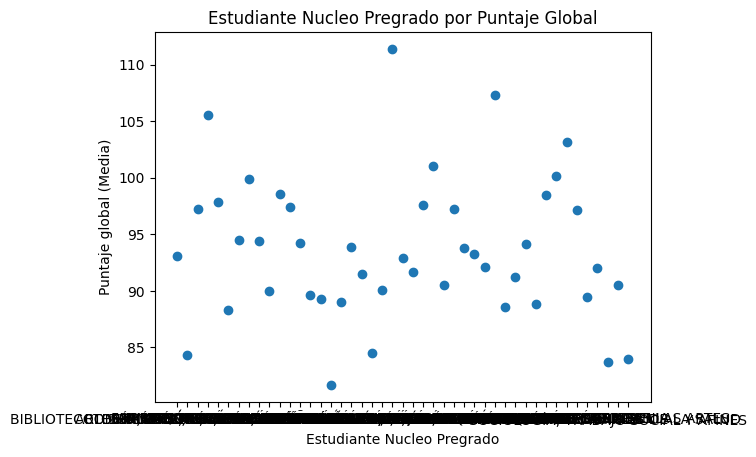

In [216]:
mean_scores = df.groupby('ESTU_NUCLEO_PREGRADO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Nucleo Pregrado')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Nucleo Pregrado por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_NUCLEO_PREGRADO', ylabel='PUNT_GLOBAL'>

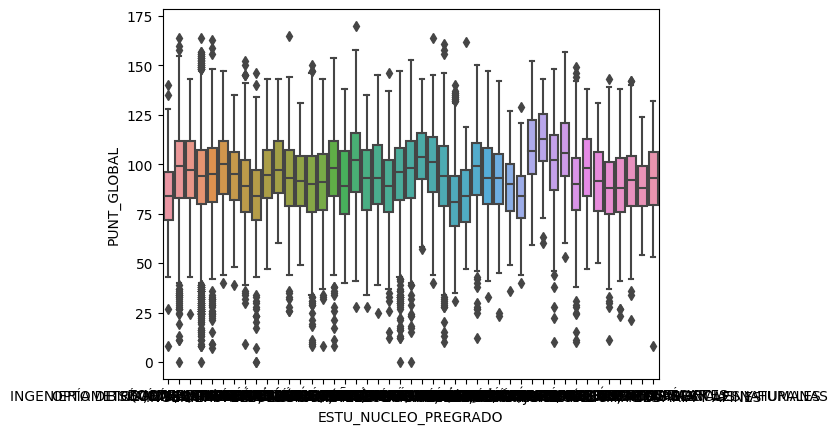

In [217]:
sns.boxplot(x="ESTU_NUCLEO_PREGRADO", y="PUNT_GLOBAL", data=df)

### Histogram

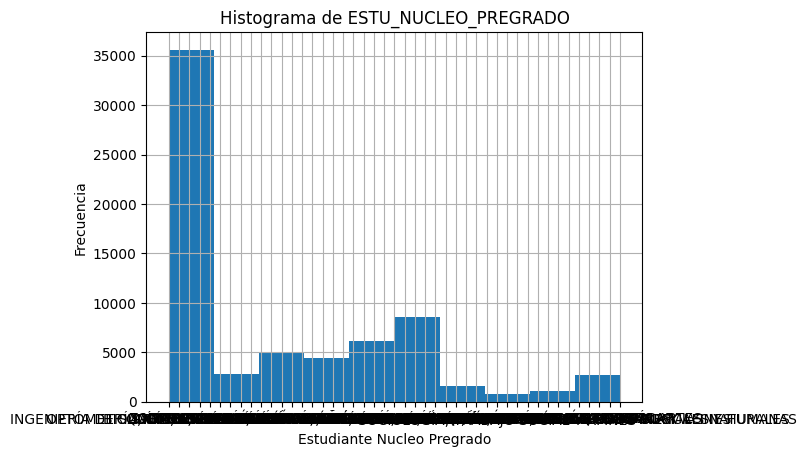

In [218]:
df["ESTU_NUCLEO_PREGRADO"].hist()

plt.title("Histograma de ESTU_NUCLEO_PREGRADO")
plt.xlabel("Estudiante Nucleo Pregrado")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_NUCLEO_PREGRADO porque es relevante para el analisis

In [54]:
grouped = df[['ESTU_NUCLEO_PREGRADO','PUNT_GLOBAL']].groupby("ESTU_NUCLEO_PREGRADO").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_NUCLEO_PREGRADO'].fillna(middle_category, inplace=True)

estu_nucleo_pregrado_counts = df['ESTU_NUCLEO_PREGRADO'].value_counts()

estu_nucleo_pregrado = estu_nucleo_pregrado_counts[estu_nucleo_pregrado_counts < 30].index.tolist()

df.loc[df['ESTU_NUCLEO_PREGRADO'].isin(estu_nucleo_pregrado), 'ESTU_NUCLEO_PREGRADO'] = "OTROS"

In [55]:
df[['ESTU_NUCLEO_PREGRADO','PUNT_GLOBAL']].groupby("ESTU_NUCLEO_PREGRADO").agg(["count", "mean"])

PUNT_GLOBAL            
                                                         count        mean
ESTU_NUCLEO_PREGRADO                                                      
ADMINISTRACIÓN                                           23765   93.120050
AGRONOMÍA                                                 1247   84.338412
ARQUITECTURA                                               863   97.235226
ARTES PLÁSTICAS, VISUALES Y AFINES                         156  105.538462
ARTES REPRESENTATIVAS                                       89   97.820225
BIBLIOTECOLOGÍA, OTROS DE CIENCIAS SOCIALES Y H...        1529   88.275343
BIOLOGÍA, MICROBIOLOGÍA Y AFINES                           195   94.476923
COMUNICACIÓN SOCIAL, PERIODISMO Y AFINES                   460   99.889130
CONTADURÍA PUBLICA                                        5044   94.380056
DEPORTES, EDUCACIÓN FÍSICA Y RECREACIÓN                    158   89.981013
DERECHO Y AFINES                                           176   98.522727
DISEÑO                                                    1870   97.381283
ECONOMÍA                                                  4010   94.235661
EDUCACIÓN                                                  823   89.658566
ENFERMERÍA                                                  33   89.303030
FORMACIÓN RELACIONADA CON EL CAMPO MILITAR O PO...        2909   81.676177
GEOLOGÍA, OTROS PROGRAMAS DE CIENCIAS NATURALES            535   88.968224
INGENIERÍA AGROINDUSTRIAL, ALIMENTOS Y AFINES              264   93.833333
INGENIERÍA AGRONÓMICA, PECUARIA Y AFINES                    36   91.444444
INGENIERÍA AGRÍCOLA, FORESTAL Y AFINES                      73   84.465753
INGENIERÍA AMBIENTAL, SANITARIA Y AFINES                  3026   90.062128
INGENIERÍA BIOMÉDICA Y AFINES                               63  111.396825
INGENIERÍA CIVIL Y AFINES                                 1639   92.925564
INGENIERÍA DE MINAS, METALURGIA Y AFINES                   241   91.659751
INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES               7147   97.605569
INGENIERÍA ELECTRÓNICA, TELECOMUNICACIONES Y AF...        1079  101.015755
INGENIERÍA ELÉCTRICA Y AFINES                             1290   90.484496
INGENIERÍA INDUSTRIAL Y AFINES                            2485   97.245070
INGENIERÍA MECÁNICA Y AFINES                              2686   93.775130
INGENIERÍA QUÍMICA Y AFINES                                308   93.220779
MEDICINA                                                   333   92.123123
MÚSICA                                                      48  107.333333
NORMALES SUPERIORES                                         46   88.608696
ODONTOLOGÍA                                                144   91.243056
OPTOMETRÍA, OTROS PROGRAMAS DE CIENCIAS DE LA S...         138   94.181159
OTRAS INGENIERÍAS                                          601   88.860233
OTROS                                                       46   98.478261
OTROS PROGRAMAS ASOCIADOS A BELLAS ARTES                   508  100.135827
PUBLICIDAD Y AFINES                                         56  103.178571
QUÍMICA Y AFINES                                           377   97.129973
SALUD PUBLICA                                             1153   89.454467
SIN CLASIFICAR                                              98   92.010204
SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES                        141   83.737589
TERAPIAS                                                   539   90.489796
ZOOTECNIA                                                  298   83.929530

- - -
## Variable: ESTU_INST_CODMUNICIPIO
- - -

In [35]:
df[['ESTU_INST_CODMUNICIPIO','PUNT_GLOBAL']].groupby("ESTU_INST_CODMUNICIPIO").agg(["count", "mean"])

PUNT_GLOBAL            
                             count        mean
ESTU_INST_CODMUNICIPIO                        
5001                          2313  100.065283
5042                            11   90.363636
5045                            33   95.272727
5088                            47   94.914894
5266                            83  103.710843
5615                             3  117.333333
5686                            21  100.523810
8001                           999   92.965966
8758                           393   98.511450
11001                        56978   92.797483
13001                         1092   92.936813
15001                          416   93.112981
17001                          200   98.925000
17541                           15   96.466667
18001                           11   83.818182
19001                          131   93.549618
23001                           33   89.303030
25290                           10  106.800000
25307                           11  103.818182
25430                           22   84.181818
25488                          619   84.646204
27787                            3   85.000000
41001                          109   90.798165
44001                           24   83.750000
44650                           38   88.842105
47001                           62   87.306452
47189                           45   79.866667
50001                            9  101.888889
52001                          150   94.793333
52399                           30   87.500000
54001                          161   94.223602
54498                            8   91.875000
54518                           91   89.362637
63001                          124   99.879032
66001                          390  102.712821
66682                            2   91.500000
68001                         1246   97.573836
68081                           32   91.031250
68679                            7   89.571429
70001                           22   99.818182
70820                           52   85.576923
73001                          216   94.087963
73268                          524   85.402672
76001                         1479   96.688979
76109                           24   82.041667
76111                           43   85.790698
76147                           49   92.816327
76520                            3  115.333333
76622                          225   90.217778
85001                           27  103.074074
86001                           89   92.561798

### Scatter Plot

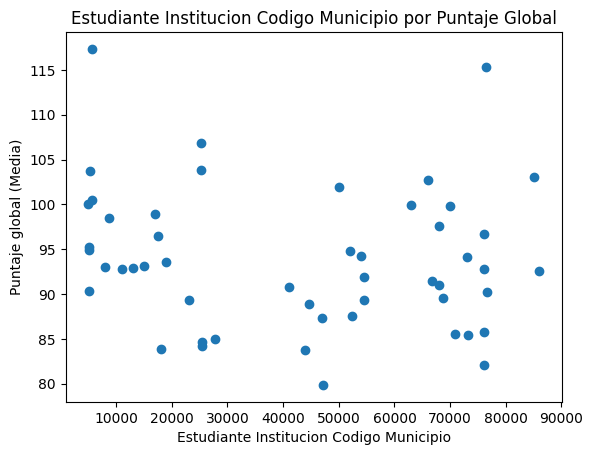

In [219]:
mean_scores = df.groupby('ESTU_INST_CODMUNICIPIO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Institucion Codigo Municipio')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Institucion Codigo Municipio por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_INST_CODMUNICIPIO', ylabel='PUNT_GLOBAL'>

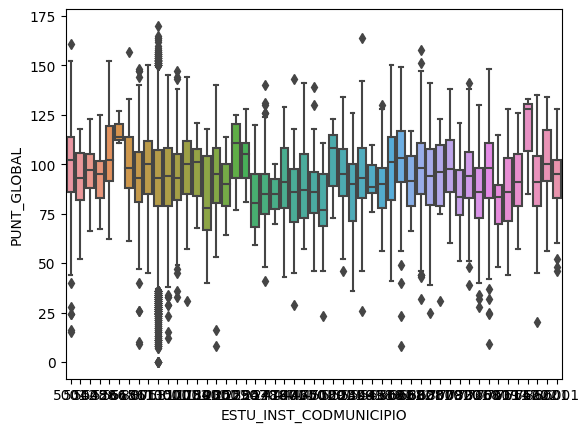

In [220]:
sns.boxplot(x="ESTU_INST_CODMUNICIPIO", y="PUNT_GLOBAL", data=df)

### Histogram

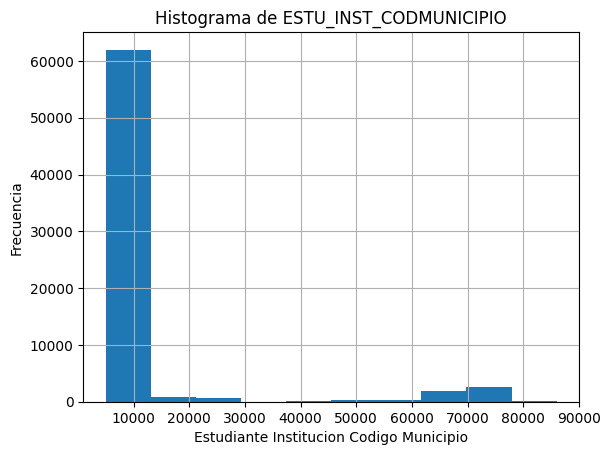

In [221]:
df["ESTU_INST_CODMUNICIPIO"].hist()

plt.title("Histograma de ESTU_INST_CODMUNICIPIO")
plt.xlabel("Estudiante Institucion Codigo Municipio")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_INST_CODMUNICIPIO porque no es relevante para el analisis

- - -
## Variable: ESTU_INST_MUNICIPIO
- - -

In [36]:
df[['ESTU_INST_MUNICIPIO','PUNT_GLOBAL']].groupby("ESTU_INST_MUNICIPIO").agg(["count", "mean"])

PUNT_GLOBAL            
                            count        mean
ESTU_INST_MUNICIPIO                          
APARTADÓ                       33   95.272727
ARMENIA                       124   99.879032
BARRANCABERMEJA                32   91.031250
BARRANQUILLA                  999   92.965966
BELLO                          47   94.914894
BOGOTÁ D.C.                 56978   92.797483
BUCARAMANGA                  1246   97.573836
BUENAVENTURA                   24   82.041667
CALI                         1479   96.688979
CARTAGENA DE INDIAS          1092   92.936813
CARTAGO                        49   92.816327
CIÉNAGA                        45   79.866667
CÚCUTA                        161   94.223602
ENVIGADO                       83  103.710843
ESPINAL                       524   85.402672
FLORENCIA                      11   83.818182
FUSAGASUGÁ                     10  106.800000
GIRARDOT                       11  103.818182
GUADALAJARA DE BUGA            43   85.790698
IBAGUÉ                        216   94.087963
LA UNIÓN                       30   87.500000
MADRID                         22   84.181818
MANIZALES                     200   98.925000
MEDELLÍN                     2313  100.065283
MOCOA                          89   92.561798
MONTERÍA                       33   89.303030
NEIVA                         109   90.798165
NILO                          619   84.646204
OCAÑA                           8   91.875000
PALMIRA                         3  115.333333
PAMPLONA                       91   89.362637
PASTO                         150   94.793333
PENSILVANIA                    15   96.466667
PEREIRA                       390  102.712821
POPAYÁN                       131   93.549618
RIOHACHA                       24   83.750000
RIONEGRO                        3  117.333333
ROLDANILLO                    225   90.217778
SAN GIL                         7   89.571429
SAN JUAN DEL CESAR             38   88.842105
SANTA FÉ DE ANTIOQUIA          11   90.363636
SANTA MARTA                    62   87.306452
SANTA ROSA DE CABAL             2   91.500000
SANTA ROSA DE OSOS             21  100.523810
SANTIAGO DE TOLÚ               52   85.576923
SINCELEJO                      22   99.818182
SOLEDAD                       393   98.511450
TADÓ                            3   85.000000
TUNJA                         416   93.112981
VILLAVICENCIO                   9  101.888889
YOPAL                          27  103.074074

### Scatter Plot

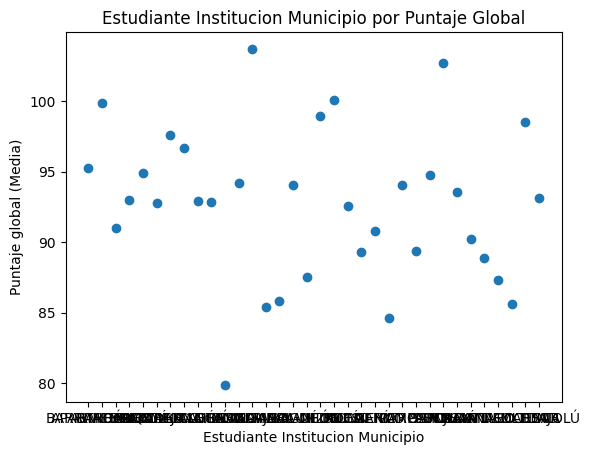

In [222]:
mean_scores = df.groupby('ESTU_INST_MUNICIPIO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Institucion Municipio')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Institucion Municipio por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_INST_MUNICIPIO', ylabel='PUNT_GLOBAL'>

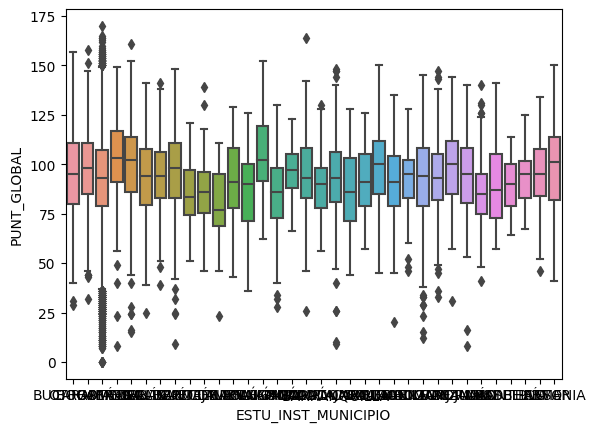

In [223]:
sns.boxplot(x="ESTU_INST_MUNICIPIO", y="PUNT_GLOBAL", data=df)

### Histogram

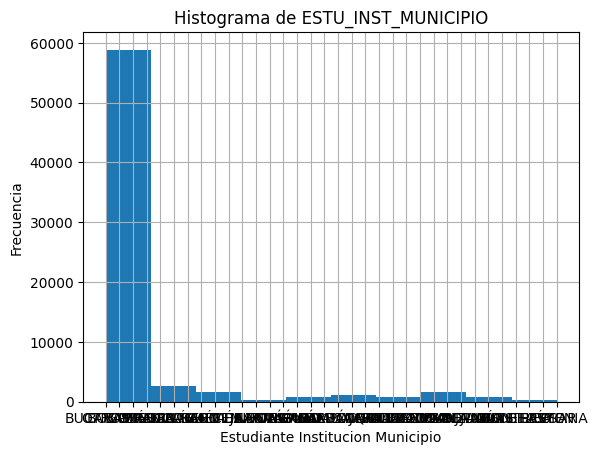

In [224]:
df["ESTU_INST_MUNICIPIO"].hist()

plt.title("Histograma de ESTU_INST_MUNICIPIO")
plt.xlabel("Estudiante Institucion Municipio")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_INST_MUNICIPIO porque es relevante para el analisis

In [56]:
grouped = df[['ESTU_INST_MUNICIPIO','PUNT_GLOBAL']].groupby("ESTU_INST_MUNICIPIO").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_INST_MUNICIPIO'].fillna(middle_category, inplace=True)

estu_inst_municipio_counts = df['ESTU_INST_MUNICIPIO'].value_counts()

estu_inst_municipio = estu_inst_municipio_counts[estu_inst_municipio_counts < 30].index.tolist()

df.loc[df['ESTU_INST_MUNICIPIO'].isin(estu_inst_municipio), 'ESTU_INST_MUNICIPIO'] = "OTROS"

In [57]:
df[['ESTU_INST_MUNICIPIO','PUNT_GLOBAL']].groupby("ESTU_INST_MUNICIPIO").agg(["count", "mean"])

PUNT_GLOBAL            
                          count        mean
ESTU_INST_MUNICIPIO                        
APARTADÓ                     33   95.272727
ARMENIA                     124   99.879032
BARRANCABERMEJA              32   91.031250
BARRANQUILLA                999   92.965966
BELLO                        47   94.914894
BOGOTÁ D.C.               56978   92.797483
BUCARAMANGA                1246   97.573836
CALI                       1479   96.688979
CARTAGENA DE INDIAS        1092   92.936813
CARTAGO                      49   92.816327
CIÉNAGA                      45   79.866667
CÚCUTA                      161   94.223602
ENVIGADO                     83  103.710843
ESPINAL                     524   85.402672
GUADALAJARA DE BUGA          43   85.790698
IBAGUÉ                      216   94.087963
LA UNIÓN                     30   87.500000
MANIZALES                   200   98.925000
MEDELLÍN                   2313  100.065283
MOCOA                        89   92.561798
MONTERÍA                     33   89.303030
NEIVA                       109   90.798165
NILO                        619   84.646204
OTROS                       233   94.030043
PAMPLONA                     91   89.362637
PASTO                       150   94.793333
PEREIRA                     390  102.712821
POPAYÁN                     131   93.549618
ROLDANILLO                  225   90.217778
SAN JUAN DEL CESAR           38   88.842105
SANTA MARTA                  62   87.306452
SANTIAGO DE TOLÚ             52   85.576923
SOLEDAD                     393   98.511450
TUNJA                       416   93.112981

- - -
## Variable: ESTU_INST_DEPARTAMENTO
- - -

In [39]:
df[['ESTU_INST_DEPARTAMENTO','PUNT_GLOBAL']].groupby("ESTU_INST_DEPARTAMENTO").agg(["count", "mean"])

PUNT_GLOBAL            
                             count        mean
ESTU_INST_DEPARTAMENTO                        
ANTIOQUIA                     2511  100.008363
ATLANTICO                     1392   94.531609
BOGOTÁ                       56978   92.797483
BOLIVAR                       1092   92.936813
BOYACA                         416   93.112981
CALDAS                         215   98.753488
CAQUETA                         11   83.818182
CASANARE                        27  103.074074
CAUCA                          131   93.549618
CHOCO                            3   85.000000
CORDOBA                         33   89.303030
CUNDINAMARCA                   662   85.283988
HUILA                          109   90.798165
LA GUAJIRA                      62   86.870968
MAGDALENA                      107   84.177570
META                             9  101.888889
NARIÑO                         180   93.577778
NORTE SANTANDER                260   92.450000
PUTUMAYO                        89   92.561798
QUINDIO                        124   99.879032
RISARALDA                      392  102.655612
SANTANDER                     1285   97.367315
SUCRE                           74   89.810811
TOLIMA                         740   87.937838
VALLE                         1823   95.366978

### Scatter Plot

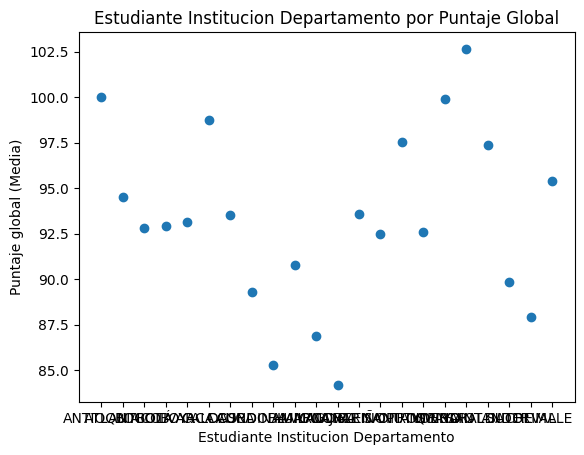

In [225]:
mean_scores = df.groupby('ESTU_INST_DEPARTAMENTO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Institucion Departamento')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Institucion Departamento por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_INST_DEPARTAMENTO', ylabel='PUNT_GLOBAL'>

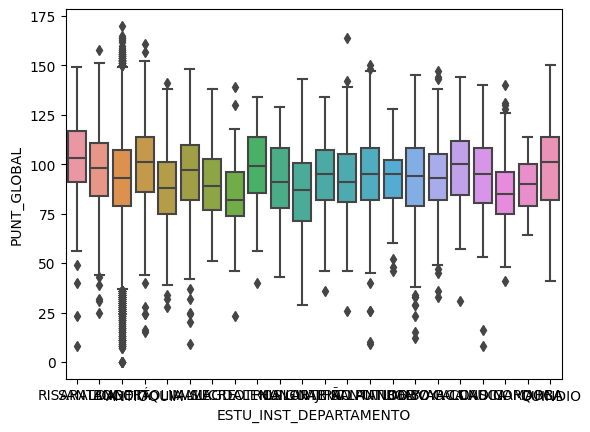

In [226]:
sns.boxplot(x="ESTU_INST_DEPARTAMENTO", y="PUNT_GLOBAL", data=df)

### Histogram

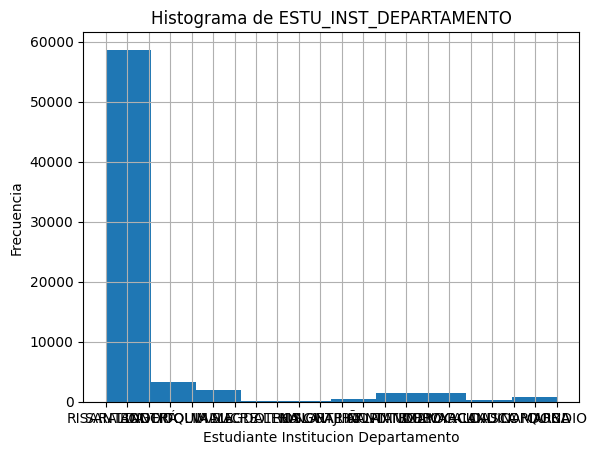

In [227]:
df["ESTU_INST_DEPARTAMENTO"].hist()

plt.title("Histograma de ESTU_INST_DEPARTAMENTO")
plt.xlabel("Estudiante Institucion Departamento")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_PRGM_DEPARTAMENTO porque es relevante para el analisis

In [58]:
grouped = df[['ESTU_INST_DEPARTAMENTO','PUNT_GLOBAL']].groupby("ESTU_INST_DEPARTAMENTO").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_INST_DEPARTAMENTO'].fillna(middle_category, inplace=True)

estu_inst_departamento_counts = df['ESTU_INST_DEPARTAMENTO'].value_counts()

estu_inst_departamento = estu_inst_departamento_counts[estu_inst_departamento_counts < 30].index.tolist()

df.loc[df['ESTU_INST_DEPARTAMENTO'].isin(estu_inst_departamento), 'ESTU_INST_DEPARTAMENTO'] = "OTROS"

In [59]:
df[['ESTU_INST_DEPARTAMENTO','PUNT_GLOBAL']].groupby("ESTU_INST_DEPARTAMENTO").agg(["count", "mean"])

PUNT_GLOBAL            
                             count        mean
ESTU_INST_DEPARTAMENTO                        
ANTIOQUIA                     2511  100.008363
ATLANTICO                     1392   94.531609
BOGOTÁ                       56978   92.797483
BOLIVAR                       1092   92.936813
BOYACA                         416   93.112981
CALDAS                         215   98.753488
CAUCA                          131   93.549618
CORDOBA                         33   89.303030
CUNDINAMARCA                   662   85.283988
HUILA                          109   90.798165
LA GUAJIRA                      62   86.870968
MAGDALENA                      107   84.177570
NARIÑO                         180   93.577778
NORTE SANTANDER                260   92.450000
OTROS                           50   97.540000
PUTUMAYO                        89   92.561798
QUINDIO                        124   99.879032
RISARALDA                      392  102.655612
SANTANDER                     1285   97.367315
SUCRE                           74   89.810811
TOLIMA                         740   87.937838
VALLE                         1823   95.366978

- - -
## Variable: INST_CARACTER_ACADEMICO
- - -

In [37]:
df[['INST_CARACTER_ACADEMICO','PUNT_GLOBAL']].groupby("INST_CARACTER_ACADEMICO").agg(["count", "mean"])

PUNT_GLOBAL           
                                count       mean
INST_CARACTER_ACADEMICO                         
ESCUELA NORMAL SUPERIOR            46  88.608696
INSTITUCIÓN TECNOLÓGICA         49340  92.085002
INSTITUCIÓN UNIVERSITARIA        9069  94.641967
TÉCNICA PROFESIONAL              5379  94.897379
UNIVERSIDAD                      4891  99.883459

### Scatter Plot

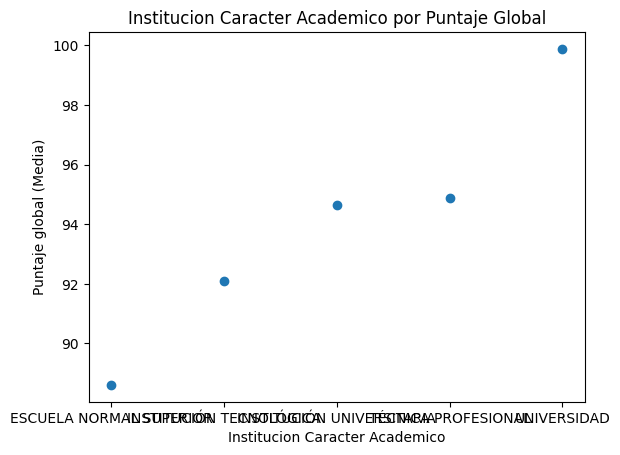

In [228]:
mean_scores = df.groupby('INST_CARACTER_ACADEMICO')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Institucion Caracter Academico')
plt.ylabel('Puntaje global (Media)')
plt.title('Institucion Caracter Academico por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='INST_CARACTER_ACADEMICO', ylabel='PUNT_GLOBAL'>

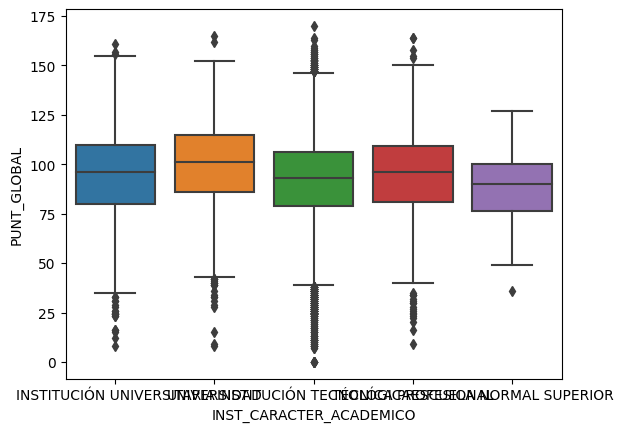

In [229]:
sns.boxplot(x="INST_CARACTER_ACADEMICO", y="PUNT_GLOBAL", data=df)

### Histogram

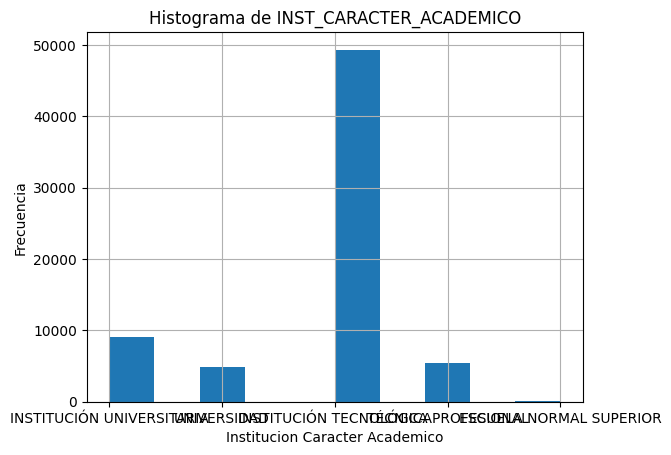

In [230]:
df["INST_CARACTER_ACADEMICO"].hist()

plt.title("Histograma de INST_CARACTER_ACADEMICO")
plt.xlabel("Institucion Caracter Academico")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta INST_CARACTER_ACADEMICO porque es relevante para el analisis

In [60]:
grouped = df[['INST_CARACTER_ACADEMICO','PUNT_GLOBAL']].groupby("INST_CARACTER_ACADEMICO").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['INST_CARACTER_ACADEMICO'].fillna(middle_category, inplace=True)

In [61]:
df[['INST_CARACTER_ACADEMICO','PUNT_GLOBAL']].groupby("INST_CARACTER_ACADEMICO").agg(["count", "mean"])

PUNT_GLOBAL           
                                count       mean
INST_CARACTER_ACADEMICO                         
ESCUELA NORMAL SUPERIOR            46  88.608696
INSTITUCIÓN TECNOLÓGICA         49340  92.085002
INSTITUCIÓN UNIVERSITARIA        9069  94.641967
TÉCNICA PROFESIONAL              5379  94.897379
UNIVERSIDAD                      4891  99.883459

- - -
## Variable: INST_ORIGEN
- - -

In [39]:
df[['INST_ORIGEN','PUNT_GLOBAL']].groupby("INST_ORIGEN").agg(["count", "mean"])

PUNT_GLOBAL            
                               count        mean
INST_ORIGEN                                     
NO OFICIAL - CORPORACIÓN        6419   97.570805
NO OFICIAL - FUNDACIÓN          6216   98.345721
OFICIAL DEPARTAMENTAL           2507   98.921021
OFICIAL MUNICIPAL               1157  107.037165
OFICIAL NACIONAL               51598   91.541571
REGIMEN ESPECIAL                 828   86.978261

### Scatter Plot

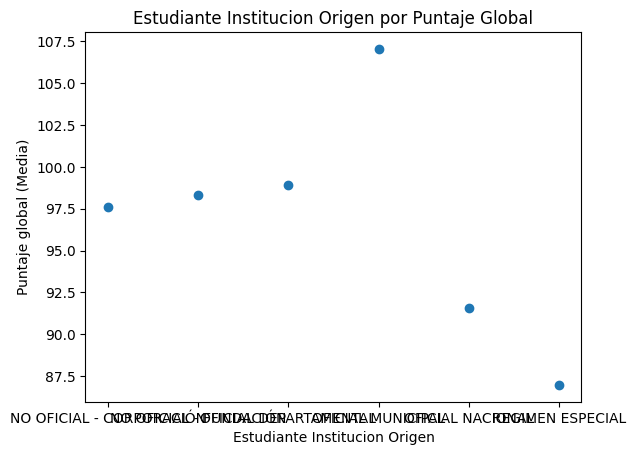

In [231]:
mean_scores = df.groupby('INST_ORIGEN')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Institucion Origen')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Institucion Origen por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='INST_ORIGEN', ylabel='PUNT_GLOBAL'>

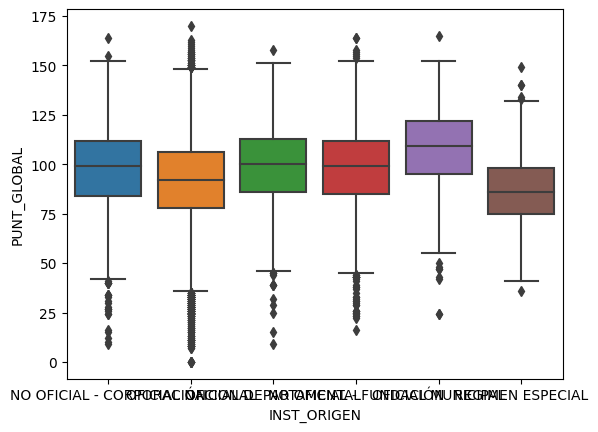

In [232]:
sns.boxplot(x="INST_ORIGEN", y="PUNT_GLOBAL", data=df)

### Histogram

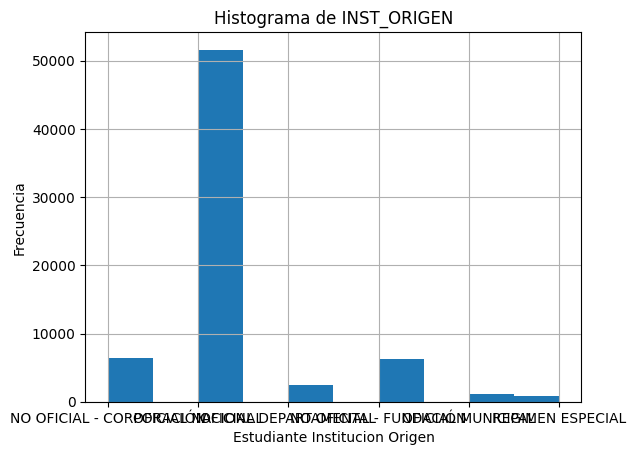

In [233]:
df["INST_ORIGEN"].hist()

plt.title("Histograma de INST_ORIGEN")
plt.xlabel("Estudiante Institucion Origen")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta INST_ORIGEN porque es relevante para el analisis

In [62]:
grouped = df[['INST_ORIGEN','PUNT_GLOBAL']].groupby("INST_ORIGEN").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['INST_ORIGEN'].fillna(middle_category, inplace=True)

In [63]:
df[['INST_ORIGEN','PUNT_GLOBAL']].groupby("INST_ORIGEN").agg(["count", "mean"])

PUNT_GLOBAL            
                               count        mean
INST_ORIGEN                                     
NO OFICIAL - CORPORACIÓN        6419   97.570805
NO OFICIAL - FUNDACIÓN          6216   98.345721
OFICIAL DEPARTAMENTAL           2507   98.921021
OFICIAL MUNICIPAL               1157  107.037165
OFICIAL NACIONAL               51598   91.541571
REGIMEN ESPECIAL                 828   86.978261

- - -
## Variable: ESTU_PRIVADO_LIBERTAD
- - -

In [44]:
df[['ESTU_PRIVADO_LIBERTAD','PUNT_GLOBAL']].groupby("ESTU_PRIVADO_LIBERTAD").agg(["count", "mean"])

PUNT_GLOBAL           
                            count       mean
ESTU_PRIVADO_LIBERTAD                       
N                           68725  93.195213

### Scatter Plot

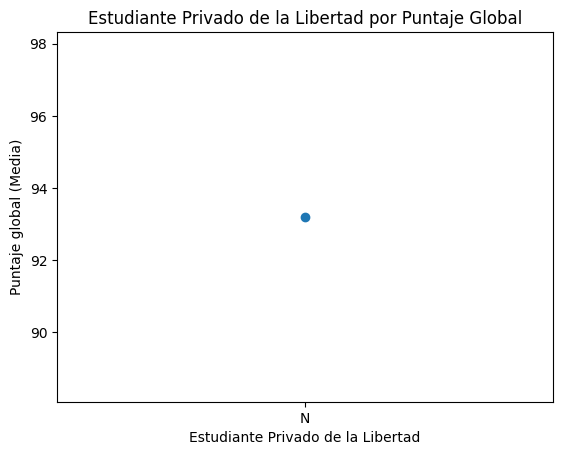

In [234]:
mean_scores = df.groupby('ESTU_PRIVADO_LIBERTAD')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Privado de la Libertad')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Privado de la Libertad por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_PRIVADO_LIBERTAD', ylabel='PUNT_GLOBAL'>

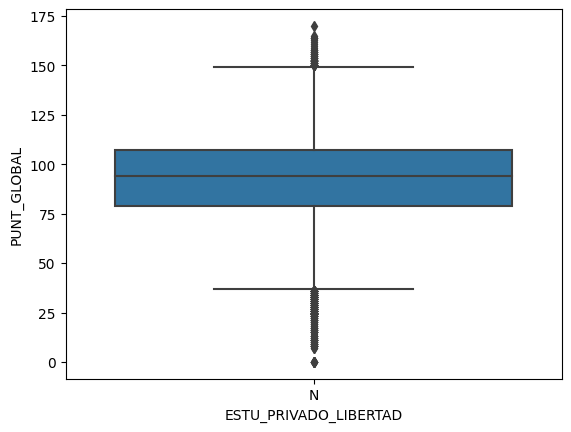

In [235]:
sns.boxplot(x="ESTU_PRIVADO_LIBERTAD", y="PUNT_GLOBAL", data=df)

### Histogram

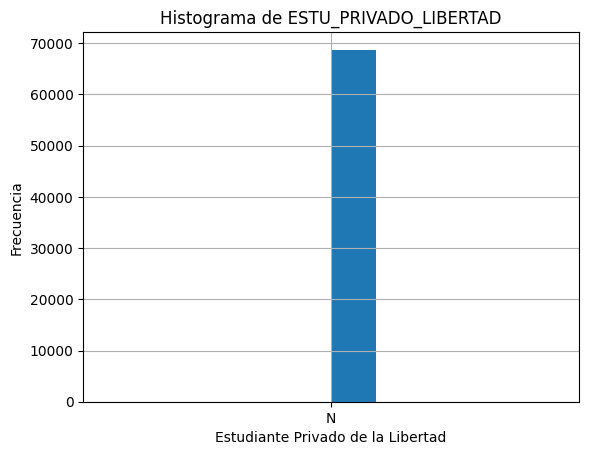

In [236]:
df["ESTU_PRIVADO_LIBERTAD"].hist()

plt.title("Histograma de ESTU_PRIVADO_LIBERTAD")
plt.xlabel("Estudiante Privado de la Libertad")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_PRIVADO_LIBERTAD porque no es relevante para el analisis debido a que tiene una sola categoria

- - -
## Variable: ESTU_COD_MCPIO_PRESENTACION
- - -

In [45]:
df[['ESTU_COD_MCPIO_PRESENTACION','PUNT_GLOBAL']].groupby("ESTU_COD_MCPIO_PRESENTACION").agg(["count", "mean"])

PUNT_GLOBAL           
                                  count       mean
ESTU_COD_MCPIO_PRESENTACION                       
8001                                175  88.017143
11001                             67962  93.283600
25488                               588  84.520408

### Scatter Plot

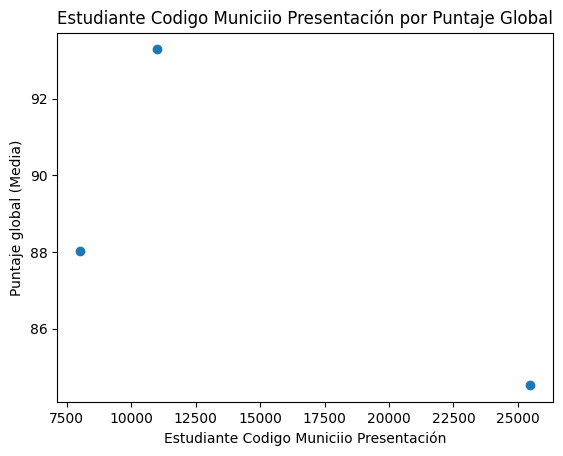

In [237]:
mean_scores = df.groupby('ESTU_COD_MCPIO_PRESENTACION')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Codigo Municiio Presentación')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Codigo Municiio Presentación por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_COD_MCPIO_PRESENTACION', ylabel='PUNT_GLOBAL'>

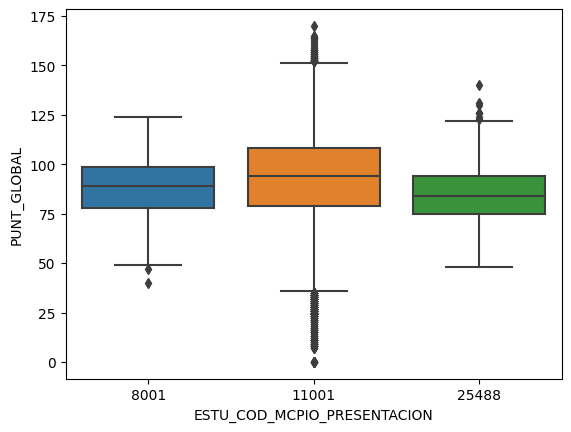

In [238]:
sns.boxplot(x="ESTU_COD_MCPIO_PRESENTACION", y="PUNT_GLOBAL", data=df)

### Histogram

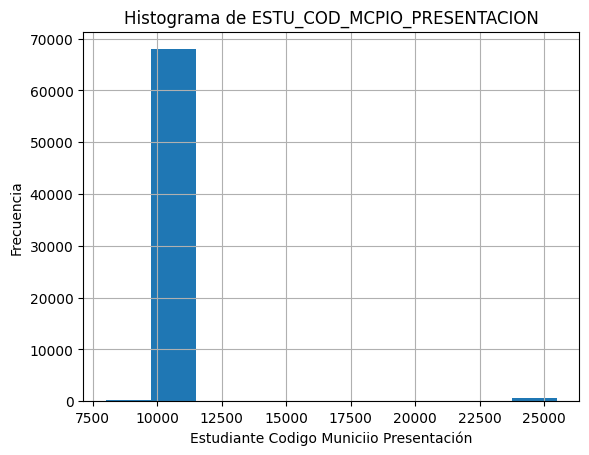

In [239]:
df["ESTU_COD_MCPIO_PRESENTACION"].hist()

plt.title("Histograma de ESTU_COD_MCPIO_PRESENTACION")
plt.xlabel("Estudiante Codigo Municiio Presentación")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_COD_MCPIO_PRESENTACION porque no es relevante para el analisis

- - -
## Variable: ESTU_MCPIO_PRESENTACION
- - -

In [41]:
df[['ESTU_MCPIO_PRESENTACION','PUNT_GLOBAL']].groupby("ESTU_MCPIO_PRESENTACION").agg(["count", "mean"])

PUNT_GLOBAL           
                              count       mean
ESTU_MCPIO_PRESENTACION                       
BARRANQUILLA                    175  88.017143
BOGOTÁ D.C.                   67962  93.283600
NILO                            588  84.520408

### Scatter Plot

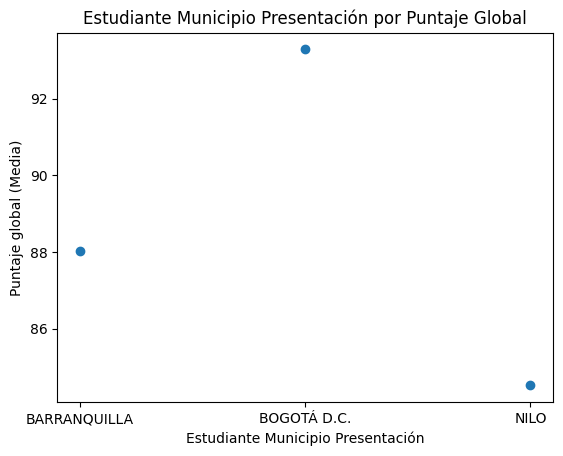

In [240]:
mean_scores = df.groupby('ESTU_MCPIO_PRESENTACION')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Municipio Presentación')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Municipio Presentación por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_MCPIO_PRESENTACION', ylabel='PUNT_GLOBAL'>

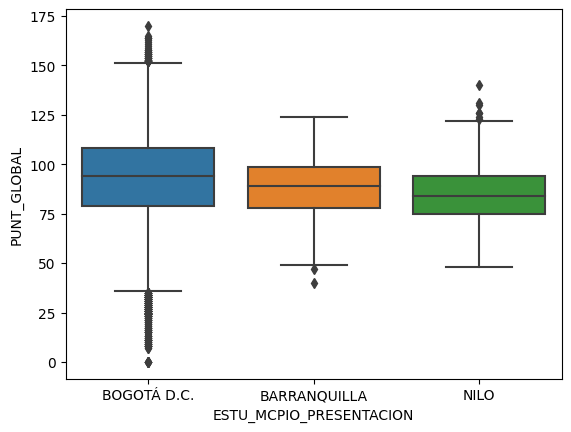

In [241]:
sns.boxplot(x="ESTU_MCPIO_PRESENTACION", y="PUNT_GLOBAL", data=df)

### Histogram

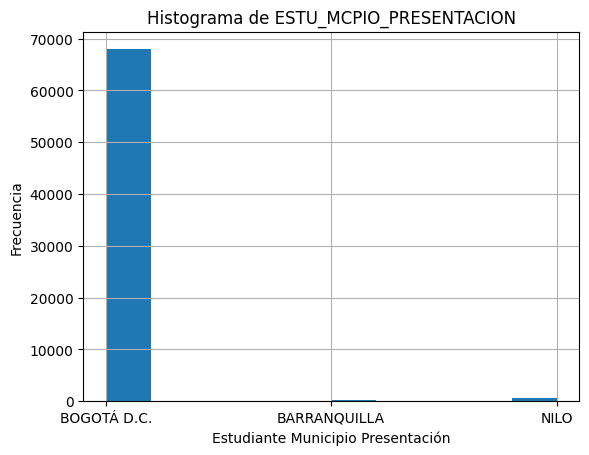

In [242]:
df["ESTU_MCPIO_PRESENTACION"].hist()

plt.title("Histograma de ESTU_MCPIO_PRESENTACION")
plt.xlabel("Estudiante Municipio Presentación")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_MCPIO_PRESENTACION porque es relevante para el analisis

In [64]:
grouped = df[['ESTU_MCPIO_PRESENTACION','PUNT_GLOBAL']].groupby("ESTU_MCPIO_PRESENTACION").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_MCPIO_PRESENTACION'].fillna(middle_category, inplace=True)

In [65]:
df[['ESTU_MCPIO_PRESENTACION','PUNT_GLOBAL']].groupby("ESTU_MCPIO_PRESENTACION").agg(["count", "mean"])

PUNT_GLOBAL           
                              count       mean
ESTU_MCPIO_PRESENTACION                       
BARRANQUILLA                    175  88.017143
BOGOTÁ D.C.                   67962  93.283600
NILO                            588  84.520408

- - -
## Variable: ESTU_DEPTO_PRESENTACION
- - -

In [43]:
df[['ESTU_DEPTO_PRESENTACION','PUNT_GLOBAL']].groupby("ESTU_DEPTO_PRESENTACION").agg(["count", "mean"])

PUNT_GLOBAL           
                              count       mean
ESTU_DEPTO_PRESENTACION                       
ATLANTICO                       175  88.017143
BOGOTÁ                        67962  93.283600
CUNDINAMARCA                    588  84.520408

### Scatter Plot

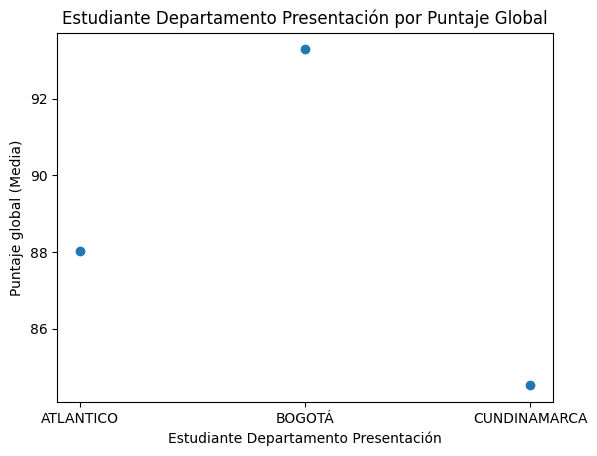

In [243]:
mean_scores = df.groupby('ESTU_DEPTO_PRESENTACION')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Departamento Presentación')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Departamento Presentación por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_DEPTO_PRESENTACION', ylabel='PUNT_GLOBAL'>

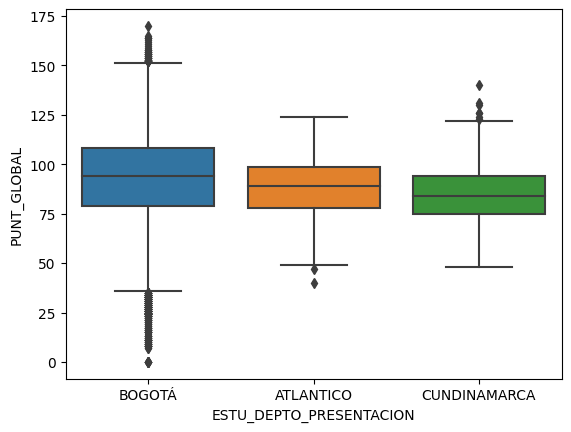

In [244]:
sns.boxplot(x="ESTU_DEPTO_PRESENTACION", y="PUNT_GLOBAL", data=df)

### Histogram

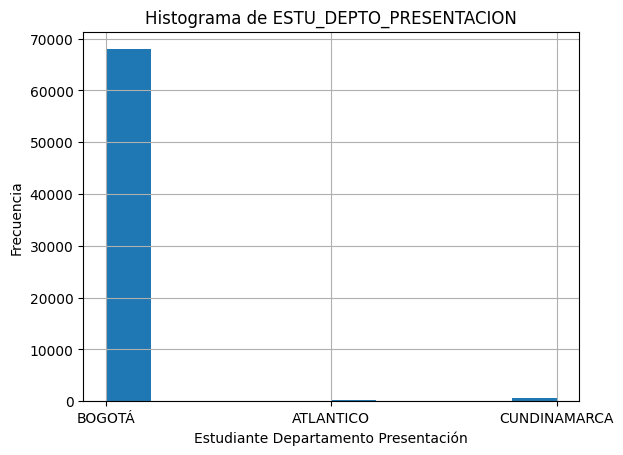

In [245]:
df["ESTU_DEPTO_PRESENTACION"].hist()

plt.title("Histograma de ESTU_DEPTO_PRESENTACION")
plt.xlabel("Estudiante Departamento Presentación")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_DEPTO_PRESENTACION porque es relevante para el analisis

In [66]:
grouped = df[['ESTU_DEPTO_PRESENTACION','PUNT_GLOBAL']].groupby("ESTU_DEPTO_PRESENTACION").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_DEPTO_PRESENTACION'].fillna(middle_category, inplace=True)

In [67]:
df[['ESTU_DEPTO_PRESENTACION','PUNT_GLOBAL']].groupby("ESTU_DEPTO_PRESENTACION").agg(["count", "mean"])

PUNT_GLOBAL           
                              count       mean
ESTU_DEPTO_PRESENTACION                       
ATLANTICO                       175  88.017143
BOGOTÁ                        67962  93.283600
CUNDINAMARCA                    588  84.520408

- - -
## Variable: ESTU_COD_DEPTO_PRESENTACION
- - -

In [48]:
df[['ESTU_COD_DEPTO_PRESENTACION','PUNT_GLOBAL']].groupby("ESTU_COD_DEPTO_PRESENTACION").agg(["count", "mean"])

PUNT_GLOBAL           
                                  count       mean
ESTU_COD_DEPTO_PRESENTACION                       
8                                   175  88.017143
11                                67962  93.283600
25                                  588  84.520408

### Scatter Plot

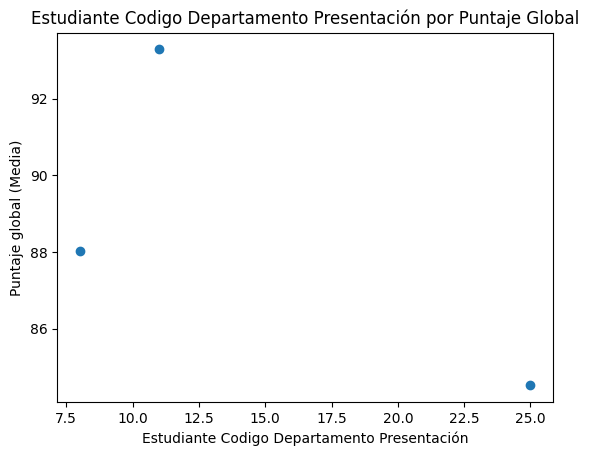

In [246]:
mean_scores = df.groupby('ESTU_COD_DEPTO_PRESENTACION')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Codigo Departamento Presentación')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Codigo Departamento Presentación por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_COD_DEPTO_PRESENTACION', ylabel='PUNT_GLOBAL'>

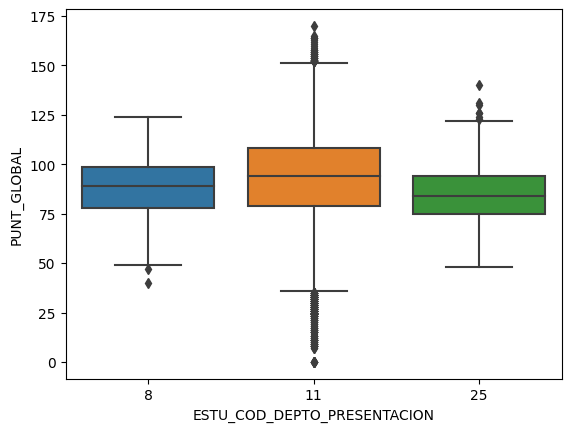

In [247]:
sns.boxplot(x="ESTU_COD_DEPTO_PRESENTACION", y="PUNT_GLOBAL", data=df)

### Histogram

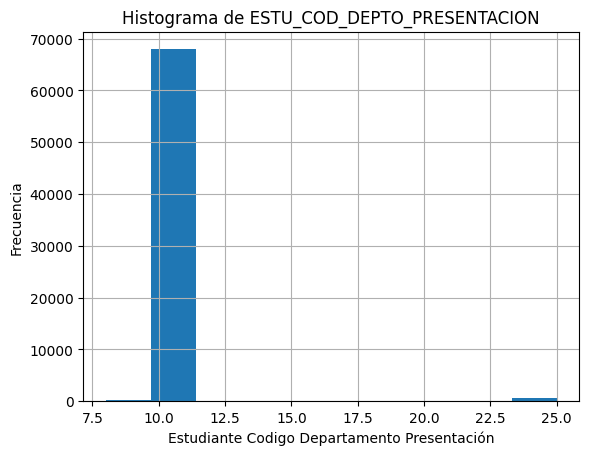

In [248]:
df["ESTU_COD_DEPTO_PRESENTACION"].hist()

plt.title("Histograma de ESTU_COD_DEPTO_PRESENTACION")
plt.xlabel("Estudiante Codigo Departamento Presentación")
plt.ylabel("Frecuencia")

plt.show()

### Descartado

Se descarta ESTU_COD_DEPTO_PRESENTACION porque no es relevante para el analisis

- - -
## Variables: MOD_RAZONA_CUANTITAT_PUNT, MOD_RAZONA_CUANTITATIVO_PNAL, MOD_RAZONA_CUANTITATIVO_PNBC, MOD_LECTURA_CRITICA_PUNT, MOD_LECTURA_CRITICA_PNAL, MOD_LECTURA_CRITICA_PNBC, MOD_COMPETEN_CIUDADA_PUNT, MOD_COMPETEN_CIUDADA_PNAL, MOD_COMPETEN_CIUDADA_PNBC, MOD_INGLES_PUNT, MOD_INGLES_DESEM, MOD_INGLES_PNAL, MOD_INGLES_PNBC, MOD_COMUNI_ESCRITA_PUNT, MOD_COMUNI_ESCRITA_DESEM, MOD_COMUNI_ESCRITA_PNAL, MOD_COMUNI_ESCRITA_PNBC,PERCENTIL_GLOBAL, PERCENTIL_NBC
- - -

### Descartados

Se descarta MOD_RAZONA_CUANTITAT_PUNT, MOD_RAZONA_CUANTITATIVO_PNAL, MOD_RAZONA_CUANTITATIVO_PNBC, MOD_LECTURA_CRITICA_PUNT, MOD_LECTURA_CRITICA_PNAL, MOD_LECTURA_CRITICA_PNBC, MOD_COMPETEN_CIUDADA_PUNT, MOD_COMPETEN_CIUDADA_PNAL, MOD_COMPETEN_CIUDADA_PNBC, MOD_INGLES_PUNT, MOD_INGLES_DESEM, MOD_INGLES_PNAL, MOD_INGLES_PNBC, MOD_COMUNI_ESCRITA_PUNT, MOD_COMUNI_ESCRITA_DESEM, MOD_COMUNI_ESCRITA_PNAL, MOD_COMUNI_ESCRITA_PNBC,PERCENTIL_GLOBAL, PERCENTIL_NBC, porque no son relevantes para el analisis

- - -
## Variable: PUNT_GLOBAL
- - -

### No se Descarta

No se descarta PUNT_GLOBAL debido a que es la variable objetivo, y se reemlazan los valores nulos por la mediana

In [68]:
middle_category = df.PUNT_GLOBAL.median()

df['PUNT_GLOBAL'].fillna(middle_category, inplace=True)

## Variable: ESTU_ESTADOINVESTIGACION

In [45]:
df[['ESTU_ESTADOINVESTIGACION','PUNT_GLOBAL']].groupby("ESTU_ESTADOINVESTIGACION").agg(["count", "mean"])

PUNT_GLOBAL           
                               count       mean
ESTU_ESTADOINVESTIGACION                       
PUBLICAR                       68350  93.222034
VALIDEZ OFICINA JURÍDICA         375  88.306667

### Scatter Plot

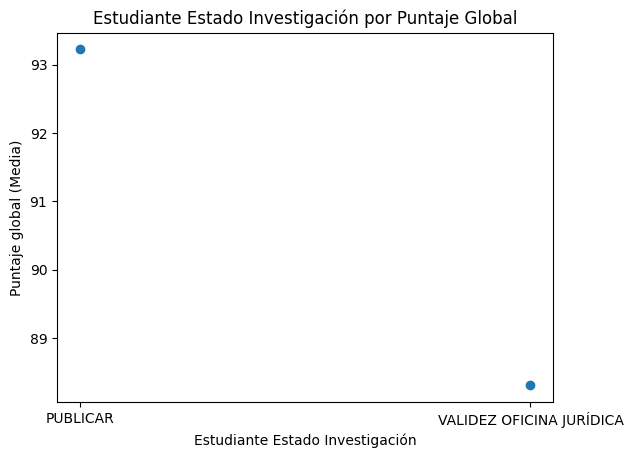

In [249]:
mean_scores = df.groupby('ESTU_ESTADOINVESTIGACION')['PUNT_GLOBAL'].mean()

plt.scatter(mean_scores.index, mean_scores.values)

plt.xlabel('Estudiante Estado Investigación')
plt.ylabel('Puntaje global (Media)')
plt.title('Estudiante Estado Investigación por Puntaje Global')

plt.show()

### Box Plot

<Axes: xlabel='ESTU_ESTADOINVESTIGACION', ylabel='PUNT_GLOBAL'>

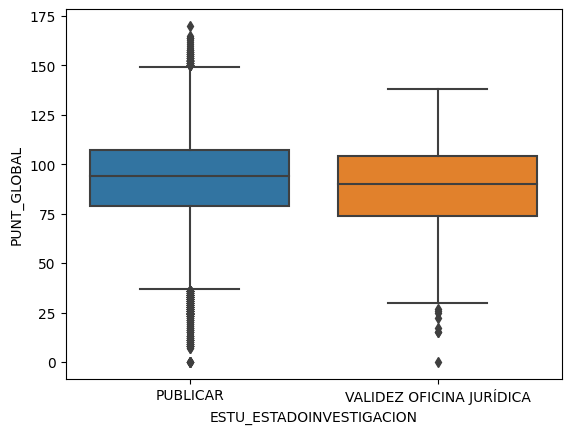

In [250]:
sns.boxplot(x="ESTU_ESTADOINVESTIGACION", y="PUNT_GLOBAL", data=df)

### Histogram

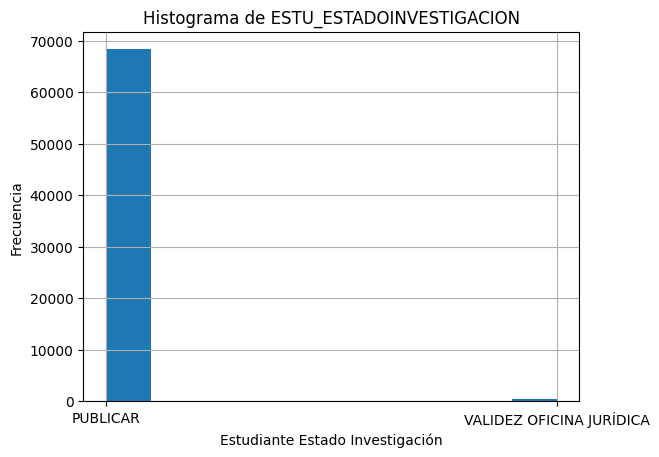

In [251]:
df["ESTU_ESTADOINVESTIGACION"].hist()

plt.title("Histograma de ESTU_ESTADOINVESTIGACION")
plt.xlabel("Estudiante Estado Investigación")
plt.ylabel("Frecuencia")

plt.show()

### No se Descarta

No se descarta ESTU_ESTADOINVESTIGACION debido a que es importante para el analisis

In [69]:
grouped = df[['ESTU_ESTADOINVESTIGACION','PUNT_GLOBAL']].groupby("ESTU_ESTADOINVESTIGACION").agg(["count", "mean"])

sorted_grouped = grouped.sort_values(("PUNT_GLOBAL", "count"))

middle_index = len(sorted_grouped) // 2
middle_category = sorted_grouped.iloc[middle_index].name

df['ESTU_ESTADOINVESTIGACION'].fillna(middle_category, inplace=True)

In [70]:
df[['ESTU_ESTADOINVESTIGACION','PUNT_GLOBAL']].groupby("ESTU_ESTADOINVESTIGACION").agg(["count", "mean"])

PUNT_GLOBAL           
                               count       mean
ESTU_ESTADOINVESTIGACION                       
PUBLICAR                       68350  93.222034
VALIDEZ OFICINA JURÍDICA         375  88.306667

- - -
# 3.1.4 Crear una correlación, que variables tienen un efecto positivo en el puntaje y cuales un efecto negativo.
- - -

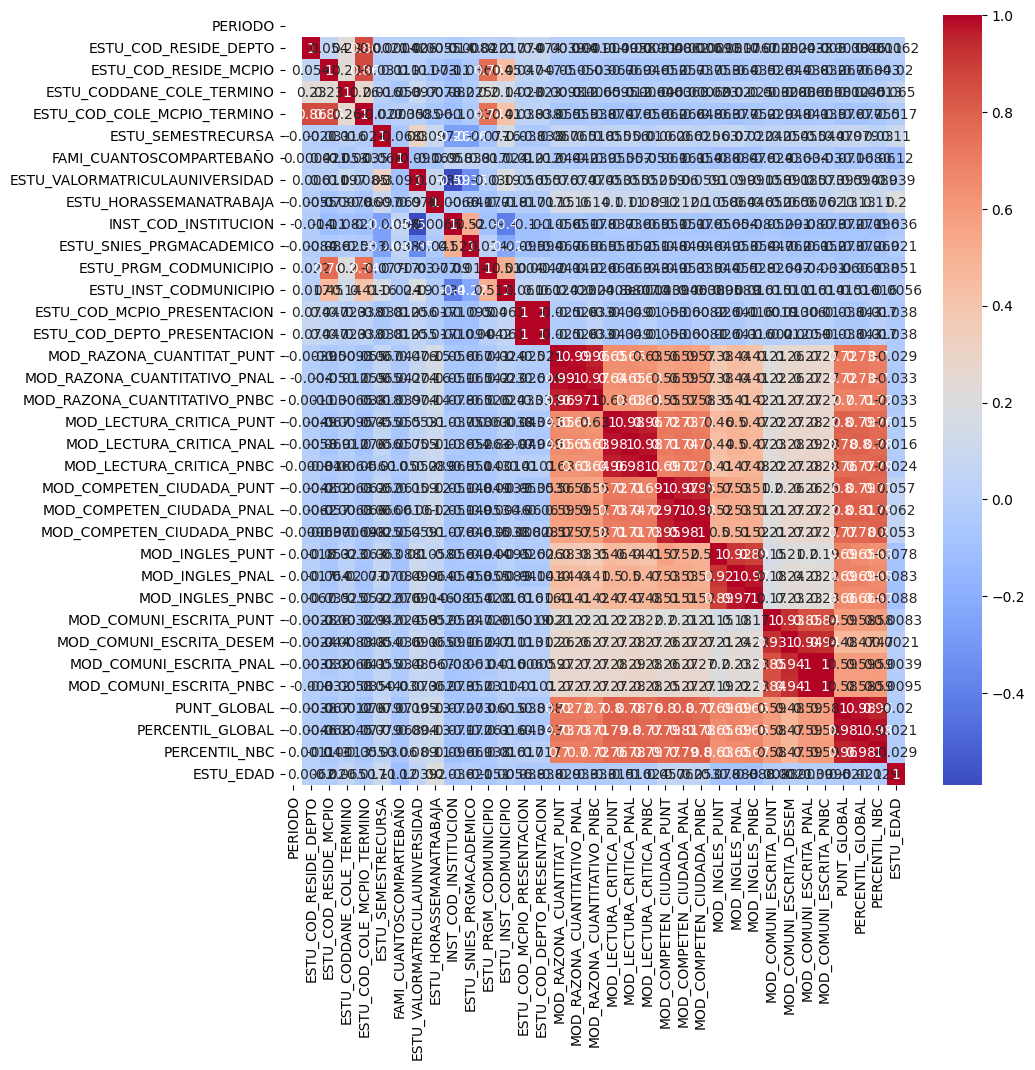

In [252]:
corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

- - -
# 3.3 Remueva las variables que nos son relevantes
- - -

In [71]:
df.drop(labels=['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_EXTERIOR', 'PERIODO', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE' , 'ESTU_DISC_FISICA', 'ESTU_DISC_SISTEM', 'ESTU_DISC_AUDITCASTELL', 'ESTU_DISC_AUDITLSC', 'ESTU_DISC_VISUALCEGUE', 'ESTU_DISC_VISUALBAJA', 'ESTU_DISC_VOZHABLA', 'ESTU_DISC_INTELEC', 'ESTU_DISC_ESPAUTISTA', 'ESTU_DISC_PSICOSOCIAL', 'ESTU_DISC_ASPERGER', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_OTROCOLE_TERMINO', 'ESTU_TITULOOBTENIDOBACHILLER', 'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_TIPODOCUMENTOSB11', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_CUANTOSCOMPARTEBAÑO', 'INST_COD_INSTITUCION', 'ESTU_SNIES_PRGMACADEMICO', 'ESTU_PRGM_CODMUNICIPIO', 'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_INST_CODMUNICIPIO', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_RAZONA_CUANTITATIVO_PNBC', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_LECTURA_CRITICA_PNAL', 'MOD_LECTURA_CRITICA_PNBC', 'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_PNAL', 'MOD_COMPETEN_CIUDADA_PNBC', 'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_INGLES_PNAL', 'MOD_INGLES_PNBC', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL', 'MOD_COMUNI_ESCRITA_PNBC', 'PERCENTIL_GLOBAL', 'PERCENTIL_NBC', 'ESTU_CONSECUTIVO'], axis=1, inplace=True)

- - -
# 3.1.1 ¿Qué variables son importantes para predecir el valor?
- - -

Las variables Importantes para predecir el modelo son las siguientes:

FAMI_ESTRATOVIVIENDA, ESTU_HORASSEMANATRABAJA, ESTU_VALORMATRICULAUNIVERSIDAD, PUNT_GLOBAL, ESTU_EDAD, ESTU_DEPTO_RESIDE, ESTU_AREARESIDE, ESTU_ESTADOCIVIL, ESTU_COLE_TERMINO, ESTU_COMOCAPACITOEXAMENSB11, ESTU_SEMESTRECURSA, FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, FAMI_TRABAJOLABORPADRE, FAMI_TRABAJOLABORMADRE, FAMI_TIENEINTERNET, FAMI_TIENESERVICIOTV, FAMI_TIENECOMPUTADOR, INST_NOMBRE_INSTITUCION, ESTU_PRGM_ACADEMICO, GRUPOREFERENCIA, ESTU_PRGM_MUNICIPIO, ESTU_PRGM_DEPARTAMENTO, ESTU_METODO_PRGM, ESTU_NUCLEO_PREGRADO, ESTU_INST_MUNICIPIO, ESTU_INST_DEPARTAMENTO, INST_CARACTER_ACADEMICO, INST_ORIGEN, ESTU_MCPIO_PRESENTACION, ESTU_DEPTO_PRESENTACION, ESTU_ESTADOINVESTIGACION
Finalmente las variables que se descartan se eliminan de la base de datos quedando así:

In [72]:
df.describe(include='all')

ESTU_DEPTO_RESIDE     ESTU_AREARESIDE ESTU_ESTADOCIVIL   
count              68725               68725            68725  \
unique                29                   2                4   
top               BOGOTÁ  Cabecera Municipal          Soltero   
freq               19894               59299            45727   
mean                 NaN                 NaN              NaN   
std                  NaN                 NaN              NaN   
min                  NaN                 NaN              NaN   
25%                  NaN                 NaN              NaN   
50%                  NaN                 NaN              NaN   
75%                  NaN                 NaN              NaN   
max                  NaN                 NaN              NaN   

       ESTU_COLE_TERMINO ESTU_COMOCAPACITOEXAMENSB11  ESTU_SEMESTRECURSA   
count              68725                       68725        68725.000000  \
unique               101                           3                 NaN   
top                OTROS    Repasó por cuenta propia                 NaN   
freq               33021                       42010                 NaN   
mean                 NaN                         NaN            4.550120   
std                  NaN                         NaN            1.704233   
min                  NaN                         NaN            1.000000   
25%                  NaN                         NaN            4.000000   
50%                  NaN                         NaN            4.000000   
75%                  NaN                         NaN            6.000000   
max                  NaN                         NaN           12.000000   

        FAMI_EDUCACIONPADRE                 FAMI_EDUCACIONMADRE   
count                 68725                               68725  \
unique                   12                                  12   
top     Primaria incompleta  Secundaria (Bachillerato) completa   
freq                  16636                               16254   
mean                    NaN                                 NaN   
std                     NaN                                 NaN   
min                     NaN                                 NaN   
25%                     NaN                                 NaN   
50%                     NaN                                 NaN   
75%                     NaN                                 NaN   
max                     NaN                                 NaN   

       FAMI_TRABAJOLABORPADRE                     FAMI_TRABAJOLABORMADRE   
count                   68725                                      68725  \
unique                     13                                         13   
top                Pensionado  Trabaja en el hogar, no trabaja o estudia   
freq                    16427                                      29324   
mean                      NaN                                        NaN   
std                       NaN                                        NaN   
min                       NaN                                        NaN   
25%                       NaN                                        NaN   
50%                       NaN                                        NaN   
75%                       NaN                                        NaN   
max                       NaN                                        NaN   

        FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET FAMI_TIENESERVICIOTV   
count           68725.000000              68725                64325  \
unique                   NaN                  2                    2   
top                      NaN                 Si                   Si   
freq                     NaN              60744                47240   
mean                2.043187                NaN                  NaN   
std                 0.801912                NaN                  NaN   
min                 0.000000                NaN                  NaN   
25%                

- - -
# 3.1.2 Existen nulos?, ¿cómo se deben imputar?
- - -

Si, en este caso cuando son variables numericas se reemplazan por cero, y en la transformación de los datos esos valores se agrupan en la nueva categoria otros, los menores a 30, tambien los valores nulos en las variables categorias eran reemplados por la mediana, ya que estadisticamente es el que mas genera valor respecto a la media.

- - -
# 3.1.3 Crear dummy variables para incluirlas en la correlación
- - -

In [84]:
numeric_feature = ['FAMI_ESTRATOVIVIENDA', 'ESTU_HORASSEMANATRABAJA', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'PUNT_GLOBAL', 'ESTU_EDAD']

categoric_feature = ['ESTU_DEPTO_RESIDE', 'ESTU_AREARESIDE', 'ESTU_ESTADOCIVIL', 'ESTU_COLE_TERMINO', 'ESTU_COMOCAPACITOEXAMENSB11', 'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR', 'INST_NOMBRE_INSTITUCION', 'ESTU_PRGM_ACADEMICO', 'GRUPOREFERENCIA', 'ESTU_PRGM_MUNICIPIO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_METODO_PRGM', 'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_MUNICIPIO', 'ESTU_INST_DEPARTAMENTO', 'INST_CARACTER_ACADEMICO', 'INST_ORIGEN', 'ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_ESTADOINVESTIGACION']

df_dummies = pd.get_dummies(df[categoric_feature], dummy_na=True, drop_first=True).astype(int)

df_total = pd.concat((df_dummies, df[numeric_feature]), axis=1)

In [85]:
df_total.describe(include='all')

ESTU_SEMESTRECURSA  ESTU_DEPTO_RESIDE_ARAUCA   
count        68725.000000              68725.000000  \
mean             4.550120                  0.001484   
std              1.704233                  0.038497   
min              1.000000                  0.000000   
25%              4.000000                  0.000000   
50%              4.000000                  0.000000   
75%              6.000000                  0.000000   
max             12.000000                  1.000000   

       ESTU_DEPTO_RESIDE_ATLANTICO  ESTU_DEPTO_RESIDE_BOGOTÁ   
count                 68725.000000              68725.000000  \
mean                      0.044118                  0.289473   
std                       0.205358                  0.453521   
min                       0.000000                  0.000000   
25%                       0.000000                  0.000000   
50%                       0.000000                  0.000000   
75%                       0.000000                  1.000000   
max                       1.000000                  1.000000   

       ESTU_DEPTO_RESIDE_BOLIVAR  ESTU_DEPTO_RESIDE_BOYACA   
count               68725.000000              68725.000000  \
mean                    0.050680                  0.030236   
std                     0.219346                  0.171239   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  0.000000   
75%                     0.000000                  0.000000   
max                     1.000000                  1.000000   

       ESTU_DEPTO_RESIDE_CALDAS  ESTU_DEPTO_RESIDE_CAQUETA   
count              68725.000000               68725.000000  \
mean                   0.014391                   0.003347   
std                    0.119096                   0.057754   
min                    0.000000                   0.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                   0.000000   
75%                    0.000000                   0.000000   
max                    1.000000                   1.000000   

       ESTU_DEPTO_RESIDE_CASANARE  ESTU_DEPTO_RESIDE_CAUCA   
count                68725.000000             68725.000000  \
mean                     0.006388                 0.015555   
std                      0.079668                 0.123746   
min                      0.000000                 0.000000   
25%                      0.000000                 0.000000   
50%                      0.000000                 0.000000   
75%                      0.000000                 0.000000   
max                      1.000000                 1.000000   

       ESTU_DEPTO_RESIDE_CESAR  ESTU_DEPTO_RESIDE_CHOCO   
count             68725.000000             68725.000000  \
mean                  0.015788                 0.001368   
std                   0.124654                 0.036958   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   1.000000                 1.000000   

       ESTU_DEPTO_RESIDE_CORDOBA  ESTU_DEPTO_RESIDE_CUNDINAMARCA   
count               68725.000000                    68725.000000  \
mean                    0.009487                        0.082197   
std                     0.096939                        0.274667   
min                     0.000000                        0.000000   
25%                     0.000000                        0.000000   
50%                     0.000000                        0.000000   
75%                     0.000000                        0.000000   
max                     1.000000                        1.000000   

       ESTU_DEPTO_RESIDE_GUAVIARE  ESTU_DEPTO_RESIDE_HUILA   
count                68725.000000             6872

In [87]:
df_total.shape

(68725, 847)

- - -
# 3.2 Divida los datos en training y testing
- - -

In [92]:
feature = list(set(df_total.columns) - set({"PUNT_GLOBAL"}))
x = df_total[feature]
y = df_total["PUNT_GLOBAL"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

- - -
# 3.2.2 Entrenar un modelos de regresión
- - -

In [93]:
model = sm.OLS(y_train, x_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     18.63
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:47:09   Log-Likelihood:            -2.3656e+05
No. Observations:               54980   AIC:                         4.746e+05
Df Residuals:                   54219   BIC:                         4.814e+05
Df Model:                         760                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================================================
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                          72.0339      6.043     11.920      0.000      60.190      83.878
INST_NOMBRE_INSTITUCION_UNIVERSIDAD DEL VALLE-CALI                                                                             -0.8437      8.032     -0.105      0.916     -16.587      14.900
ESTU_PRGM_DEPARTAMENTO_CAQUETA                                                                                                  0.7813      1.717      0.455      0.649      -2.584       4.147
ESTU_PRGM_ACADEMICO_TECNICA PROFESIONAL EN OPERACIÓN DE PROCESOS DE PRODUCCION                                                  0.7010      3.732      0.188      0.851      -6.614       8.016
ESTU_PRGM_ACADEMICO_TECNICA PROFESIONAL EN PROCESOS LOGISTICOS Y DE COMERCIO EXTERIOR                                           3.2109      3.663      0.877      0.381      -3.969      10.391
ESTU_PRGM_ACADEMICO_TECNOLOGIA EN ENTRENAMIENTO DEPORTIVO                                                                      -9.3268      6.785     -1.375      0.169     -22.625       3.972
ESTU_COLE_TERMINO_BRAULIO GONZALEZ                                                                                             -1.9217      4.911     -0.391      0.696     -11.548       7.704
ESTU_NUCLEO_PREGRADO_GEOLOGÍA, OTROS PROGRAMAS DE CIENCIAS NATURALES                                                            7.6098      4.110      1.852      0.064      -0.446      15.665
ESTU_PRGM_ACADEMICO_TECNOLOGIA EN INFORMATICA                                                                                   5.3836      3.689      1.459      0.144      -1.847      12.614
ESTU_NUCLEO_PREGRADO_INGENIERÍA MECÁNICA Y AFINES                                                                              -0.8918      1.579     -0.565      0.572      -3.986       2.203
ESTU_NUCLEO_PREGRADO_BIOLOGÍA, MICROBIOLOGÍA Y AFINES                                                                           3.3070      2.664      1.241      0.215      -1.915       8.529
ESTU_PRGM_ACADEMICO_TECNOLOGIA EN SEGURIDAD  E HIGIENE OCUPACIONAL                                                             -4.9200      4.630     -1.063      0.288     -13.994       4.154
ESTU_PRGM_ACADEMICO_TECNOLOGÍA EN DISEÑO DE ELEMENTOS MECÁNICOS PARA SU FABRICACIÓN CON MÁQUINAS HERRAMIENTAS CNC               0.8334      2.147      0.388      0.698      -3.375       5.041
ESTU_DEPTO_

- - -
# 3.2.3 ¿Cuál es el mejor R squared? Cuál es el MAPE y el MSE.
- - -

In [97]:
y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)

print(f"R Squared: {r_squared}")

R Squared: 0.18073557004791796


- - -
# 3.4 Utilizando los datos de test medir el MAPE y el MSE de test. Qué tan diferentes son las métricas de training.
- - -

In [98]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAPE: {mape}")
print(f"MSE: {mse}")

MAPE: 0.1774405625325137
MSE: 333.04392750446743


- - -
# 3.5 Describa en palabras que dice el modelo cuales son los principales hallazgos.
- - -